In [1]:
import copy
from seaborn.utils import os, np, plt, pd
import seaborn as sns
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import statsmodels as stat
from scipy import stats
from sklearn import preprocessing as s_prep, metrics as s_mtr, svm, model_selection as s_ms
from sklearn.feature_selection import chi2, f_regression
from sklearn import linear_model as s_lm, model_selection as s_ms
import timeit

In [2]:
pd.set_option('display.max_columns', 500,
             'display.precision', 2)

In [3]:
sns.set_style('darkgrid')

In [4]:
from project_methods import MSc_Proj as proj

In [5]:
# file_loc = proj.show_saved_csv()
# display(file_loc)

data_dir = os.getcwd() #'clean_pds//' #[str(k) for k, v in file_loc.items()][0]
display(data_dir)

'W:\\MSc-AIDS-UoH\\Trimester_3\\Submit'

In [6]:
fname = '\\only6_visits.csv'
first6_vis = pd.read_csv(data_dir+fname)
display(first6_vis.info(), first6_vis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Columns: 152 entries, subjid to hd_status_gen
dtypes: float64(105), int64(23), object(24)
memory usage: 1.5+ MB


None

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0     R000024542      0       0.0      0       0.0      0       0.0      1   
1     R00010372X      1      59.0      1      63.0      0       0.0      1   
2     R000458994      1      37.0      1      45.0      1      47.0      1   
3     R001225384      1      45.0      1      44.0      0       0.0      1   
4     R00170741X      1      44.0      1      41.0      1      41.0      1   
...          ...    ...       ...    ...       ...    ...       ...    ...   
1308  R994514445      1      39.0      0       0.0      0       0.0      1   
1309  R995458444      1       0.0      0       0.0      0       0.0      1   
1310  R996811185      1      10.0      0       0.0      1      62.0      1   
1311  R996853063      1      26.0      0       0.0      0       0.0      0   
1312  R99871078X      0       0.0      0       0.0      0       0.0      0   

      ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0         42.0           5.2      -2.3        -1.0              27   
1         61.0           5.0      -3.6        -1.0              26   
2         41.0           5.1       3.5         1.0              33   
3         45.0           5.2       3.5         1.0              33   
4         35.0           6.3      -8.4        -1.0              21   
...        ...           ...       ...         ...             ...   
1308      62.0           5.2       0.1         1.0              30   
1309       0.0           4.9      -4.7        -1.0              25   
1310      57.0           5.0       1.6         1.0              31   
1311       0.0           5.0       1.3         1.0              31   
1312       0.0           5.1       1.3         1.0              31   

       bmi_diff_band  baseline_age_above29  visitnum          hd_status0  \
0     [-3.0 to -2.0)                     1         6         3. manifest   
1     [-4.0 to -3.0)                     1         6         3. manifest   
2       [3.0 to 4.0)                     1         6         3. manifest   
3       [3.0 to 4.0)                     1         6         3. manifest   
4     [-9.0 to -8.0)                     1         7         3. manifest   
...              ...                   ...       ...                 ...   
1308    [0.0 to 1.0)                     1         6         3. manifest   
1309  [-5.0 to -4.0)                     1         6  5. family controls   
1310    [1.0 to 2.0)                     1         6     2. pre-manifest   
1311    [1.0 to 2.0)                     1         6     2. pre-manifest   
1312    [1.0 to 2.0)                     0         6     2. pre-manifest   

      baseline_manifest_hd  is_high_calorie  treated_chorea  \
0                        1                0               1   
1                        1                0               1   
2                        1                0               1   
3                        1                0               0   
4                        1                0               1   
...                    ...              ...             ...   
1308                     1                0               0   
1309                     0                0               0   
1310                     0                0               0   
1311                     0                0               0   
1312                     0                0               0   

      tetrabenazine_use  received_swallowing_therapy  had_gi_illness  is_male  \
0                     1                            0               0        1   
1                     0                            0               0        1   
2                     1                            1               0        0   
3                     0                            0               0        1   
4                     0                            0               0        1   
...                 ...                          ...             ...      ..

#### Only keep baseline age 

In [7]:
drop_cols = [c  for c in list(proj.get_columns_with_pattern(first6_vis, 
                                                            ['age_vis', 'age_bucket']).columns) if c[-1] != '1']

first6_vis = first6_vis.drop(drop_cols, axis=1)
display(drop_cols, first6_vis)

['age_vis_2',
 'age_vis_3',
 'age_vis_4',
 'age_vis_5',
 'age_vis_6',
 'age_bucket_vis_2',
 'age_bucket_vis_3',
 'age_bucket_vis_4',
 'age_bucket_vis_5',
 'age_bucket_vis_6']

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0     R000024542      0       0.0      0       0.0      0       0.0      1   
1     R00010372X      1      59.0      1      63.0      0       0.0      1   
2     R000458994      1      37.0      1      45.0      1      47.0      1   
3     R001225384      1      45.0      1      44.0      0       0.0      1   
4     R00170741X      1      44.0      1      41.0      1      41.0      1   
...          ...    ...       ...    ...       ...    ...       ...    ...   
1308  R994514445      1      39.0      0       0.0      0       0.0      1   
1309  R995458444      1       0.0      0       0.0      0       0.0      1   
1310  R996811185      1      10.0      0       0.0      1      62.0      1   
1311  R996853063      1      26.0      0       0.0      0       0.0      0   
1312  R99871078X      0       0.0      0       0.0      0       0.0      0   

      ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0         42.0           5.2      -2.3        -1.0              27   
1         61.0           5.0      -3.6        -1.0              26   
2         41.0           5.1       3.5         1.0              33   
3         45.0           5.2       3.5         1.0              33   
4         35.0           6.3      -8.4        -1.0              21   
...        ...           ...       ...         ...             ...   
1308      62.0           5.2       0.1         1.0              30   
1309       0.0           4.9      -4.7        -1.0              25   
1310      57.0           5.0       1.6         1.0              31   
1311       0.0           5.0       1.3         1.0              31   
1312       0.0           5.1       1.3         1.0              31   

       bmi_diff_band  baseline_age_above29  visitnum          hd_status0  \
0     [-3.0 to -2.0)                     1         6         3. manifest   
1     [-4.0 to -3.0)                     1         6         3. manifest   
2       [3.0 to 4.0)                     1         6         3. manifest   
3       [3.0 to 4.0)                     1         6         3. manifest   
4     [-9.0 to -8.0)                     1         7         3. manifest   
...              ...                   ...       ...                 ...   
1308    [0.0 to 1.0)                     1         6         3. manifest   
1309  [-5.0 to -4.0)                     1         6  5. family controls   
1310    [1.0 to 2.0)                     1         6     2. pre-manifest   
1311    [1.0 to 2.0)                     1         6     2. pre-manifest   
1312    [1.0 to 2.0)                     0         6     2. pre-manifest   

      baseline_manifest_hd  is_high_calorie  treated_chorea  \
0                        1                0               1   
1                        1                0               1   
2                        1                0               1   
3                        1                0               0   
4                        1                0               1   
...                    ...              ...             ...   
1308                     1                0               0   
1309                     0                0               0   
1310                     0                0               0   
1311                     0                0               0   
1312                     0                0               0   

      tetrabenazine_use  received_swallowing_therapy  had_gi_illness  is_male  \
0                     1                            0               0        1   
1                     0                            0               0        1   
2                     1                            1               0        0   
3                     0                            0               0        1   
4                     0                            0               0        1   
...                 ...                          ...             ...      ..

#### Only keep baseline hd_status  & general HD status

In [8]:
drop_cols = [c for c in list(proj.get_columns_with_pattern(first6_vis, 'hd_status').columns) if c[-1] not in ['1', 'n']]
first6_vis = first6_vis.drop(drop_cols, axis=1)
display(drop_cols, first6_vis)

['hd_status0',
 'hd_status_vis_2',
 'hd_status_vis_3',
 'hd_status_vis_4',
 'hd_status_vis_5',
 'hd_status_vis_6']

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0     R000024542      0       0.0      0       0.0      0       0.0      1   
1     R00010372X      1      59.0      1      63.0      0       0.0      1   
2     R000458994      1      37.0      1      45.0      1      47.0      1   
3     R001225384      1      45.0      1      44.0      0       0.0      1   
4     R00170741X      1      44.0      1      41.0      1      41.0      1   
...          ...    ...       ...    ...       ...    ...       ...    ...   
1308  R994514445      1      39.0      0       0.0      0       0.0      1   
1309  R995458444      1       0.0      0       0.0      0       0.0      1   
1310  R996811185      1      10.0      0       0.0      1      62.0      1   
1311  R996853063      1      26.0      0       0.0      0       0.0      0   
1312  R99871078X      0       0.0      0       0.0      0       0.0      0   

      ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0         42.0           5.2      -2.3        -1.0              27   
1         61.0           5.0      -3.6        -1.0              26   
2         41.0           5.1       3.5         1.0              33   
3         45.0           5.2       3.5         1.0              33   
4         35.0           6.3      -8.4        -1.0              21   
...        ...           ...       ...         ...             ...   
1308      62.0           5.2       0.1         1.0              30   
1309       0.0           4.9      -4.7        -1.0              25   
1310      57.0           5.0       1.6         1.0              31   
1311       0.0           5.0       1.3         1.0              31   
1312       0.0           5.1       1.3         1.0              31   

       bmi_diff_band  baseline_age_above29  visitnum  baseline_manifest_hd  \
0     [-3.0 to -2.0)                     1         6                     1   
1     [-4.0 to -3.0)                     1         6                     1   
2       [3.0 to 4.0)                     1         6                     1   
3       [3.0 to 4.0)                     1         6                     1   
4     [-9.0 to -8.0)                     1         7                     1   
...              ...                   ...       ...                   ...   
1308    [0.0 to 1.0)                     1         6                     1   
1309  [-5.0 to -4.0)                     1         6                     0   
1310    [1.0 to 2.0)                     1         6                     0   
1311    [1.0 to 2.0)                     1         6                     0   
1312    [1.0 to 2.0)                     0         6                     0   

      is_high_calorie  treated_chorea  tetrabenazine_use  \
0                   0               1                  1   
1                   0               1                  0   
2                   0               1                  1   
3                   0               0                  0   
4                   0               1                  0   
...               ...             ...                ...   
1308                0               0                  0   
1309                0               0                  0   
1310                0               0                  0   
1311                0               0                  0   
1312                0               0                  0   

      received_swallowing_therapy  had_gi_illness  is_male  caglow_num  \
0                               0               0        1          19   
1                               0               0        1          22   
2                               1               0        0          17   
3                               0               0        1          17   
4                               0               0        1          18   
...                           ...             ...      ...         ...   
1308                            0               0       

### Engineer Combined Scores

In [9]:
score_cols = ['indepscl'] + list(np.unique([c.split('_vis')[0] for c in list(proj.get_columns_with_pattern(first6_vis, 'score').columns)]))
combo = pd.DataFrame()
for col in score_cols:
    if col in ['miscore', 'fiscore']:
        continue
    combo.loc[:, f"combined_{col}"] = proj.get_columns_with_pattern(first6_vis, col).sum(axis=1)
combo

combined_indepscl  combined_behaviour_score  combined_chorea_score  \
0                 450.0                      65.0                  105.0   
1                 490.0                      20.0                   57.0   
2                 115.0                      98.0                  141.0   
3                 490.0                      55.0                   34.0   
4                 360.0                      85.0                   34.0   
...                 ...                       ...                    ...   
1308              600.0                      51.0                   31.0   
1309              600.0                       6.0                    0.0   
1310              560.0                     180.0                   10.0   
1311              600.0                      41.0                    0.0   
1312              600.0                       7.0                    0.0   

      combined_cognitive_score  combined_fascore  combined_motscore  \
0                        417.0             100.0              257.0   
1                        927.0             136.0              149.0   
2                          0.0               6.0              691.0   
3                       1633.0             123.0               68.0   
4                        569.0              65.0              297.0   
...                        ...               ...                ...   
1308                    1433.0             149.0               65.0   
1309                    1560.0             150.0               14.0   
1310                    1381.0             146.0               41.0   
1311                    1396.0             145.0               12.0   
1312                    1547.0             150.0                0.0   

      combined_tfcscore  
0                  53.0  
1                  62.0  
2                   3.0  
3                  52.0  
4                  20.0  
...                 ...  
1308               76.0  
1309               78.0  
1310               63.0  
1311               78.0  
1312               78.0  

[1313 rows x 7 columns]

In [10]:
# drop uhdrs score variables per visit
drop_cols = list(proj.get_columns_with_pattern(first6_vis, score_cols).columns)
display(drop_cols)
first6_vis = first6_vis.drop(drop_cols, axis=1)
display(first6_vis)

['chorea_score_vis_1',
 'chorea_score_vis_2',
 'chorea_score_vis_3',
 'chorea_score_vis_4',
 'chorea_score_vis_5',
 'chorea_score_vis_6',
 'motscore_vis_1',
 'motscore_vis_2',
 'motscore_vis_3',
 'motscore_vis_4',
 'motscore_vis_5',
 'motscore_vis_6',
 'miscore_vis_1',
 'miscore_vis_2',
 'miscore_vis_3',
 'miscore_vis_4',
 'miscore_vis_5',
 'miscore_vis_6',
 'indepscl_vis_1',
 'indepscl_vis_2',
 'indepscl_vis_3',
 'indepscl_vis_4',
 'indepscl_vis_5',
 'indepscl_vis_6',
 'fiscore_vis_1',
 'fiscore_vis_2',
 'fiscore_vis_3',
 'fiscore_vis_4',
 'fiscore_vis_5',
 'fiscore_vis_6',
 'fascore_vis_1',
 'fascore_vis_2',
 'fascore_vis_3',
 'fascore_vis_4',
 'fascore_vis_5',
 'fascore_vis_6',
 'tfcscore_vis_1',
 'tfcscore_vis_2',
 'tfcscore_vis_3',
 'tfcscore_vis_4',
 'tfcscore_vis_5',
 'tfcscore_vis_6',
 'behaviour_score_vis_1',
 'behaviour_score_vis_2',
 'behaviour_score_vis_3',
 'behaviour_score_vis_4',
 'behaviour_score_vis_5',
 'behaviour_score_vis_6',
 'cognitive_score_vis_1',
 'cognitive_sc

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0     R000024542      0       0.0      0       0.0      0       0.0      1   
1     R00010372X      1      59.0      1      63.0      0       0.0      1   
2     R000458994      1      37.0      1      45.0      1      47.0      1   
3     R001225384      1      45.0      1      44.0      0       0.0      1   
4     R00170741X      1      44.0      1      41.0      1      41.0      1   
...          ...    ...       ...    ...       ...    ...       ...    ...   
1308  R994514445      1      39.0      0       0.0      0       0.0      1   
1309  R995458444      1       0.0      0       0.0      0       0.0      1   
1310  R996811185      1      10.0      0       0.0      1      62.0      1   
1311  R996853063      1      26.0      0       0.0      0       0.0      0   
1312  R99871078X      0       0.0      0       0.0      0       0.0      0   

      ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0         42.0           5.2      -2.3        -1.0              27   
1         61.0           5.0      -3.6        -1.0              26   
2         41.0           5.1       3.5         1.0              33   
3         45.0           5.2       3.5         1.0              33   
4         35.0           6.3      -8.4        -1.0              21   
...        ...           ...       ...         ...             ...   
1308      62.0           5.2       0.1         1.0              30   
1309       0.0           4.9      -4.7        -1.0              25   
1310      57.0           5.0       1.6         1.0              31   
1311       0.0           5.0       1.3         1.0              31   
1312       0.0           5.1       1.3         1.0              31   

       bmi_diff_band  baseline_age_above29  visitnum  baseline_manifest_hd  \
0     [-3.0 to -2.0)                     1         6                     1   
1     [-4.0 to -3.0)                     1         6                     1   
2       [3.0 to 4.0)                     1         6                     1   
3       [3.0 to 4.0)                     1         6                     1   
4     [-9.0 to -8.0)                     1         7                     1   
...              ...                   ...       ...                   ...   
1308    [0.0 to 1.0)                     1         6                     1   
1309  [-5.0 to -4.0)                     1         6                     0   
1310    [1.0 to 2.0)                     1         6                     0   
1311    [1.0 to 2.0)                     1         6                     0   
1312    [1.0 to 2.0)                     0         6                     0   

      is_high_calorie  treated_chorea  tetrabenazine_use  \
0                   0               1                  1   
1                   0               1                  0   
2                   0               1                  1   
3                   0               0                  0   
4                   0               1                  0   
...               ...             ...                ...   
1308                0               0                  0   
1309                0               0                  0   
1310                0               0                  0   
1311                0               0                  0   
1312                0               0                  0   

      received_swallowing_therapy  had_gi_illness  is_male  caglow_num  \
0                               0               0        1          19   
1                               0               0        1          22   
2                               1               0        0          17   
3                               0               0        1          17   
4                               0               0        1          18   
...                           ...             ...      ...         ...   
1308                            0               0       

In [11]:
# attach combined scores to first6_vis
first6_vis = pd.merge(first6_vis, combo, left_index=True, right_index=True)
first6_vis

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0     R000024542      0       0.0      0       0.0      0       0.0      1   
1     R00010372X      1      59.0      1      63.0      0       0.0      1   
2     R000458994      1      37.0      1      45.0      1      47.0      1   
3     R001225384      1      45.0      1      44.0      0       0.0      1   
4     R00170741X      1      44.0      1      41.0      1      41.0      1   
...          ...    ...       ...    ...       ...    ...       ...    ...   
1308  R994514445      1      39.0      0       0.0      0       0.0      1   
1309  R995458444      1       0.0      0       0.0      0       0.0      1   
1310  R996811185      1      10.0      0       0.0      1      62.0      1   
1311  R996853063      1      26.0      0       0.0      0       0.0      0   
1312  R99871078X      0       0.0      0       0.0      0       0.0      0   

      ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0         42.0           5.2      -2.3        -1.0              27   
1         61.0           5.0      -3.6        -1.0              26   
2         41.0           5.1       3.5         1.0              33   
3         45.0           5.2       3.5         1.0              33   
4         35.0           6.3      -8.4        -1.0              21   
...        ...           ...       ...         ...             ...   
1308      62.0           5.2       0.1         1.0              30   
1309       0.0           4.9      -4.7        -1.0              25   
1310      57.0           5.0       1.6         1.0              31   
1311       0.0           5.0       1.3         1.0              31   
1312       0.0           5.1       1.3         1.0              31   

       bmi_diff_band  baseline_age_above29  visitnum  baseline_manifest_hd  \
0     [-3.0 to -2.0)                     1         6                     1   
1     [-4.0 to -3.0)                     1         6                     1   
2       [3.0 to 4.0)                     1         6                     1   
3       [3.0 to 4.0)                     1         6                     1   
4     [-9.0 to -8.0)                     1         7                     1   
...              ...                   ...       ...                   ...   
1308    [0.0 to 1.0)                     1         6                     1   
1309  [-5.0 to -4.0)                     1         6                     0   
1310    [1.0 to 2.0)                     1         6                     0   
1311    [1.0 to 2.0)                     1         6                     0   
1312    [1.0 to 2.0)                     0         6                     0   

      is_high_calorie  treated_chorea  tetrabenazine_use  \
0                   0               1                  1   
1                   0               1                  0   
2                   0               1                  1   
3                   0               0                  0   
4                   0               1                  0   
...               ...             ...                ...   
1308                0               0                  0   
1309                0               0                  0   
1310                0               0                  0   
1311                0               0                  0   
1312                0               0                  0   

      received_swallowing_therapy  had_gi_illness  is_male  caglow_num  \
0                               0               0        1          19   
1                               0               0        1          22   
2                               1               0        0          17   
3                               0               0        1          17   
4                               0               0        1          18   
...                           ...             ...      ...         ...   
1308                            0               0       

### Engineer combined visit variables

In [12]:
combo_cols = list(np.unique([c.split('_vis')[0] for c in list(proj.get_columns_with_pattern(first6_vis, 'vis_').columns)
                            if c.split('_vis_')[0] not in ['bmi_level', 'bmi', 'age', 'age_bucket', 'bmi_outcome',
                                                          'hd_status']]))
print(combo_cols)
combo = pd.DataFrame()
for col in combo_cols:
#     if col in ['miscore', 'fiscore']:
#         continue
    combo.loc[:, f"combined_{col}"] = proj.get_columns_with_pattern(first6_vis, col).sum(axis=1)
combo

['feedself', 'height', 'independent_feeding', 'visdy', 'weight']


combined_feedself  combined_height  combined_independent_feeding  \
0                   5.0           1110.4                           6.0   
1                   6.0           1128.0                           6.0   
2                   0.0           1020.0                           0.0   
3                   6.0           1032.0                           6.0   
4                   5.0           1116.0                           2.0   
...                 ...              ...                           ...   
1308                6.0            948.0                           6.0   
1309                6.0            981.5                           6.0   
1310                6.0            946.1                           6.0   
1311                6.0            984.0                           6.0   
1312                6.0           1044.0                           6.0   

      combined_visdy  combined_weight  
0             5583.0            386.7  
1             5439.0            568.8  
2             5706.0            365.7  
3             5982.0            389.5  
4             5104.0            706.0  
...              ...              ...  
1308          6151.0            341.8  
1309          5327.0            415.3  
1310          5388.0            413.5  
1311          5435.0            321.5  
1312          5403.0            402.0  

[1313 rows x 5 columns]

In [13]:
# drop uhdrs score variables per visit
drop_cols = list(proj.get_columns_with_pattern(first6_vis, combo_cols).columns)
display(drop_cols)
first6_vis = first6_vis.drop(drop_cols, axis=1)
display(first6_vis)

['weight_vis_1',
 'weight_vis_2',
 'weight_vis_3',
 'weight_vis_4',
 'weight_vis_5',
 'weight_vis_6',
 'height_vis_1',
 'height_vis_2',
 'height_vis_3',
 'height_vis_4',
 'height_vis_5',
 'height_vis_6',
 'visdy_vis_1',
 'visdy_vis_2',
 'visdy_vis_3',
 'visdy_vis_4',
 'visdy_vis_5',
 'visdy_vis_6',
 'feedself_vis_1',
 'feedself_vis_2',
 'feedself_vis_3',
 'feedself_vis_4',
 'feedself_vis_5',
 'feedself_vis_6',
 'independent_feeding_vis_1',
 'independent_feeding_vis_2',
 'independent_feeding_vis_3',
 'independent_feeding_vis_4',
 'independent_feeding_vis_5',
 'independent_feeding_vis_6']

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0     R000024542      0       0.0      0       0.0      0       0.0      1   
1     R00010372X      1      59.0      1      63.0      0       0.0      1   
2     R000458994      1      37.0      1      45.0      1      47.0      1   
3     R001225384      1      45.0      1      44.0      0       0.0      1   
4     R00170741X      1      44.0      1      41.0      1      41.0      1   
...          ...    ...       ...    ...       ...    ...       ...    ...   
1308  R994514445      1      39.0      0       0.0      0       0.0      1   
1309  R995458444      1       0.0      0       0.0      0       0.0      1   
1310  R996811185      1      10.0      0       0.0      1      62.0      1   
1311  R996853063      1      26.0      0       0.0      0       0.0      0   
1312  R99871078X      0       0.0      0       0.0      0       0.0      0   

      ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0         42.0           5.2      -2.3        -1.0              27   
1         61.0           5.0      -3.6        -1.0              26   
2         41.0           5.1       3.5         1.0              33   
3         45.0           5.2       3.5         1.0              33   
4         35.0           6.3      -8.4        -1.0              21   
...        ...           ...       ...         ...             ...   
1308      62.0           5.2       0.1         1.0              30   
1309       0.0           4.9      -4.7        -1.0              25   
1310      57.0           5.0       1.6         1.0              31   
1311       0.0           5.0       1.3         1.0              31   
1312       0.0           5.1       1.3         1.0              31   

       bmi_diff_band  baseline_age_above29  visitnum  baseline_manifest_hd  \
0     [-3.0 to -2.0)                     1         6                     1   
1     [-4.0 to -3.0)                     1         6                     1   
2       [3.0 to 4.0)                     1         6                     1   
3       [3.0 to 4.0)                     1         6                     1   
4     [-9.0 to -8.0)                     1         7                     1   
...              ...                   ...       ...                   ...   
1308    [0.0 to 1.0)                     1         6                     1   
1309  [-5.0 to -4.0)                     1         6                     0   
1310    [1.0 to 2.0)                     1         6                     0   
1311    [1.0 to 2.0)                     1         6                     0   
1312    [1.0 to 2.0)                     0         6                     0   

      is_high_calorie  treated_chorea  tetrabenazine_use  \
0                   0               1                  1   
1                   0               1                  0   
2                   0               1                  1   
3                   0               0                  0   
4                   0               1                  0   
...               ...             ...                ...   
1308                0               0                  0   
1309                0               0                  0   
1310                0               0                  0   
1311                0               0                  0   
1312                0               0                  0   

      received_swallowing_therapy  had_gi_illness  is_male  caglow_num  \
0                               0               0        1          19   
1                               0               0        1          22   
2                               1               0        0          17   
3                               0               0        1          17   
4                               0               0        1          18   
...                           ...             ...      ...         ...   
1308                            0               0       

In [14]:
# attach combined scores to first6_vis
first6_vis = pd.merge(first6_vis, combo, left_index=True, right_index=True)
first6_vis

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0     R000024542      0       0.0      0       0.0      0       0.0      1   
1     R00010372X      1      59.0      1      63.0      0       0.0      1   
2     R000458994      1      37.0      1      45.0      1      47.0      1   
3     R001225384      1      45.0      1      44.0      0       0.0      1   
4     R00170741X      1      44.0      1      41.0      1      41.0      1   
...          ...    ...       ...    ...       ...    ...       ...    ...   
1308  R994514445      1      39.0      0       0.0      0       0.0      1   
1309  R995458444      1       0.0      0       0.0      0       0.0      1   
1310  R996811185      1      10.0      0       0.0      1      62.0      1   
1311  R996853063      1      26.0      0       0.0      0       0.0      0   
1312  R99871078X      0       0.0      0       0.0      0       0.0      0   

      ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0         42.0           5.2      -2.3        -1.0              27   
1         61.0           5.0      -3.6        -1.0              26   
2         41.0           5.1       3.5         1.0              33   
3         45.0           5.2       3.5         1.0              33   
4         35.0           6.3      -8.4        -1.0              21   
...        ...           ...       ...         ...             ...   
1308      62.0           5.2       0.1         1.0              30   
1309       0.0           4.9      -4.7        -1.0              25   
1310      57.0           5.0       1.6         1.0              31   
1311       0.0           5.0       1.3         1.0              31   
1312       0.0           5.1       1.3         1.0              31   

       bmi_diff_band  baseline_age_above29  visitnum  baseline_manifest_hd  \
0     [-3.0 to -2.0)                     1         6                     1   
1     [-4.0 to -3.0)                     1         6                     1   
2       [3.0 to 4.0)                     1         6                     1   
3       [3.0 to 4.0)                     1         6                     1   
4     [-9.0 to -8.0)                     1         7                     1   
...              ...                   ...       ...                   ...   
1308    [0.0 to 1.0)                     1         6                     1   
1309  [-5.0 to -4.0)                     1         6                     0   
1310    [1.0 to 2.0)                     1         6                     0   
1311    [1.0 to 2.0)                     1         6                     0   
1312    [1.0 to 2.0)                     0         6                     0   

      is_high_calorie  treated_chorea  tetrabenazine_use  \
0                   0               1                  1   
1                   0               1                  0   
2                   0               1                  1   
3                   0               0                  0   
4                   0               1                  0   
...               ...             ...                ...   
1308                0               0                  0   
1309                0               0                  0   
1310                0               0                  0   
1311                0               0                  0   
1312                0               0                  0   

      received_swallowing_therapy  had_gi_illness  is_male  caglow_num  \
0                               0               0        1          19   
1                               0               0        1          22   
2                               1               0        0          17   
3                               0               0        1          17   
4                               0               0        1          18   
...                           ...             ...      ...         ...   
1308                            0               0       

### Select control and manifest pps

In [15]:
# control
ctl = (first6_vis['hd_status_vis_1'].isin(['4. genotype -ve', '5. family controls']) &
       (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))
       
mctl = (first6_vis['hd_status_vis_1'].isin(['4. genotype -ve', '5. family controls']) &
        (first6_vis['baseline_age_above29'] == 1) &
        (first6_vis['is_male'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

fctl = (first6_vis['hd_status_vis_1'].isin(['4. genotype -ve', '5. family controls']) &
        (first6_vis['baseline_age_above29'] == 1) &
        (first6_vis['is_male'] == 0) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

control = first6_vis.loc[ctl].reset_index(drop=True)
male_control = first6_vis.loc[mctl]
female_control = first6_vis.loc[fctl]

display(control['visitnum'].value_counts(), control, len(male_control), len(female_control))

6    195
7    105
8     19
9      1
Name: visitnum, dtype: int64

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0    R002995975      1       0.0      0       0.0      0       0.0      1   
1    R013633600      0       0.0      0       0.0      0       0.0      0   
2    R021820966      1       0.0      0       0.0      0       0.0      1   
3    R02679911X      0       0.0      0       0.0      0       0.0      0   
4    R026933811      0       0.0      0       0.0      0       0.0      0   
..          ...    ...       ...    ...       ...    ...       ...    ...   
315  R98296028X      1       0.0      0       0.0      0       0.0      1   
316  R983486749      1       0.0      0       0.0      0       0.0      1   
317  R984684709      1      58.0      0       0.0      0       0.0      0   
318  R985917130      1      25.0      0       0.0      0       0.0      0   
319  R995458444      1       0.0      0       0.0      0       0.0      1   

     ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0         0.0           6.2       1.9         1.0              31   
1         0.0           5.1       1.9         1.0              31   
2         0.0           7.1       2.0         1.0              32   
3         0.0           6.2     -22.1        -1.0               7   
4         0.0           5.0       1.7         1.0              31   
..        ...           ...       ...         ...             ...   
315       0.0           5.9       1.2         1.0              31   
316       0.0           5.0       1.6         1.0              31   
317       0.0           5.2       1.8         1.0              31   
318       0.0           5.9       3.7         1.0              33   
319       0.0           4.9      -4.7        -1.0              25   

        bmi_diff_band  baseline_age_above29  visitnum  baseline_manifest_hd  \
0        [1.0 to 2.0)                     1         6                     0   
1        [1.0 to 2.0)                     1         6                     0   
2        [2.0 to 3.0)                     1         8                     0   
3    [-23.0 to -22.0)                     1         7                     0   
4        [1.0 to 2.0)                     1         6                     0   
..                ...                   ...       ...                   ...   
315      [1.0 to 2.0)                     1         7                     0   
316      [1.0 to 2.0)                     1         6                     0   
317      [1.0 to 2.0)                     1         6                     0   
318      [3.0 to 4.0)                     1         6                     0   
319    [-5.0 to -4.0)                     1         6                     0   

     is_high_calorie  treated_chorea  tetrabenazine_use  \
0                  0               0                  0   
1                  0               0                  0   
2                  0               0                  0   
3                  0               0                  0   
4                  0               0                  0   
..               ...             ...                ...   
315                0               0                  0   
316                0               0                  0   
317                0               0                  0   
318                0               0                  0   
319                0               0                  0   

     received_swallowing_therapy  had_gi_illness  is_male  caglow_num  \
0                              0               0        1          18   
1                              0               0        1          17   
2                              0               1        1          15   
3                              0               0        0          19   
4                              0               0        0          17   
..                           ...             ...      ...         ...   
315                            0               0        1          15   
316          

115

205

In [16]:
# manifest
mnf = ((first6_vis['hd_status_vis_1'] == '3. manifest') &
       (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

mmnf = ((first6_vis['hd_status_vis_1'] == '3. manifest') &
        (first6_vis['baseline_age_above29'] == 1) &
        (first6_vis['is_male'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

fmnf = ((first6_vis['hd_status_vis_1'] == '3. manifest') &
        (first6_vis['baseline_age_above29'] == 1) &
        (first6_vis['is_male'] == 0) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))        

manifest = first6_vis.loc[mnf].reset_index(drop=True)
male_manifest = first6_vis.loc[mmnf]
female_manifest = first6_vis.loc[fmnf]

# reduced and full penetrance
rp = ((first6_vis['hd_status_vis_1'] == '3. manifest') &
      (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['caghigh_band'] == '2. reduced penetrance') &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

fp = ((first6_vis['hd_status_vis_1'] == '3. manifest') &
      (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['caghigh_band'] == '3. full penetrance') &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

redpen = first6_vis.loc[rp].reset_index(drop=True)
fulpen = first6_vis.loc[fp].reset_index(drop=True)

display(manifest['visitnum'].value_counts(), manifest, len(male_manifest), 
        len(female_manifest), len(redpen), len(fulpen))

6    432
7     97
8     17
Name: visitnum, dtype: int64

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0    R000024542      0       0.0      0       0.0      0       0.0      1   
1    R00010372X      1      59.0      1      63.0      0       0.0      1   
2    R001225384      1      45.0      1      44.0      0       0.0      1   
3    R00170741X      1      44.0      1      41.0      1      41.0      1   
4    R003894598      1      48.0      0       0.0      0       0.0      1   
..          ...    ...       ...    ...       ...    ...       ...    ...   
541  R98492492X      0       0.0      1      38.0      1      43.0      1   
542  R987969439      1      46.0      0       0.0      1      68.0      1   
543  R991644661      1      18.0      0       0.0      0       0.0      1   
544  R994223767      1      43.0      1      58.0      1      55.0      1   
545  R994514445      1      39.0      0       0.0      0       0.0      1   

     ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0        42.0           5.2      -2.3        -1.0              27   
1        61.0           5.0      -3.6        -1.0              26   
2        45.0           5.2       3.5         1.0              33   
3        35.0           6.3      -8.4        -1.0              21   
4        43.0           6.6      -1.9        -1.0              28   
..        ...           ...       ...         ...             ...   
541      37.0           5.8       0.4         1.0              30   
542      51.0           5.1      -2.6        -1.0              27   
543      33.0           5.0      -5.8        -1.0              24   
544      47.0           5.3       5.4         1.0              35   
545      62.0           5.2       0.1         1.0              30   

      bmi_diff_band  baseline_age_above29  visitnum  baseline_manifest_hd  \
0    [-3.0 to -2.0)                     1         6                     1   
1    [-4.0 to -3.0)                     1         6                     1   
2      [3.0 to 4.0)                     1         6                     1   
3    [-9.0 to -8.0)                     1         7                     1   
4    [-2.0 to -1.0)                     1         8                     1   
..              ...                   ...       ...                   ...   
541    [0.0 to 1.0)                     1         6                     1   
542  [-3.0 to -2.0)                     1         6                     1   
543  [-6.0 to -5.0)                     1         6                     1   
544    [5.0 to 6.0)                     1         6                     1   
545    [0.0 to 1.0)                     1         6                     1   

     is_high_calorie  treated_chorea  tetrabenazine_use  \
0                  0               1                  1   
1                  0               1                  0   
2                  0               0                  0   
3                  0               1                  0   
4                  0               1                  0   
..               ...             ...                ...   
541                0               0                  0   
542                0               0                  0   
543                0               1                  1   
544                0               0                  0   
545                0               0                  0   

     received_swallowing_therapy  had_gi_illness  is_male  caglow_num  \
0                              0               0        1          19   
1                              0               0        1          22   
2                              0               0        1          17   
3                              0               0        1          18   
4                              0               0        1          23   
..                           ...             ...      ...         ...   
541                            0               1        1          21   
542                            0     

286

260

17

529

#### Drop meaningless (zero variance) variables

In [17]:
proj.hd_status_guide

{2: '2. pre-manifest',
 3: '3. manifest',
 4: '4. genotype -ve',
 5: '5. family controls'}

### Filter out pre-manifest pps and separate continuous from categorical variables

In [18]:
analyze_df = pd.concat([control, manifest]).sample(frac=1).reset_index(drop=True)
display(analyze_df['hd_status_vis_1'].value_counts())

3. manifest           546
5. family controls    176
4. genotype -ve       144
Name: hd_status_vis_1, dtype: int64

In [19]:
num_vars = analyze_df.select_dtypes(include=np.number).reset_index(drop=True)
str_vars = analyze_df.select_dtypes(exclude=np.number).reset_index(drop=True)
display(num_vars, str_vars)

ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  ccmtrage  \
0        0       0.0      0       0.0      0       0.0      1      52.0   
1        1      25.0      1      36.0      1      36.0      1      39.0   
2        0       0.0      0       0.0      0       0.0      0       0.0   
3        1      56.0      1      58.0      1      58.0      1      55.0   
4        0       0.0      0       0.0      1      55.0      1      54.0   
..     ...       ...    ...       ...    ...       ...    ...       ...   
861      1      28.0      0       0.0      0       0.0      1      38.0   
862      0       0.0      0       0.0      0       0.0      1      65.0   
863      1       0.0      0       0.0      0       0.0      1       0.0   
864      1       0.0      0       0.0      0       0.0      1       0.0   
865      1      43.0      1      52.0      1      43.0      1      45.0   

     study_timeyr  bmi_diff  bmi_change  bmi_diff_class  baseline_age_above29  \
0             4.8      -0.1        -1.0              29                     1   
1             6.0      -3.9        -1.0              26                     1   
2             5.9       4.0         1.0              34                     1   
3             5.8       0.6         1.0              30                     1   
4             5.1      -1.4        -1.0              28                     1   
..            ...       ...         ...             ...                   ...   
861           5.9       1.1         1.0              31                     1   
862           5.1      -0.6        -1.0              29                     1   
863           5.2       2.2         1.0              32                     1   
864           6.1      -0.3        -1.0              29                     1   
865           5.3      -1.0        -1.0              29                     1   

     visitnum  baseline_manifest_hd  is_high_calorie  treated_chorea  \
0           6                     1                0               0   
1           7                     1                0               1   
2           7                     0                0               0   
3           7                     1                0               0   
4           6                     1                0               0   
..        ...                   ...              ...             ...   
861         7                     1                0               1   
862         6                     1                0               1   
863         6                     0                0               0   
864         7                     0                0               0   
865         6                     1                0               0   

     tetrabenazine_use  received_swallowing_therapy  had_gi_illness  is_male  \
0                    0                            0               0        0   
1                    0                            0               0        1   
2                    0                            0               0        0   
3                    0                            0               0        0   
4                    0                            0               1        1   
..                 ...                          ...             ...      ...   
861                  0                            0               0        0   
862                  0                            0               0        1   
863                  0                            0               0        0   
864                  0                            0               0        1   
865                  0                            0               0        1   

     caglow_num  caghigh_num  bmi_vis_1  bmi_vis_2  bmi_vis_3  bmi_vis_4  \
0            19           43       25.1       22.4       23.2       23.2   
1            17           50       25.7       25.4       23.4       23.7   
2            17           20       23.9       22.0       21.6       24.6   
3

subjid   bmi_diff_band bmi_level_vis_1 bmi_level_vis_2  \
0    R306384258   [-1.0 to 0.0)   2. overweight       1. normal   
1    R030280608  [-4.0 to -3.0)   2. overweight   2. overweight   
2    R178172372    [4.0 to 5.0)       1. normal       1. normal   
3    R495731621    [0.0 to 1.0)   2. overweight   2. overweight   
4    R53406676X  [-2.0 to -1.0)       1. normal       1. normal   
..          ...             ...             ...             ...   
861  R217461623    [1.0 to 2.0)       1. normal       1. normal   
862  R288781586   [-1.0 to 0.0)       1. normal       1. normal   
863  R286179296    [2.0 to 3.0)       1. normal   2. overweight   
864  R270141073   [-1.0 to 0.0)   2. overweight        3. obese   
865  R504028308   [-1.0 to 0.0)   2. overweight   2. overweight   

    bmi_level_vis_3 bmi_level_vis_4 bmi_level_vis_5 bmi_level_vis_6  \
0         1. normal       1. normal       1. normal   2. overweight   
1         1. normal       1. normal       1. normal       1. normal   
2         1. normal       1. normal   2. overweight   2. overweight   
3     2. overweight   2. overweight   2. overweight   2. overweight   
4         1. normal       1. normal       1. normal       1. normal   
..              ...             ...             ...             ...   
861       1. normal       1. normal       1. normal       1. normal   
862       1. normal   2. overweight       1. normal       1. normal   
863   2. overweight   2. overweight   2. overweight   2. overweight   
864   2. overweight   2. overweight   2. overweight   2. overweight   
865   2. overweight   2. overweight   2. overweight       1. normal   

    age_bucket_vis_1     hd_status_vis_1 v1v6_bmi_change  \
0         3. 50 - 59         3. manifest    -1. decrease   
1         2. 40 - 49         3. manifest    -1. decrease   
2         1. 30 - 39     4. genotype -ve     1. increase   
3         3. 50 - 59         3. manifest     1. increase   
4         3. 50 - 59         3. manifest    -1. decrease   
..               ...                 ...             ...   
861       2. 40 - 49         3. manifest    -1. decrease   
862       4. 60 - 69         3. manifest    -1. decrease   
863       3. 50 - 59  5. family controls     1. increase   
864           5. >69  5. family controls     1. increase   
865       2. 40 - 49         3. manifest    -1. decrease   

              caghigh_band hd_status_gen  
0       3. full penetrance      manifest  
1       3. full penetrance      manifest  
2                0. normal       control  
3       3. full penetrance      manifest  
4       3. full penetrance      manifest  
..                     ...           ...  
861     3. full penetrance      manifest  
862  2. reduced penetrance      manifest  
863              0. normal       control  
864              0. normal       control  
865     3. full penetrance      manifest  

[866 rows x 13 columns]

#### Drop some variables and convert categorical variables to dummy variables

In [20]:
drop_cols = ['subjid', 'caghigh_band', 'bmi_diff_band', 'age_bucket_vis_1', 'hd_status_vis_1'] + list(proj.get_columns_with_pattern(str_vars, 'bmi_level').columns)
dum_vars = pd.get_dummies(str_vars.drop(drop_cols, axis=1))
display(drop_cols, str_vars, dum_vars)

drop_cols = ['study_timeyr', 'baseline_manifest_hd',] # autocorrelation with hd_status_vis_1
num_enrl = pd.merge(num_vars.drop(drop_cols, axis=1), dum_vars, left_index=True, right_index=True)
display(drop_cols, num_enrl)

['subjid',
 'caghigh_band',
 'bmi_diff_band',
 'age_bucket_vis_1',
 'hd_status_vis_1',
 'bmi_level_vis_1',
 'bmi_level_vis_2',
 'bmi_level_vis_3',
 'bmi_level_vis_4',
 'bmi_level_vis_5',
 'bmi_level_vis_6']

subjid   bmi_diff_band bmi_level_vis_1 bmi_level_vis_2  \
0    R306384258   [-1.0 to 0.0)   2. overweight       1. normal   
1    R030280608  [-4.0 to -3.0)   2. overweight   2. overweight   
2    R178172372    [4.0 to 5.0)       1. normal       1. normal   
3    R495731621    [0.0 to 1.0)   2. overweight   2. overweight   
4    R53406676X  [-2.0 to -1.0)       1. normal       1. normal   
..          ...             ...             ...             ...   
861  R217461623    [1.0 to 2.0)       1. normal       1. normal   
862  R288781586   [-1.0 to 0.0)       1. normal       1. normal   
863  R286179296    [2.0 to 3.0)       1. normal   2. overweight   
864  R270141073   [-1.0 to 0.0)   2. overweight        3. obese   
865  R504028308   [-1.0 to 0.0)   2. overweight   2. overweight   

    bmi_level_vis_3 bmi_level_vis_4 bmi_level_vis_5 bmi_level_vis_6  \
0         1. normal       1. normal       1. normal   2. overweight   
1         1. normal       1. normal       1. normal       1. normal   
2         1. normal       1. normal   2. overweight   2. overweight   
3     2. overweight   2. overweight   2. overweight   2. overweight   
4         1. normal       1. normal       1. normal       1. normal   
..              ...             ...             ...             ...   
861       1. normal       1. normal       1. normal       1. normal   
862       1. normal   2. overweight       1. normal       1. normal   
863   2. overweight   2. overweight   2. overweight   2. overweight   
864   2. overweight   2. overweight   2. overweight   2. overweight   
865   2. overweight   2. overweight   2. overweight       1. normal   

    age_bucket_vis_1     hd_status_vis_1 v1v6_bmi_change  \
0         3. 50 - 59         3. manifest    -1. decrease   
1         2. 40 - 49         3. manifest    -1. decrease   
2         1. 30 - 39     4. genotype -ve     1. increase   
3         3. 50 - 59         3. manifest     1. increase   
4         3. 50 - 59         3. manifest    -1. decrease   
..               ...                 ...             ...   
861       2. 40 - 49         3. manifest    -1. decrease   
862       4. 60 - 69         3. manifest    -1. decrease   
863       3. 50 - 59  5. family controls     1. increase   
864           5. >69  5. family controls     1. increase   
865       2. 40 - 49         3. manifest    -1. decrease   

              caghigh_band hd_status_gen  
0       3. full penetrance      manifest  
1       3. full penetrance      manifest  
2                0. normal       control  
3       3. full penetrance      manifest  
4       3. full penetrance      manifest  
..                     ...           ...  
861     3. full penetrance      manifest  
862  2. reduced penetrance      manifest  
863              0. normal       control  
864              0. normal       control  
865     3. full penetrance      manifest  

[866 rows x 13 columns]

v1v6_bmi_change_-1. decrease  v1v6_bmi_change_0. no change  \
0                               1                             0   
1                               1                             0   
2                               0                             0   
3                               0                             0   
4                               1                             0   
..                            ...                           ...   
861                             1                             0   
862                             1                             0   
863                             0                             0   
864                             0                             0   
865                             1                             0   

     v1v6_bmi_change_1. increase  hd_status_gen_control  \
0                              0                      0   
1                              0                      0   
2                              1                      1   
3                              1                      0   
4                              0                      0   
..                           ...                    ...   
861                            0                      0   
862                            0                      0   
863                            1                      1   
864                            1                      1   
865                            0                      0   

     hd_status_gen_manifest  
0                         1  
1                         1  
2                         0  
3                         1  
4                         1  
..                      ...  
861                       1  
862                       1  
863                       0  
864                       0  
865                       1  

[866 rows x 5 columns]

['study_timeyr', 'baseline_manifest_hd']

ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  ccmtrage  \
0        0       0.0      0       0.0      0       0.0      1      52.0   
1        1      25.0      1      36.0      1      36.0      1      39.0   
2        0       0.0      0       0.0      0       0.0      0       0.0   
3        1      56.0      1      58.0      1      58.0      1      55.0   
4        0       0.0      0       0.0      1      55.0      1      54.0   
..     ...       ...    ...       ...    ...       ...    ...       ...   
861      1      28.0      0       0.0      0       0.0      1      38.0   
862      0       0.0      0       0.0      0       0.0      1      65.0   
863      1       0.0      0       0.0      0       0.0      1       0.0   
864      1       0.0      0       0.0      0       0.0      1       0.0   
865      1      43.0      1      52.0      1      43.0      1      45.0   

     bmi_diff  bmi_change  bmi_diff_class  baseline_age_above29  visitnum  \
0        -0.1        -1.0              29                     1         6   
1        -3.9        -1.0              26                     1         7   
2         4.0         1.0              34                     1         7   
3         0.6         1.0              30                     1         7   
4        -1.4        -1.0              28                     1         6   
..        ...         ...             ...                   ...       ...   
861       1.1         1.0              31                     1         7   
862      -0.6        -1.0              29                     1         6   
863       2.2         1.0              32                     1         6   
864      -0.3        -1.0              29                     1         7   
865      -1.0        -1.0              29                     1         6   

     is_high_calorie  treated_chorea  tetrabenazine_use  \
0                  0               0                  0   
1                  0               1                  0   
2                  0               0                  0   
3                  0               0                  0   
4                  0               0                  0   
..               ...             ...                ...   
861                0               1                  0   
862                0               1                  0   
863                0               0                  0   
864                0               0                  0   
865                0               0                  0   

     received_swallowing_therapy  had_gi_illness  is_male  caglow_num  \
0                              0               0        0          19   
1                              0               0        1          17   
2                              0               0        0          17   
3                              0               0        0          21   
4                              0               1        1          18   
..                           ...             ...      ...         ...   
861                            0               0        0          22   
862                            0               0        1          17   
863                            0               0        0          18   
864                            0               0        1          17   
865                            0               0        1          13   

     caghigh_num  bmi_vis_1  bmi_vis_2  bmi_vis_3  bmi_vis_4  bmi_vis_5  \
0             43       25.1       22.4       23.2       23.2       20.7   
1             50       25.7       25.4       23.4       23.7       23.3   
2             20       23.9       22.0       21.6       24.6       26.3   
3             42       27.4       28.5       28.6       28.1       29.0   
4             43       20.6       19.1       19.5       22.1       22.2   
..           ...        ...        ...        ...        ...        ...   
861           45       19.2       20.1       20.9       20.7       2

In [21]:
# drop miscore and fiscore from predictors
drop_cols = list(proj.get_columns_with_pattern(num_enrl, ['fiscore', 'fascore', 'visdy',
                                                          'miscore', 'eating']).columns)
display(drop_cols)
num_enrl = num_enrl.drop(drop_cols, axis=1)
display(num_enrl)

['combined_fascore', 'combined_visdy']

ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  ccmtrage  \
0        0       0.0      0       0.0      0       0.0      1      52.0   
1        1      25.0      1      36.0      1      36.0      1      39.0   
2        0       0.0      0       0.0      0       0.0      0       0.0   
3        1      56.0      1      58.0      1      58.0      1      55.0   
4        0       0.0      0       0.0      1      55.0      1      54.0   
..     ...       ...    ...       ...    ...       ...    ...       ...   
861      1      28.0      0       0.0      0       0.0      1      38.0   
862      0       0.0      0       0.0      0       0.0      1      65.0   
863      1       0.0      0       0.0      0       0.0      1       0.0   
864      1       0.0      0       0.0      0       0.0      1       0.0   
865      1      43.0      1      52.0      1      43.0      1      45.0   

     bmi_diff  bmi_change  bmi_diff_class  baseline_age_above29  visitnum  \
0        -0.1        -1.0              29                     1         6   
1        -3.9        -1.0              26                     1         7   
2         4.0         1.0              34                     1         7   
3         0.6         1.0              30                     1         7   
4        -1.4        -1.0              28                     1         6   
..        ...         ...             ...                   ...       ...   
861       1.1         1.0              31                     1         7   
862      -0.6        -1.0              29                     1         6   
863       2.2         1.0              32                     1         6   
864      -0.3        -1.0              29                     1         7   
865      -1.0        -1.0              29                     1         6   

     is_high_calorie  treated_chorea  tetrabenazine_use  \
0                  0               0                  0   
1                  0               1                  0   
2                  0               0                  0   
3                  0               0                  0   
4                  0               0                  0   
..               ...             ...                ...   
861                0               1                  0   
862                0               1                  0   
863                0               0                  0   
864                0               0                  0   
865                0               0                  0   

     received_swallowing_therapy  had_gi_illness  is_male  caglow_num  \
0                              0               0        0          19   
1                              0               0        1          17   
2                              0               0        0          17   
3                              0               0        0          21   
4                              0               1        1          18   
..                           ...             ...      ...         ...   
861                            0               0        0          22   
862                            0               0        1          17   
863                            0               0        0          18   
864                            0               0        1          17   
865                            0               0        1          13   

     caghigh_num  bmi_vis_1  bmi_vis_2  bmi_vis_3  bmi_vis_4  bmi_vis_5  \
0             43       25.1       22.4       23.2       23.2       20.7   
1             50       25.7       25.4       23.4       23.7       23.3   
2             20       23.9       22.0       21.6       24.6       26.3   
3             42       27.4       28.5       28.6       28.1       29.0   
4             43       20.6       19.1       19.5       22.1       22.2   
..           ...        ...        ...        ...        ...        ...   
861           45       19.2       20.1       20.9       20.7       2

#### Drop some meaningless (zero variance) variables

In [22]:
drop_cols = [c for c in list(proj.get_columns_with_pattern(num_enrl, 
                                                           ['weight', 'height', 'bmi', 
                                                            'visitnum', 'visdy_vis_1',
                                                           'hd_status_vis_1_3. manifest',
                                                            'hd_status_vis_1_4. genotype -ve',
                                                           'age_bucket_vis_1_0. <30']).columns) if c.split('_vis_')[0] not in ['bmi']]
display(drop_cols)
num_enrl = num_enrl.drop(drop_cols, axis=1)
display(num_enrl)

['bmi_diff',
 'bmi_change',
 'bmi_diff_class',
 'visitnum',
 'bmi_outcome_vis_1',
 'bmi_outcome_vis_2',
 'bmi_outcome_vis_3',
 'bmi_outcome_vis_4',
 'bmi_outcome_vis_5',
 'bmi_outcome_vis_6',
 'v1v6_bmi_diff',
 'combined_height',
 'combined_weight',
 'v1v6_bmi_change_-1. decrease',
 'v1v6_bmi_change_0. no change',
 'v1v6_bmi_change_1. increase']

ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  ccmtrage  \
0        0       0.0      0       0.0      0       0.0      1      52.0   
1        1      25.0      1      36.0      1      36.0      1      39.0   
2        0       0.0      0       0.0      0       0.0      0       0.0   
3        1      56.0      1      58.0      1      58.0      1      55.0   
4        0       0.0      0       0.0      1      55.0      1      54.0   
..     ...       ...    ...       ...    ...       ...    ...       ...   
861      1      28.0      0       0.0      0       0.0      1      38.0   
862      0       0.0      0       0.0      0       0.0      1      65.0   
863      1       0.0      0       0.0      0       0.0      1       0.0   
864      1       0.0      0       0.0      0       0.0      1       0.0   
865      1      43.0      1      52.0      1      43.0      1      45.0   

     baseline_age_above29  is_high_calorie  treated_chorea  tetrabenazine_use  \
0                       1                0               0                  0   
1                       1                0               1                  0   
2                       1                0               0                  0   
3                       1                0               0                  0   
4                       1                0               0                  0   
..                    ...              ...             ...                ...   
861                     1                0               1                  0   
862                     1                0               1                  0   
863                     1                0               0                  0   
864                     1                0               0                  0   
865                     1                0               0                  0   

     received_swallowing_therapy  had_gi_illness  is_male  caglow_num  \
0                              0               0        0          19   
1                              0               0        1          17   
2                              0               0        0          17   
3                              0               0        0          21   
4                              0               1        1          18   
..                           ...             ...      ...         ...   
861                            0               0        0          22   
862                            0               0        1          17   
863                            0               0        0          18   
864                            0               0        1          17   
865                            0               0        1          13   

     caghigh_num  bmi_vis_1  bmi_vis_2  bmi_vis_3  bmi_vis_4  bmi_vis_5  \
0             43       25.1       22.4       23.2       23.2       20.7   
1             50       25.7       25.4       23.4       23.7       23.3   
2             20       23.9       22.0       21.6       24.6       26.3   
3             42       27.4       28.5       28.6       28.1       29.0   
4             43       20.6       19.1       19.5       22.1       22.2   
..           ...        ...        ...        ...        ...        ...   
861           45       19.2       20.1       20.9       20.7       21.0   
862           39       24.5       23.9       23.4       25.1       23.3   
863           18       24.7       26.1       27.1       26.7       27.5   
864           17       29.0       30.0       29.9       29.3       29.3   
865           42       25.5       25.5       25.5       25.5       26.1   

     bmi_vis_6  age_vis_1     CAP  CCC  combined_indepscl  \
0         25.0         54  2322.0    1              570.0   
1         23.2         40  2000.0    4              500.0   
2         26.8         36   720.0    0              600.0   
3         28.2         57  2394.0    4              520.0   
4         19.2         58  2494.0    2          

In [23]:
# keep only baseline bmi and bmi_outcome
drop_cols = [c for c in list(proj.get_columns_with_pattern(num_enrl, 'bmi').columns) if c != 'bmi_vis_1']
display(drop_cols)
num_enrl = num_enrl.drop(drop_cols, axis=1)
num_enrl

['bmi_vis_2', 'bmi_vis_3', 'bmi_vis_4', 'bmi_vis_5', 'bmi_vis_6']

ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  ccmtrage  \
0        0       0.0      0       0.0      0       0.0      1      52.0   
1        1      25.0      1      36.0      1      36.0      1      39.0   
2        0       0.0      0       0.0      0       0.0      0       0.0   
3        1      56.0      1      58.0      1      58.0      1      55.0   
4        0       0.0      0       0.0      1      55.0      1      54.0   
..     ...       ...    ...       ...    ...       ...    ...       ...   
861      1      28.0      0       0.0      0       0.0      1      38.0   
862      0       0.0      0       0.0      0       0.0      1      65.0   
863      1       0.0      0       0.0      0       0.0      1       0.0   
864      1       0.0      0       0.0      0       0.0      1       0.0   
865      1      43.0      1      52.0      1      43.0      1      45.0   

     baseline_age_above29  is_high_calorie  treated_chorea  tetrabenazine_use  \
0                       1                0               0                  0   
1                       1                0               1                  0   
2                       1                0               0                  0   
3                       1                0               0                  0   
4                       1                0               0                  0   
..                    ...              ...             ...                ...   
861                     1                0               1                  0   
862                     1                0               1                  0   
863                     1                0               0                  0   
864                     1                0               0                  0   
865                     1                0               0                  0   

     received_swallowing_therapy  had_gi_illness  is_male  caglow_num  \
0                              0               0        0          19   
1                              0               0        1          17   
2                              0               0        0          17   
3                              0               0        0          21   
4                              0               1        1          18   
..                           ...             ...      ...         ...   
861                            0               0        0          22   
862                            0               0        1          17   
863                            0               0        0          18   
864                            0               0        1          17   
865                            0               0        1          13   

     caghigh_num  bmi_vis_1  age_vis_1     CAP  CCC  combined_indepscl  \
0             43       25.1         54  2322.0    1              570.0   
1             50       25.7         40  2000.0    4              500.0   
2             20       23.9         36   720.0    0              600.0   
3             42       27.4         57  2394.0    4              520.0   
4             43       20.6         58  2494.0    2              390.0   
..           ...        ...        ...     ...  ...                ...   
861           45       19.2         41  1845.0    2              550.0   
862           39       24.5         69  2691.0    1              560.0   
863           18       24.7         56  1008.0    2              600.0   
864           17       29.0         74  1258.0    2              600.0   
865           42       25.5         48  2016.0    4              445.0   

     combined_behaviour_score  combined_chorea_score  \
0                        28.0                   32.0   
1                       177.0                   40.0   
2                         5.0                    0.0   
3                        66.0                   48.0   
4                       188.0                   84.0   
..                        ...

In [24]:
# proj.hd_status_cmap

#### MULTICOLLINEARITY (CORRELATION ANALYSIS)

H0: No correlation between variables

#### Drop CC measures

In [25]:
drop_cols = ['ccmtr', 'cccog', 'ccdep', 'ccapt']
num_enrl = num_enrl.drop(drop_cols, axis=1)

<AxesSubplot:title={'center':'A Heatmap'}>

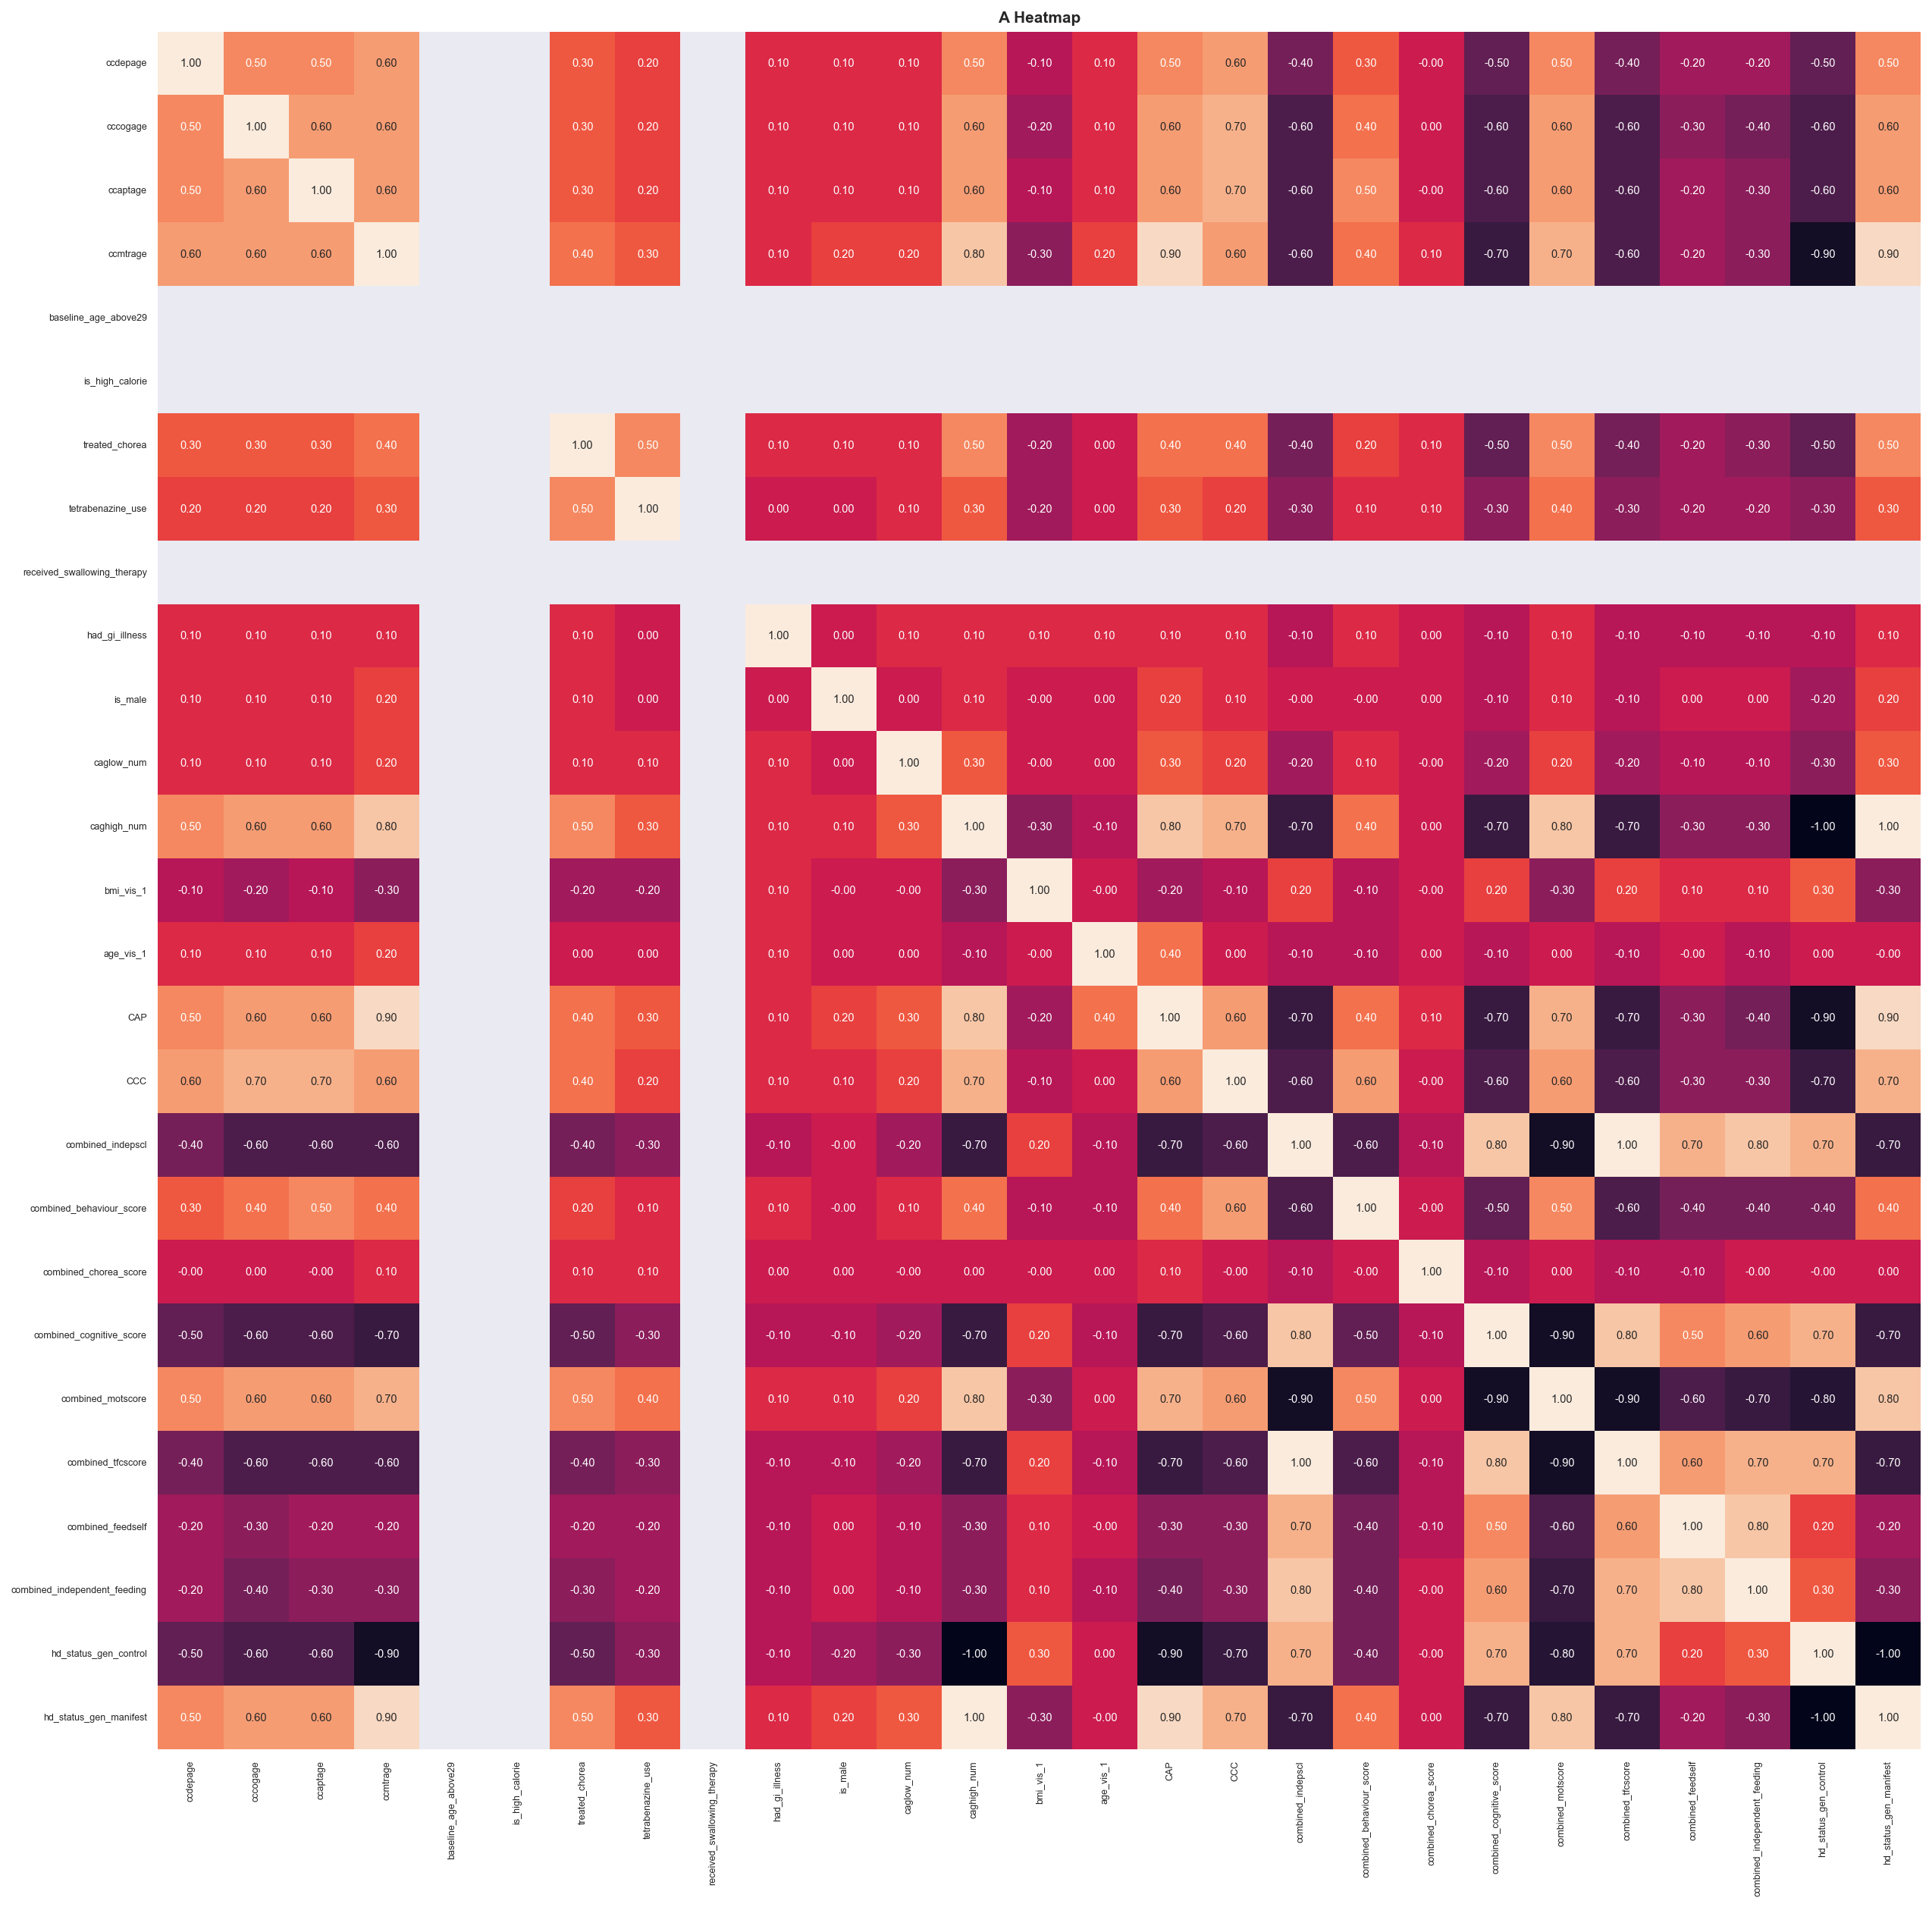

In [26]:
corrn = num_enrl.corr().round(1)
proj.plot_correl_heatmap(corrn, run_correlation=False, annot_size=7, xy_labe_size=15, figsize=(20, 20), show_cbar=False)

#### Drop some autocorrelated variables

In [27]:
drop_cols = proj.get_columns_with_pattern(num_enrl, 
                                          ['ccmtrage', 'caghigh', 'motscore', 'independent']).columns

display(drop_cols)
num_enrl = num_enrl.drop(drop_cols, axis=1)
display(num_enrl)

Index(['ccmtrage', 'caghigh_num', 'combined_motscore',
       'combined_independent_feeding'],
      dtype='object')

ccdepage  cccogage  ccaptage  baseline_age_above29  is_high_calorie  \
0         0.0       0.0       0.0                     1                0   
1        25.0      36.0      36.0                     1                0   
2         0.0       0.0       0.0                     1                0   
3        56.0      58.0      58.0                     1                0   
4         0.0       0.0      55.0                     1                0   
..        ...       ...       ...                   ...              ...   
861      28.0       0.0       0.0                     1                0   
862       0.0       0.0       0.0                     1                0   
863       0.0       0.0       0.0                     1                0   
864       0.0       0.0       0.0                     1                0   
865      43.0      52.0      43.0                     1                0   

     treated_chorea  tetrabenazine_use  received_swallowing_therapy  \
0                 0                  0                            0   
1                 1                  0                            0   
2                 0                  0                            0   
3                 0                  0                            0   
4                 0                  0                            0   
..              ...                ...                          ...   
861               1                  0                            0   
862               1                  0                            0   
863               0                  0                            0   
864               0                  0                            0   
865               0                  0                            0   

     had_gi_illness  is_male  caglow_num  bmi_vis_1  age_vis_1     CAP  CCC  \
0                 0        0          19       25.1         54  2322.0    1   
1                 0        1          17       25.7         40  2000.0    4   
2                 0        0          17       23.9         36   720.0    0   
3                 0        0          21       27.4         57  2394.0    4   
4                 1        1          18       20.6         58  2494.0    2   
..              ...      ...         ...        ...        ...     ...  ...   
861               0        0          22       19.2         41  1845.0    2   
862               0        1          17       24.5         69  2691.0    1   
863               0        0          18       24.7         56  1008.0    2   
864               0        1          17       29.0         74  1258.0    2   
865               0        1          13       25.5         48  2016.0    4   

     combined_indepscl  combined_behaviour_score  combined_chorea_score  \
0                570.0                      28.0                   32.0   
1                500.0                     177.0                   40.0   
2                600.0                       5.0                    0.0   
3                520.0                      66.0                   48.0   
4                390.0                     188.0                   84.0   
..                 ...                       ...                    ...   
861              550.0                       3.0                   76.0   
862              560.0                      95.0                   64.0   
863              600.0                       9.0                    0.0   
864              600.0                       5.0                    0.0   
865              445.0                     104.0                   36.0   

     combined_cognitive_score  combined_tfcscore  combined_feedself  \
0                      1427.0               73.0                6.0   
1                      1015.0               56.0                6.0   
2                      1876.0               78.0                6.0   
3                      1200.0               66.0                6.0   
4                       648.0     

#### Drop some meaningless (zero variance) variables

In [28]:
drop_cols = ['is_high_calorie', 'received_swallowing_therapy', 'baseline_age_above29'] + [c for c in list(proj.get_columns_with_pattern(num_enrl, 
                                                                                                                                        ['indepscl', 'fascore']).columns) if c.split('_vis_')[0] not in ['bmi', 'bmi_outcome']]
display(drop_cols)
num_enrl = num_enrl.drop(drop_cols, axis=1)
display(num_enrl)

['is_high_calorie',
 'received_swallowing_therapy',
 'baseline_age_above29',
 'combined_indepscl']

ccdepage  cccogage  ccaptage  treated_chorea  tetrabenazine_use  \
0         0.0       0.0       0.0               0                  0   
1        25.0      36.0      36.0               1                  0   
2         0.0       0.0       0.0               0                  0   
3        56.0      58.0      58.0               0                  0   
4         0.0       0.0      55.0               0                  0   
..        ...       ...       ...             ...                ...   
861      28.0       0.0       0.0               1                  0   
862       0.0       0.0       0.0               1                  0   
863       0.0       0.0       0.0               0                  0   
864       0.0       0.0       0.0               0                  0   
865      43.0      52.0      43.0               0                  0   

     had_gi_illness  is_male  caglow_num  bmi_vis_1  age_vis_1     CAP  CCC  \
0                 0        0          19       25.1         54  2322.0    1   
1                 0        1          17       25.7         40  2000.0    4   
2                 0        0          17       23.9         36   720.0    0   
3                 0        0          21       27.4         57  2394.0    4   
4                 1        1          18       20.6         58  2494.0    2   
..              ...      ...         ...        ...        ...     ...  ...   
861               0        0          22       19.2         41  1845.0    2   
862               0        1          17       24.5         69  2691.0    1   
863               0        0          18       24.7         56  1008.0    2   
864               0        1          17       29.0         74  1258.0    2   
865               0        1          13       25.5         48  2016.0    4   

     combined_behaviour_score  combined_chorea_score  \
0                        28.0                   32.0   
1                       177.0                   40.0   
2                         5.0                    0.0   
3                        66.0                   48.0   
4                       188.0                   84.0   
..                        ...                    ...   
861                       3.0                   76.0   
862                      95.0                   64.0   
863                       9.0                    0.0   
864                       5.0                    0.0   
865                     104.0                   36.0   

     combined_cognitive_score  combined_tfcscore  combined_feedself  \
0                      1427.0               73.0                6.0   
1                      1015.0               56.0                6.0   
2                      1876.0               78.0                6.0   
3                      1200.0               66.0                6.0   
4                       648.0               37.0                2.0   
..                        ...                ...                ...   
861                     799.0               57.0                6.0   
862                    1253.0               66.0                6.0   
863                    1410.0               78.0                6.0   
864                    1375.0               78.0                6.0   
865                     567.0               48.0                6.0   

     hd_status_gen_control  hd_status_gen_manifest  
0                        0                       1  
1                        0                       1  
2                        1                       0  
3                        0                       1  
4                        0                       1  
..                     ...                     ...  
861                      0                       1  
862                      0                       1  
863                      1                       0  
864                      1                       0  
865                      0                       1  

[866 rows x 19 columns]

#### Sixth BMI Level 

In [29]:
cols = 'bmi_level_vis_6'
# guide = {'0. underweight':1, '1. normal':2, '2. overweight':3, '3. obese':4, '4. severely obese':5}
y_int = str_vars[cols].str.split('. ').str[0].astype(int)
X = num_enrl
display(drop_cols, X, y_int)

['is_high_calorie',
 'received_swallowing_therapy',
 'baseline_age_above29',
 'combined_indepscl']

ccdepage  cccogage  ccaptage  treated_chorea  tetrabenazine_use  \
0         0.0       0.0       0.0               0                  0   
1        25.0      36.0      36.0               1                  0   
2         0.0       0.0       0.0               0                  0   
3        56.0      58.0      58.0               0                  0   
4         0.0       0.0      55.0               0                  0   
..        ...       ...       ...             ...                ...   
861      28.0       0.0       0.0               1                  0   
862       0.0       0.0       0.0               1                  0   
863       0.0       0.0       0.0               0                  0   
864       0.0       0.0       0.0               0                  0   
865      43.0      52.0      43.0               0                  0   

     had_gi_illness  is_male  caglow_num  bmi_vis_1  age_vis_1     CAP  CCC  \
0                 0        0          19       25.1         54  2322.0    1   
1                 0        1          17       25.7         40  2000.0    4   
2                 0        0          17       23.9         36   720.0    0   
3                 0        0          21       27.4         57  2394.0    4   
4                 1        1          18       20.6         58  2494.0    2   
..              ...      ...         ...        ...        ...     ...  ...   
861               0        0          22       19.2         41  1845.0    2   
862               0        1          17       24.5         69  2691.0    1   
863               0        0          18       24.7         56  1008.0    2   
864               0        1          17       29.0         74  1258.0    2   
865               0        1          13       25.5         48  2016.0    4   

     combined_behaviour_score  combined_chorea_score  \
0                        28.0                   32.0   
1                       177.0                   40.0   
2                         5.0                    0.0   
3                        66.0                   48.0   
4                       188.0                   84.0   
..                        ...                    ...   
861                       3.0                   76.0   
862                      95.0                   64.0   
863                       9.0                    0.0   
864                       5.0                    0.0   
865                     104.0                   36.0   

     combined_cognitive_score  combined_tfcscore  combined_feedself  \
0                      1427.0               73.0                6.0   
1                      1015.0               56.0                6.0   
2                      1876.0               78.0                6.0   
3                      1200.0               66.0                6.0   
4                       648.0               37.0                2.0   
..                        ...                ...                ...   
861                     799.0               57.0                6.0   
862                    1253.0               66.0                6.0   
863                    1410.0               78.0                6.0   
864                    1375.0               78.0                6.0   
865                     567.0               48.0                6.0   

     hd_status_gen_control  hd_status_gen_manifest  
0                        0                       1  
1                        0                       1  
2                        1                       0  
3                        0                       1  
4                        0                       1  
..                     ...                     ...  
861                      0                       1  
862                      0                       1  
863                      1                       0  
864                      1                       0  
865                      0                       1  

[866 rows x 19 columns]

0      2
1      1
2      2
3      2
4      1
      ..
861    1
862    1
863    2
864    2
865    1
Name: bmi_level_vis_6, Length: 866, dtype: int32

In [30]:
result = proj.get_correlcoeff_with_pvalues(X, y_int, 0.05)
display(result)

r       pval
bmi_vis_1                 0.81  7.64e-200
hd_status_gen_manifest   -0.32   1.54e-21
hd_status_gen_control     0.32   1.54e-21
CAP                      -0.30   1.18e-19
combined_tfcscore         0.24   6.13e-13
combined_cognitive_score  0.24   1.47e-12
combined_feedself         0.17   2.60e-07
tetrabenazine_use        -0.17   1.00e-06
treated_chorea           -0.16   1.36e-06
cccogage                 -0.16   1.41e-06
ccaptage                 -0.15   6.34e-06
CCC                      -0.15   1.72e-05
ccdepage                 -0.12   2.40e-04
combined_behaviour_score -0.09   6.62e-03

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Correlation Between BMI Classes and Variables'}, ylabel='Correlation Coefficient'>

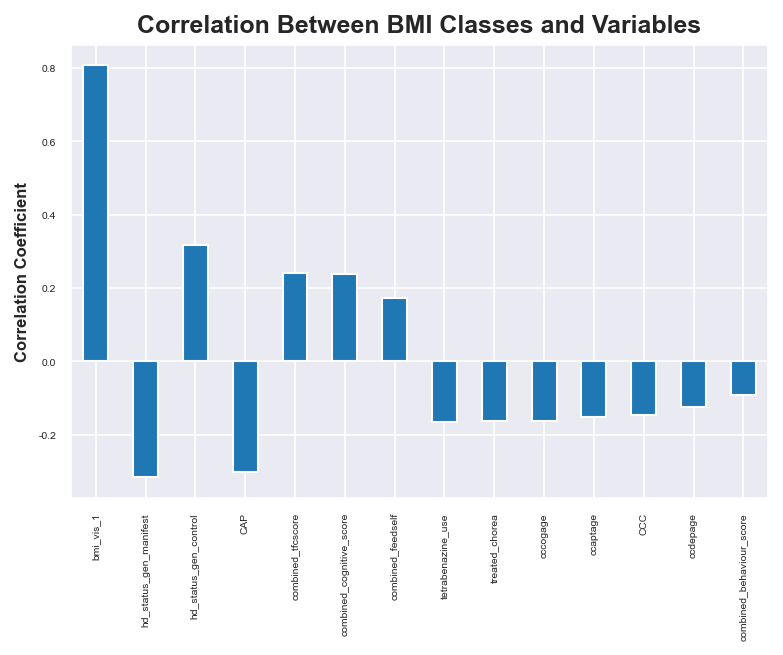

In [31]:
fig, ax1 = plt.subplots(figsize=[6, 4], dpi=150)
result['r'].plot(kind='bar', ax=ax1)
proj.adjust_axis(ax1, plot_title='Correlation Between BMI Classes and Variables',
                 y_labe="Correlation Coefficient", rotate_xticklabe=90)

### BMI Class Pearson's Correlation (and pvalues)  with UHDRS

In [32]:
combo = proj.get_columns_with_pattern(analyze_df, 'combine')
display(combo)
sc_combo = pd.DataFrame(s_prep.MinMaxScaler().fit_transform(combo),
                        columns=combo.columns)
display(sc_combo)
y_dum = pd.get_dummies(analyze_df['bmi_level_vis_6'])
display(y_dum)

result = proj.get_correlcoeff_with_pvalues(sc_combo, y_dum, 0.05)
for cat in result:
    print(cat)
    display(result[cat])
    print()

combined_indepscl  combined_behaviour_score  combined_chorea_score  \
0                570.0                      28.0                   32.0   
1                500.0                     177.0                   40.0   
2                600.0                       5.0                    0.0   
3                520.0                      66.0                   48.0   
4                390.0                     188.0                   84.0   
..                 ...                       ...                    ...   
861              550.0                       3.0                   76.0   
862              560.0                      95.0                   64.0   
863              600.0                       9.0                    0.0   
864              600.0                       5.0                    0.0   
865              445.0                     104.0                   36.0   

     combined_cognitive_score  combined_fascore  combined_motscore  \
0                      1427.0             150.0              126.0   
1                      1015.0             129.0              168.0   
2                      1876.0             150.0                2.0   
3                      1200.0             140.0              145.0   
4                       648.0              73.0              367.0   
..                        ...               ...                ...   
861                     799.0             138.0              252.0   
862                    1253.0             140.0              109.0   
863                    1410.0             150.0                0.0   
864                    1375.0             150.0                3.0   
865                     567.0              97.0              152.0   

     combined_tfcscore  combined_feedself  combined_height  \
0                 73.0                6.0            960.0   
1                 56.0                6.0           1081.8   
2                 78.0                6.0            960.0   
3                 66.0                6.0            987.5   
4                 37.0                2.0           1002.0   
..                 ...                ...              ...   
861               57.0                6.0            981.8   
862               66.0                6.0           1176.0   
863               78.0                6.0            918.4   
864               78.0                6.0           1004.5   
865               48.0                6.0           1050.0   

     combined_independent_feeding  combined_visdy  combined_weight  
0                             6.0          5106.0            357.3  
1                             6.0          5602.0            470.5  
2                             6.0          5442.0            371.7  
3                             6.0          5415.0            460.0  
4                             3.0          5360.0            342.1  
..                            ...             ...              ...  
861                           6.0          5401.0            324.4  
862                           6.0          5554.0            553.8  
863                           6.0          5655.0            372.8  
864                           6.0          5490.0            495.3  
865                           6.0          5742.0            467.0  

[866 rows x 12 columns]

combined_indepscl  combined_behaviour_score  combined_chorea_score  \
0                 0.94                  7.73e-02               3.81e-04   
1                 0.80                  4.89e-01               4.76e-04   
2                 1.00                  1.38e-02               0.00e+00   
3                 0.84                  1.82e-01               5.71e-04   
4                 0.59                  5.19e-01               9.99e-04   
..                 ...                       ...                    ...   
861               0.90                  8.29e-03               9.04e-04   
862               0.92                  2.62e-01               7.61e-04   
863               1.00                  2.49e-02               0.00e+00   
864               1.00                  1.38e-02               0.00e+00   
865               0.70                  2.87e-01               4.28e-04   

     combined_cognitive_score  combined_fascore  combined_motscore  \
0                        0.69              1.00           1.85e-01   
1                        0.49              0.86           2.46e-01   
2                        0.91              1.00           2.93e-03   
3                        0.58              0.93           2.13e-01   
4                        0.31              0.49           5.38e-01   
..                        ...               ...                ...   
861                      0.39              0.92           3.70e-01   
862                      0.61              0.93           1.60e-01   
863                      0.68              1.00           0.00e+00   
864                      0.66              1.00           4.40e-03   
865                      0.27              0.65           2.23e-01   

     combined_tfcscore  combined_feedself  combined_height  \
0                 0.94               1.00             0.40   
1                 0.72               1.00             0.73   
2                 1.00               1.00             0.40   
3                 0.85               1.00             0.48   
4                 0.47               0.33             0.51   
..                 ...                ...              ...   
861               0.73               1.00             0.46   
862               0.85               1.00             0.98   
863               1.00               1.00             0.29   
864               1.00               1.00             0.52   
865               0.62               1.00             0.64   

     combined_independent_feeding  combined_visdy  combined_weight  
0                             1.0            0.65             0.18  
1                             1.0            0.73             0.34  
2                             1.0            0.71             0.20  
3                             1.0            0.70             0.33  
4                             0.5            0.69             0.16  
..                            ...             ...              ...  
861                           1.0            0.70             0.14  
862                           1.0            0.72             0.46  
863                           1.0            0.74             0.20  
864                           1.0            0.71             0.38  
865                           1.0            0.75             0.34  

[866 rows x 12 columns]

0. underweight  1. normal  2. overweight  3. obese  4. severely obese
0                 0          0              1         0                  0
1                 0          1              0         0                  0
2                 0          0              1         0                  0
3                 0          0              1         0                  0
4                 0          1              0         0                  0
..              ...        ...            ...       ...                ...
861               0          1              0         0                  0
862               0          1              0         0                  0
863               0          0              1         0                  0
864               0          0              1         0                  0
865               0          1              0         0                  0

[866 rows x 5 columns]

0. underweight


r      pval
combined_weight              -0.27  8.44e-16
combined_motscore             0.18  9.12e-08
combined_indepscl            -0.16  4.10e-06
combined_cognitive_score     -0.15  1.01e-05
combined_tfcscore            -0.14  5.52e-05
combined_feedself            -0.12  5.62e-04
combined_fascore             -0.11  1.70e-03
combined_independent_feeding -0.11  1.72e-03
combined_behaviour_score      0.07  3.81e-02


1. normal


r      pval
combined_weight              -0.51  5.02e-58
combined_motscore             0.19  2.94e-08
combined_indepscl            -0.15  6.62e-06
combined_fascore             -0.14  2.87e-05
combined_tfcscore            -0.14  3.42e-05
combined_cognitive_score     -0.14  4.07e-05
combined_feedself            -0.11  9.19e-04
combined_independent_feeding -0.10  2.26e-03


2. overweight


r  pval
combined_height  0.08  0.03


3. obese


r      pval
combined_weight               0.47  1.90e-48
combined_motscore            -0.19  3.71e-08
combined_indepscl             0.16  2.34e-06
combined_tfcscore             0.14  4.72e-05
combined_fascore              0.13  7.41e-05
combined_cognitive_score      0.13  9.54e-05
combined_independent_feeding  0.10  2.12e-03
combined_feedself             0.10  2.34e-03
combined_height              -0.08  1.84e-02


4. severely obese


r      pval
combined_weight           0.46  1.02e-45
combined_motscore        -0.15  8.76e-06
combined_indepscl         0.13  1.21e-04
combined_tfcscore         0.13  1.39e-04
combined_cognitive_score  0.12  6.84e-04
combined_fascore          0.11  1.02e-03
combined_height          -0.09  8.45e-03

### BMI Class Pearson's Correlation (and pvalues)  with variables

In [33]:
y_dum

0. underweight  1. normal  2. overweight  3. obese  4. severely obese
0                 0          0              1         0                  0
1                 0          1              0         0                  0
2                 0          0              1         0                  0
3                 0          0              1         0                  0
4                 0          1              0         0                  0
..              ...        ...            ...       ...                ...
861               0          1              0         0                  0
862               0          1              0         0                  0
863               0          0              1         0                  0
864               0          0              1         0                  0
865               0          1              0         0                  0

[866 rows x 5 columns]

In [34]:
sc_df = pd.DataFrame(s_prep.MinMaxScaler().fit_transform(num_enrl),
                        columns=num_enrl.columns)
display(sc_df)
y_dum = pd.get_dummies(analyze_df['bmi_level_vis_6'])
display(y_dum)

result = proj.get_correlcoeff_with_pvalues(sc_df, y_dum, 0.05)
for cat in result:
    print(cat)
    display(result[cat])
    print()

ccdepage  cccogage  ccaptage  treated_chorea  tetrabenazine_use  \
0        0.00      0.00      0.00             0.0                0.0   
1        0.31      0.46      0.43             1.0                0.0   
2        0.00      0.00      0.00             0.0                0.0   
3        0.69      0.74      0.70             0.0                0.0   
4        0.00      0.00      0.66             0.0                0.0   
..        ...       ...       ...             ...                ...   
861      0.35      0.00      0.00             1.0                0.0   
862      0.00      0.00      0.00             1.0                0.0   
863      0.00      0.00      0.00             0.0                0.0   
864      0.00      0.00      0.00             0.0                0.0   
865      0.53      0.67      0.52             0.0                0.0   

     had_gi_illness  is_male  caglow_num  bmi_vis_1  age_vis_1   CAP   CCC  \
0               0.0      0.0        0.50       0.23       0.45  0.66  0.25   
1               0.0      1.0        0.40       0.24       0.19  0.54  1.00   
2               0.0      0.0        0.40       0.20       0.11  0.09  0.00   
3               0.0      0.0        0.60       0.28       0.51  0.68  1.00   
4               1.0      1.0        0.45       0.12       0.53  0.72  0.50   
..              ...      ...         ...        ...        ...   ...   ...   
861             0.0      0.0        0.65       0.08       0.21  0.49  0.50   
862             0.0      1.0        0.40       0.21       0.74  0.79  0.25   
863             0.0      0.0        0.45       0.22       0.49  0.19  0.50   
864             0.0      1.0        0.40       0.32       0.83  0.28  0.50   
865             0.0      1.0        0.20       0.23       0.34  0.55  1.00   

     combined_behaviour_score  combined_chorea_score  \
0                    7.73e-02               3.81e-04   
1                    4.89e-01               4.76e-04   
2                    1.38e-02               0.00e+00   
3                    1.82e-01               5.71e-04   
4                    5.19e-01               9.99e-04   
..                        ...                    ...   
861                  8.29e-03               9.04e-04   
862                  2.62e-01               7.61e-04   
863                  2.49e-02               0.00e+00   
864                  1.38e-02               0.00e+00   
865                  2.87e-01               4.28e-04   

     combined_cognitive_score  combined_tfcscore  combined_feedself  \
0                        0.69               0.94               1.00   
1                        0.49               0.72               1.00   
2                        0.91               1.00               1.00   
3                        0.58               0.85               1.00   
4                        0.31               0.47               0.33   
..                        ...                ...                ...   
861                      0.39               0.73               1.00   
862                      0.61               0.85               1.00   
863                      0.68               1.00               1.00   
864                      0.66               1.00               1.00   
865                      0.27               0.62               1.00   

     hd_status_gen_control  hd_status_gen_manifest  
0                      0.0                     1.0  
1                      0.0                     1.0  
2                      1.0                     0.0  
3                      0.0                     1.0  
4                      0.0                     1.0  
..                     ...                     ...  
861                    0.0                     1.0  
862                    0.0                     1.0  
863                    1.0                     0.0  
864                    1.0                     0.0  
865                    0.0                     1.0  

[866 rows x 19 columns]

0. underweight  1. normal  2. overweight  3. obese  4. severely obese
0                 0          0              1         0                  0
1                 0          1              0         0                  0
2                 0          0              1         0                  0
3                 0          0              1         0                  0
4                 0          1              0         0                  0
..              ...        ...            ...       ...                ...
861               0          1              0         0                  0
862               0          1              0         0                  0
863               0          0              1         0                  0
864               0          0              1         0                  0
865               0          1              0         0                  0

[866 rows x 5 columns]

0. underweight


r      pval
bmi_vis_1                -0.23  6.44e-12
combined_cognitive_score -0.15  1.01e-05
combined_tfcscore        -0.14  5.52e-05
hd_status_gen_manifest    0.12  5.13e-04
hd_status_gen_control    -0.12  5.13e-04
combined_feedself        -0.12  5.62e-04
tetrabenazine_use         0.09  8.75e-03
CAP                       0.09  9.42e-03
treated_chorea            0.08  1.89e-02
ccaptage                  0.08  2.16e-02
combined_behaviour_score  0.07  3.81e-02
cccogage                  0.07  4.65e-02


1. normal


r      pval
bmi_vis_1                -0.53  3.64e-63
hd_status_gen_manifest    0.22  2.40e-11
hd_status_gen_control    -0.22  2.40e-11
CAP                       0.21  2.87e-10
combined_tfcscore        -0.14  3.42e-05
combined_cognitive_score -0.14  4.07e-05
combined_feedself        -0.11  9.19e-04
tetrabenazine_use         0.10  4.12e-03
treated_chorea            0.09  7.41e-03
cccogage                  0.07  2.82e-02


2. overweight


r      pval
is_male    0.13  1.37e-04
ccdepage   0.08  2.01e-02
age_vis_1  0.07  3.48e-02


3. obese


r      pval
bmi_vis_1                 0.52  2.02e-60
CAP                      -0.19  7.88e-09
hd_status_gen_manifest   -0.19  1.60e-08
hd_status_gen_control     0.19  1.60e-08
combined_tfcscore         0.14  4.72e-05
combined_cognitive_score  0.13  9.54e-05
ccdepage                 -0.11  7.11e-04
tetrabenazine_use        -0.11  7.87e-04
ccaptage                 -0.11  9.34e-04
combined_feedself         0.10  2.34e-03
cccogage                 -0.10  4.13e-03
treated_chorea           -0.09  7.11e-03
CCC                      -0.07  2.94e-02


4. severely obese


r      pval
bmi_vis_1                 0.52  6.59e-61
CAP                      -0.17  3.09e-07
hd_status_gen_manifest   -0.17  6.32e-07
hd_status_gen_control     0.17  6.32e-07
cccogage                 -0.13  1.24e-04
combined_tfcscore         0.13  1.39e-04
CCC                      -0.13  1.62e-04
combined_cognitive_score  0.12  6.84e-04
is_male                  -0.11  9.29e-04
ccaptage                 -0.11  1.39e-03
treated_chorea           -0.11  1.82e-03
ccdepage                 -0.09  5.62e-03
age_vis_1                -0.08  1.31e-02
tetrabenazine_use        -0.07  3.43e-02

#### Pearson Correlation Coefficient

No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'A Column Chart'}>

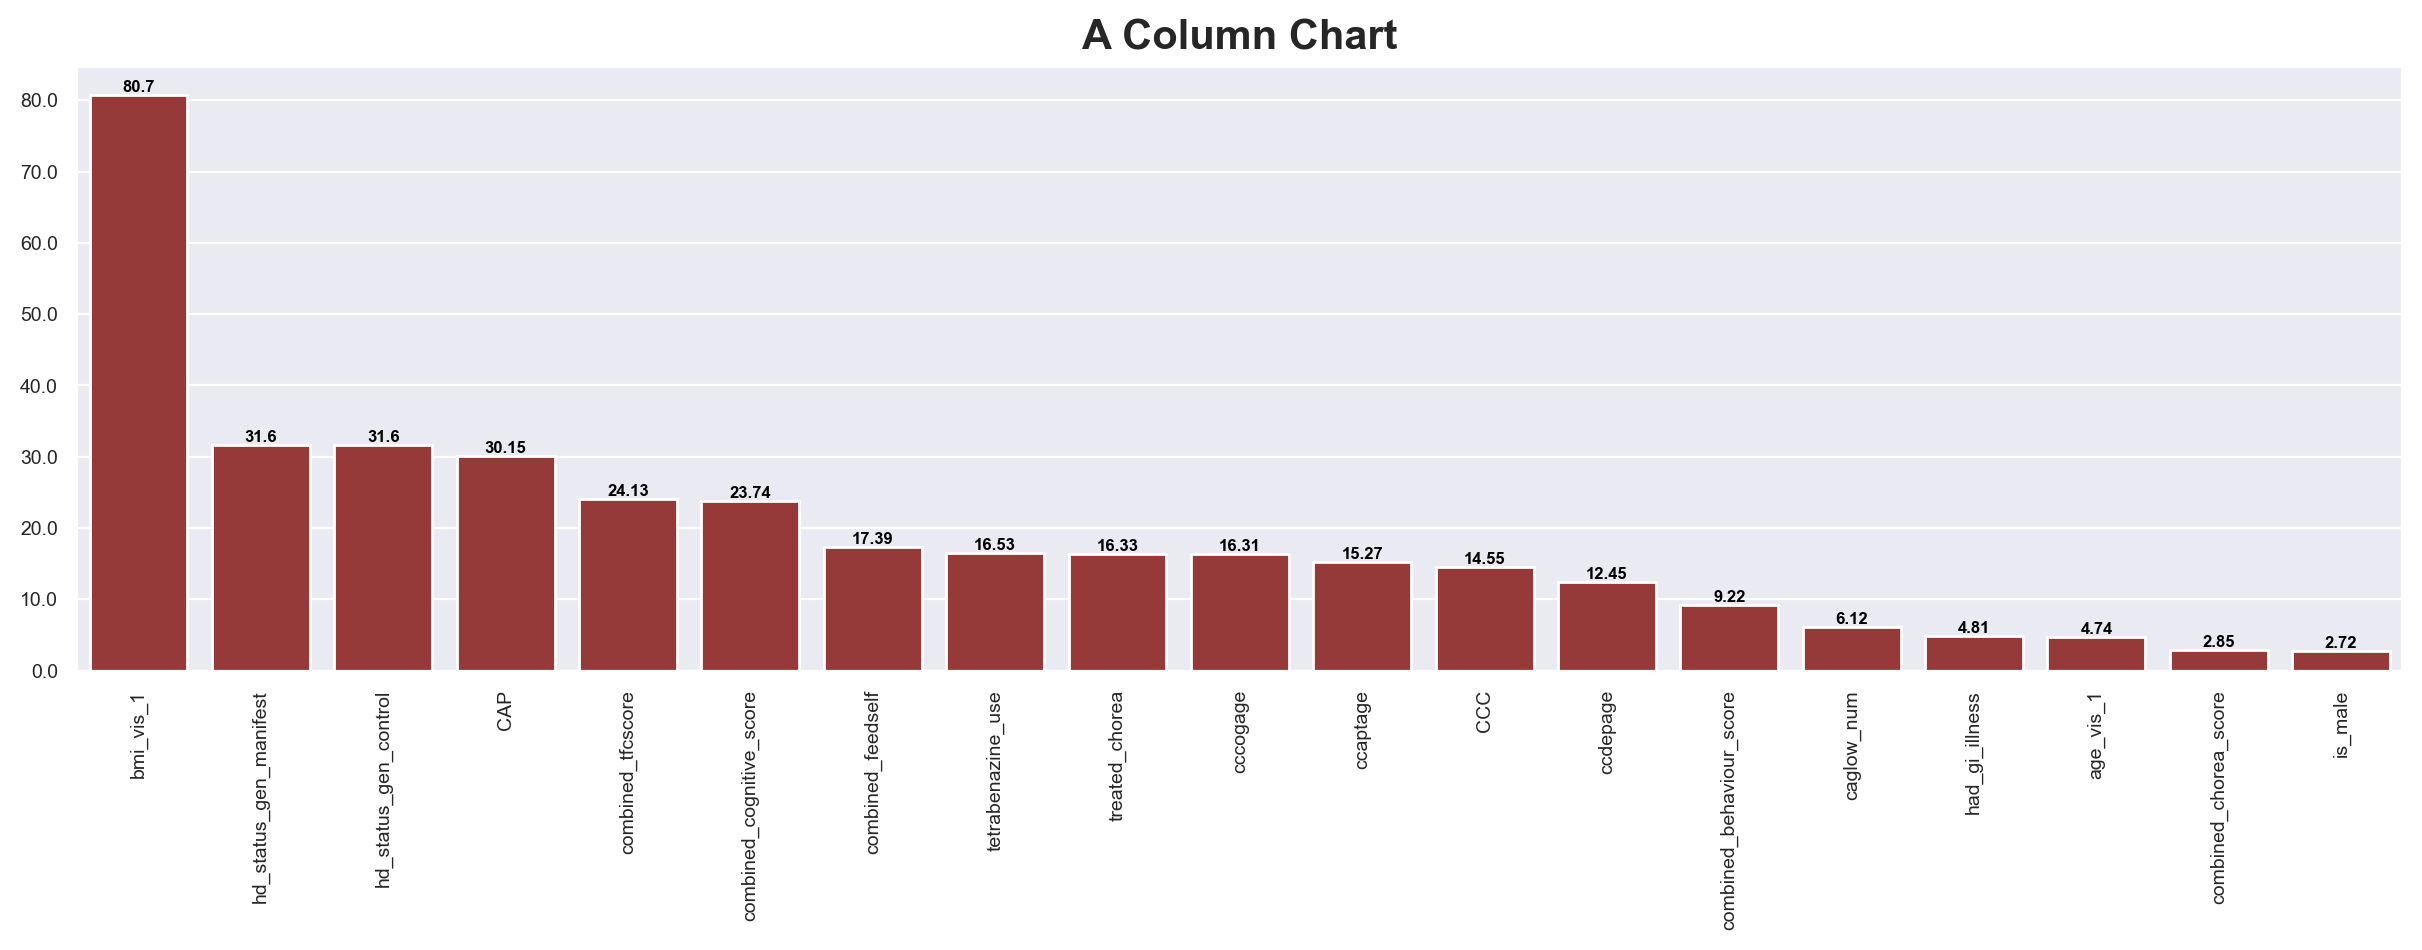

In [35]:
corrn = proj.corr_with_pearson(X, y_int)
proj.plot_column(corrn.index, corrn, color='brown', bot_labe_color='black', figsize=(15, 4), rotate_xticklabe=90)

### Visualize Cross-sectional Association Between BMI and Selected Features (Boxplot)

In [36]:
analyze_df

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0    R306384258      0       0.0      0       0.0      0       0.0      1   
1    R030280608      1      25.0      1      36.0      1      36.0      1   
2    R178172372      0       0.0      0       0.0      0       0.0      0   
3    R495731621      1      56.0      1      58.0      1      58.0      1   
4    R53406676X      0       0.0      0       0.0      1      55.0      1   
..          ...    ...       ...    ...       ...    ...       ...    ...   
861  R217461623      1      28.0      0       0.0      0       0.0      1   
862  R288781586      0       0.0      0       0.0      0       0.0      1   
863  R286179296      1       0.0      0       0.0      0       0.0      1   
864  R270141073      1       0.0      0       0.0      0       0.0      1   
865  R504028308      1      43.0      1      52.0      1      43.0      1   

     ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0        52.0           4.8      -0.1        -1.0              29   
1        39.0           6.0      -3.9        -1.0              26   
2         0.0           5.9       4.0         1.0              34   
3        55.0           5.8       0.6         1.0              30   
4        54.0           5.1      -1.4        -1.0              28   
..        ...           ...       ...         ...             ...   
861      38.0           5.9       1.1         1.0              31   
862      65.0           5.1      -0.6        -1.0              29   
863       0.0           5.2       2.2         1.0              32   
864       0.0           6.1      -0.3        -1.0              29   
865      45.0           5.3      -1.0        -1.0              29   

      bmi_diff_band  baseline_age_above29  visitnum  baseline_manifest_hd  \
0     [-1.0 to 0.0)                     1         6                     1   
1    [-4.0 to -3.0)                     1         7                     1   
2      [4.0 to 5.0)                     1         7                     0   
3      [0.0 to 1.0)                     1         7                     1   
4    [-2.0 to -1.0)                     1         6                     1   
..              ...                   ...       ...                   ...   
861    [1.0 to 2.0)                     1         7                     1   
862   [-1.0 to 0.0)                     1         6                     1   
863    [2.0 to 3.0)                     1         6                     0   
864   [-1.0 to 0.0)                     1         7                     0   
865   [-1.0 to 0.0)                     1         6                     1   

     is_high_calorie  treated_chorea  tetrabenazine_use  \
0                  0               0                  0   
1                  0               1                  0   
2                  0               0                  0   
3                  0               0                  0   
4                  0               0                  0   
..               ...             ...                ...   
861                0               1                  0   
862                0               1                  0   
863                0               0                  0   
864                0               0                  0   
865                0               0                  0   

     received_swallowing_therapy  had_gi_illness  is_male  caglow_num  \
0                              0               0        0          19   
1                              0               0        1          17   
2                              0               0        0          17   
3                              0               0        0          21   
4                              0               1        1          18   
..                           ...             ...      ...         ...   
861                            0               0        0          22   
862                            0     

#### CAG-Age-Product

In [37]:
sns.set_style('darkgrid')

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})
No handles with labels found to put in legend.


<AxesSubplot:title={'center':'CAP score per BMI Class \n(Fifth Follow-up)'}, xlabel='BMI class (fifth follow-up)', ylabel='CAP score'>

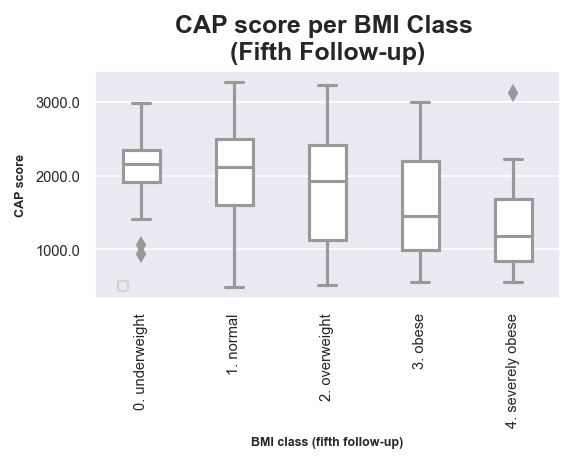

In [38]:
x, y, z = ['bmi_level_vis_1', 'CAP', 'hd_status_gen']
xorder = sorted(analyze_df[x].unique())

x, y = ['bmi_level_vis_6', 'CAP']

proj.plot_box(x=analyze_df[x], y=analyze_df[y], figsize=[4, 2],#condition_on=analyze_df[z],
              plot_title="CAP score per BMI Class \n(Fifth Follow-up)",
              x_labe_order=xorder, color='white', box_width=0.4, x_labe='BMI class (fifth follow-up)',
              y_labe='CAP score', rotate_xticklabe=90,  paletter=None,
             show_legend_at=[0.05, 0.03], legend_size=6)

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'CAP score per BMI Class \n(Fifth Follow-up)'}, xlabel='BMI class (fifth follow-up)', ylabel='CAP score'>

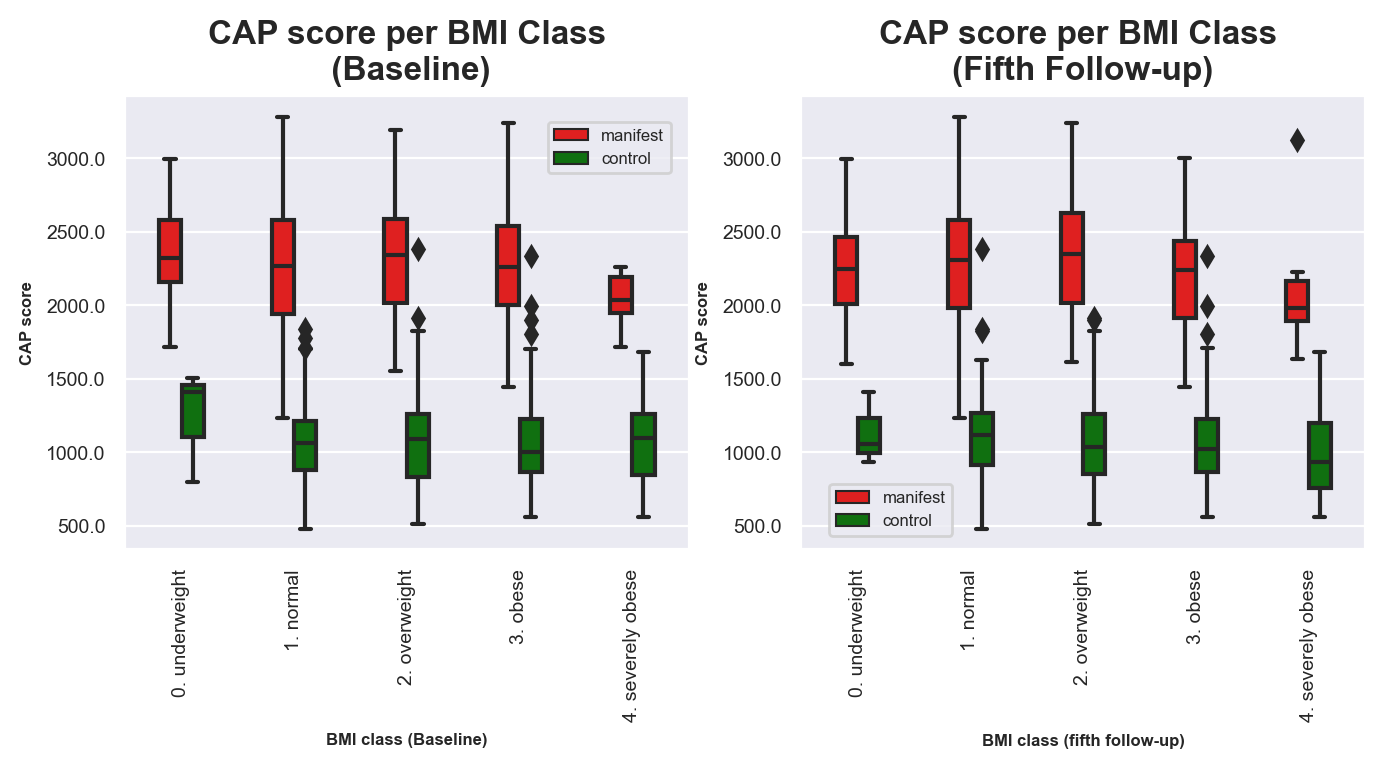

In [39]:
x, y, z = ['bmi_level_vis_1', 'CAP', 'hd_status_gen']
xorder = sorted(analyze_df[x].unique())
cmap = {'manifest':'red', 'control':'green'}

fig, (l, r) = plt.subplots(1, 2, figsize=[8, 3], dpi=200)
proj.plot_box(axis=l, x=analyze_df[x], y=analyze_df[y], condition_on=analyze_df[z],
              plot_title="CAP score per BMI Class\n (Baseline)",
              x_labe_order=xorder, paletter=cmap, box_width=0.4, x_labe='BMI class (Baseline)',
              y_labe='CAP score', rotate_xticklabe=90, 
             show_legend_at=[0.75, 0.83], legend_size=6)

x, y = ['bmi_level_vis_6', 'CAP']

proj.plot_box(axis=r, x=analyze_df[x], y=analyze_df[y], condition_on=analyze_df[z],
              plot_title="CAP score per BMI Class \n(Fifth Follow-up)",
              x_labe_order=xorder, paletter=cmap, box_width=0.4, x_labe='BMI class (fifth follow-up)',
              y_labe='CAP score', rotate_xticklabe=90, 
             show_legend_at=[0.05, 0.03], legend_size=6)

#### Feedself (sum of feedself at visit 1 - 5)

In [40]:
x, y = ['bmi_level_vis_6', 'combined_feedself',]
xorder = sorted(analyze_df[x].unique())


avg = analyze_df[[x, y]].groupby(x).describe().swaplevel(axis=1).droplevel(1, axis=1).loc[:, ['mean', 'std']]

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Ability to Eat Independently per BMI Class'}, xlabel='BMI class (Fifth Follow-up)', ylabel='combined_feedself'>

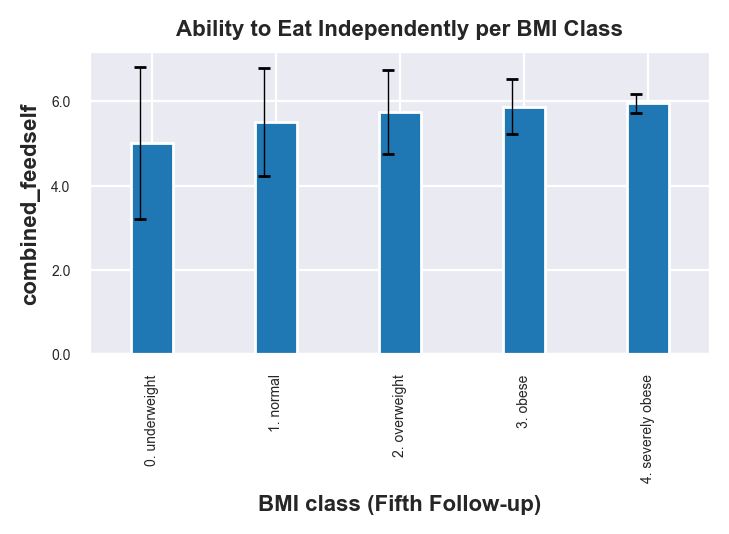

In [41]:
fig, ax1 = plt.subplots(figsize=[4, 2], dpi=200)
avg['mean'].plot(kind='bar', ax=ax1)
proj.plot_errorbars(axis=ax1, x=avg.index, y=avg['mean'], yerror=avg['std'])
proj.adjust_axis(axis=ax1, plot_title="Ability to Eat Independently per BMI Class",
                title_size=8, x_labe='BMI class (Fifth Follow-up)', y_labe='combined_feedself', 
                rotate_xticklabe=90, reduce_barw_by=1.5)

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Ability to Eat Independently per BMI Class'}, xlabel='BMI class (Fifth Follow-up)', ylabel='combined_feedself'>

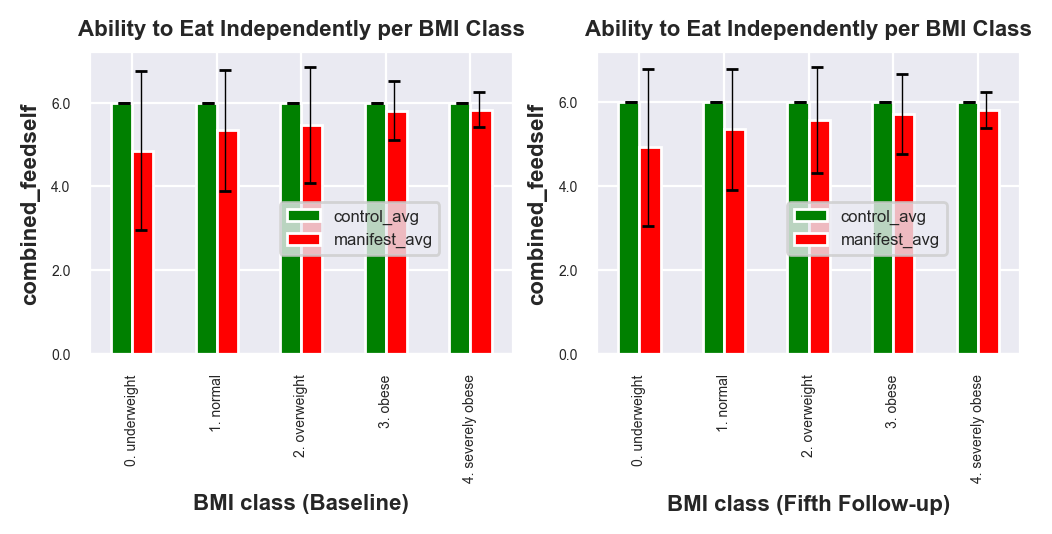

In [42]:
x, y = ['bmi_level_vis_1', 'combined_feedself']
ctl_avg = control[[x, y]].groupby(x).describe().swaplevel(axis=1).droplevel(1, axis=1).loc[:, ['mean', 'std']]
mnf_avg = manifest[[x, y]].groupby(x).describe().swaplevel(axis=1).droplevel(1, axis=1).loc[:, ['mean', 'std']]
ren_cols = {'mean_x':'control_avg', 'std_x':'control_std',
           'mean_y':'manifest_avg', 'std_y':'manifest_std'}
avg = pd.merge(ctl_avg, mnf_avg, left_index=True, right_index=True).rename(columns=ren_cols)

cmap = {c:'red' if 'manifest' in c else 'green' for c in avg.columns}
cols = [c for c in avg.columns if 'avg' in c]

fig, (l, r) = plt.subplots(1, 2, figsize=[6, 2], dpi=200)
avg[cols].plot(ax=l, kind='bar', color=cmap)
proj.adjust_axis(axis=l, plot_title="Ability to Eat Independently per BMI Class",
                 title_size=8, x_labe='BMI class (Baseline)', y_labe='combined_feedself', rotate_xticklabe=90, 
                 show_legend_at=[0.45, 0.33], legend_size=6)
proj.plot_errorbars(axis=l, x=avg.index, y=avg['control_avg'], yerror=avg['control_std'])
proj.plot_errorbars(axis=l, x=avg.index, y=avg['manifest_avg'], yerror=avg['manifest_std'], shift=True)

x, y = ['bmi_level_vis_6', 'combined_feedself',]
ctl_avg = control[[x, y]].groupby(x).describe().swaplevel(axis=1).droplevel(1, axis=1).loc[:, ['mean', 'std']]
mnf_avg = manifest[[x, y]].groupby(x).describe().swaplevel(axis=1).droplevel(1, axis=1).loc[:, ['mean', 'std']]
ren_cols = {'mean_x':'control_avg', 'std_x':'control_std',
           'mean_y':'manifest_avg', 'std_y':'manifest_std'}
avg = pd.merge(ctl_avg, mnf_avg, left_index=True, right_index=True).rename(columns=ren_cols)
avg[cols].plot(ax=r, kind='bar', color=cmap)
proj.adjust_axis(axis=r, plot_title="Ability to Eat Independently per BMI Class",
                 title_size=8, x_labe='BMI class (Fifth Follow-up)', y_labe='combined_feedself', rotate_xticklabe=90, 
                 show_legend_at=[0.45, 0.33], legend_size=6)
proj.plot_errorbars(axis=r, x=avg.index, y=avg['control_avg'], yerror=avg['control_std'])
proj.plot_errorbars(axis=r, x=avg.index, y=avg['manifest_avg'], yerror=avg['manifest_std'], shift=True)

#### Tetrabenazine use

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Tetrabenazine Use per BMI Class \n(Fifth Follow-up)'}, xlabel='Tetrabenazine use', ylabel='BMI class (fifth follow-up)'>

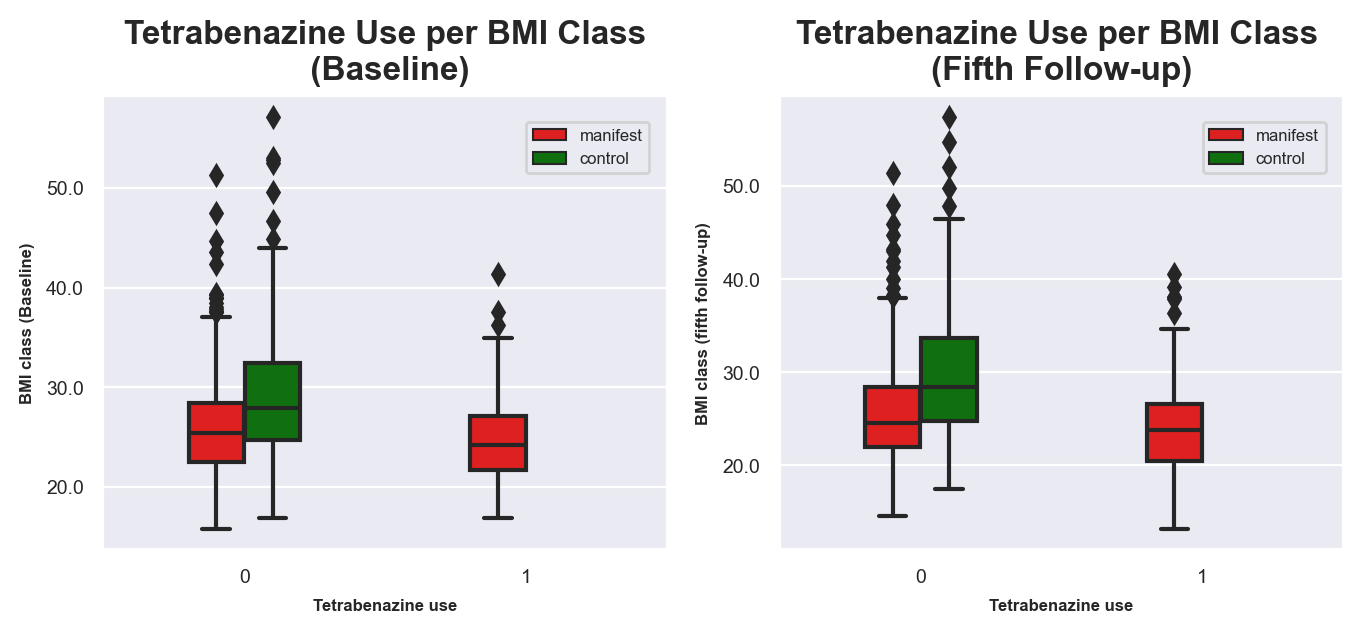

In [43]:
x, y, z = ['tetrabenazine_use', 'bmi_vis_1',  'hd_status_gen']
xorder = sorted(analyze_df[x].unique())
cmap = {'manifest':'red', 'control':'green'}

fig, (l, r) = plt.subplots(1, 2, figsize=[8, 3], dpi=200)
proj.plot_box(axis=l, x=analyze_df[x], y=analyze_df[y], condition_on=analyze_df[z],
              plot_title="Tetrabenazine Use per BMI Class\n (Baseline)",
              paletter=cmap, box_width=0.4, y_labe='BMI class (Baseline)',
              x_labe='Tetrabenazine use', 
             show_legend_at=[0.75, 0.83], legend_size=6)

y = 'bmi_vis_6'

proj.plot_box(axis=r, x=analyze_df[x], y=analyze_df[y], condition_on=analyze_df[z],
              plot_title="Tetrabenazine Use per BMI Class \n(Fifth Follow-up)",
              paletter=cmap, box_width=0.4, y_labe='BMI class (fifth follow-up)',
              x_labe='Tetrabenazine use', 
             show_legend_at=[0.75, 0.83], legend_size=6)

#### Treated_chorea

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Treated Chorea per BMI Class \n(Fifth Follow-up)'}, xlabel='treated_chorea', ylabel='BMI class (fifth follow-up)'>

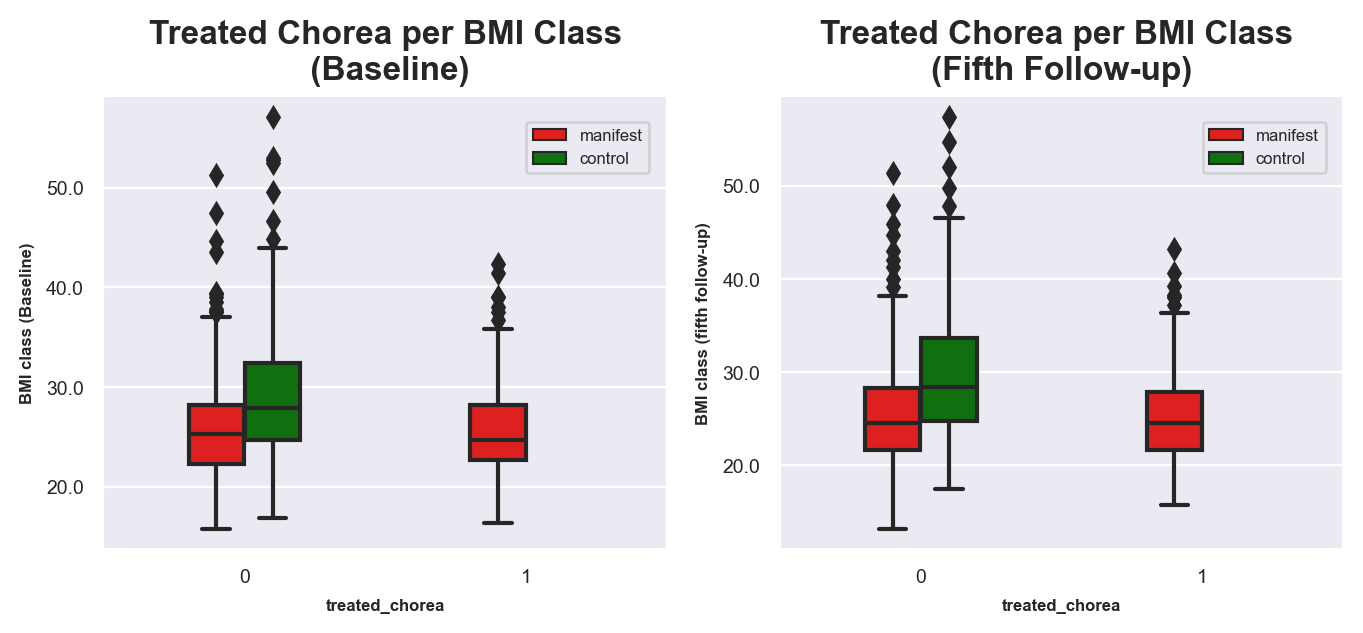

In [44]:
x, y, z = ['treated_chorea', 'bmi_vis_1',  'hd_status_gen']
xorder = sorted(analyze_df[x].unique())
cmap = {'manifest':'red', 'control':'green'}

fig, (l, r) = plt.subplots(1, 2, figsize=[8, 3], dpi=200)
proj.plot_box(axis=l, x=analyze_df[x], y=analyze_df[y], condition_on=analyze_df[z],
              plot_title="Treated Chorea per BMI Class\n (Baseline)",
              paletter=cmap, box_width=0.4, y_labe='BMI class (Baseline)',
              x_labe='treated_chorea', 
             show_legend_at=[0.75, 0.83], legend_size=6)

y = 'bmi_vis_6'

proj.plot_box(axis=r, x=analyze_df[x], y=analyze_df[y], condition_on=analyze_df[z],
              plot_title="Treated Chorea per BMI Class \n(Fifth Follow-up)",
              paletter=cmap, box_width=0.4, y_labe='BMI class (fifth follow-up)',
              x_labe='treated_chorea', 
             show_legend_at=[0.75, 0.83], legend_size=6)

#### Cognitive Impairment Onset Age

In [45]:
# proj.adjust_axis()

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Cognitive Impairment Onset Age per BMI Class'}, xlabel='BMI class (Fifth Follow-up)', ylabel='age of onset (cccog)'>

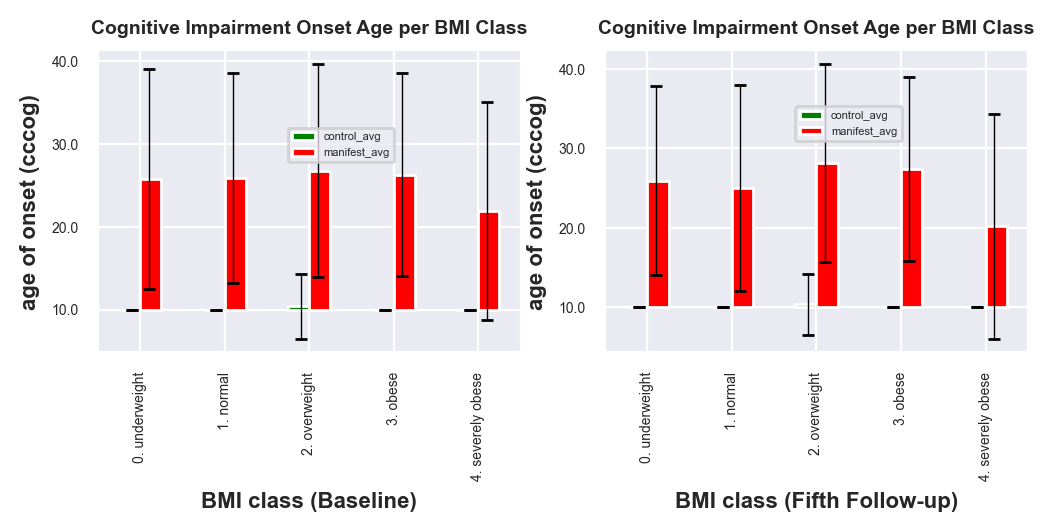

In [46]:
x, y = ['bmi_level_vis_1', 'cccogage']
ctl_avg = control[[x, y]].groupby(x).describe().swaplevel(axis=1).droplevel(1, axis=1).loc[:, ['mean', 'std']]
mnf_avg = manifest[[x, y]].groupby(x).describe().swaplevel(axis=1).droplevel(1, axis=1).loc[:, ['mean', 'std']]
ren_cols = {'mean_x':'control_avg', 'std_x':'control_std',
           'mean_y':'manifest_avg', 'std_y':'manifest_std'}
avg = pd.merge(ctl_avg, mnf_avg, left_index=True, right_index=True).rename(columns=ren_cols)

cmap = {c:'red' if 'manifest' in c else 'green' for c in avg.columns}
cols = [c for c in avg.columns if 'avg' in c]

fig, (l, r) = plt.subplots(1, 2, figsize=[6, 2], dpi=200)
avg[cols].plot(ax=l, kind='bar', color=cmap)
proj.adjust_axis(axis=l, plot_title="Cognitive Impairment Onset Age per BMI Class",
                 title_size=7, x_labe='BMI class (Baseline)', y_labe='age of onset (cccog)', rotate_xticklabe=90, 
                 show_legend_at=[0.45, 0.63], legend_size=4)
proj.plot_errorbars(axis=l, x=avg.index, y=avg['control_avg'], yerror=avg['control_std'])
proj.plot_errorbars(axis=l, x=avg.index, y=avg['manifest_avg'], yerror=avg['manifest_std'], shift=True)

x = 'bmi_level_vis_6'
ctl_avg = control[[x, y]].groupby(x).describe().swaplevel(axis=1).droplevel(1, axis=1).loc[:, ['mean', 'std']]
mnf_avg = manifest[[x, y]].groupby(x).describe().swaplevel(axis=1).droplevel(1, axis=1).loc[:, ['mean', 'std']]
ren_cols = {'mean_x':'control_avg', 'std_x':'control_std',
           'mean_y':'manifest_avg', 'std_y':'manifest_std'}
avg = pd.merge(ctl_avg, mnf_avg, left_index=True, right_index=True).rename(columns=ren_cols)
avg[cols].plot(ax=r, kind='bar', color=cmap)
proj.adjust_axis(axis=r, plot_title="Cognitive Impairment Onset Age per BMI Class",
                 title_size=7, x_labe='BMI class (Fifth Follow-up)', y_labe='age of onset (cccog)', 
                 rotate_xticklabe=90, show_legend_at=[0.45, 0.7], legend_size=4)
proj.plot_errorbars(axis=r, x=avg.index, y=avg['control_avg'], yerror=avg['control_std'])
proj.plot_errorbars(axis=r, x=avg.index, y=avg['manifest_avg'], yerror=avg['manifest_std'], shift=True)

#### Apathy Onset Age

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Apathy Onset Age per BMI Class'}, xlabel='BMI class (Fifth Follow-up)', ylabel='age of onset (ccapt)'>

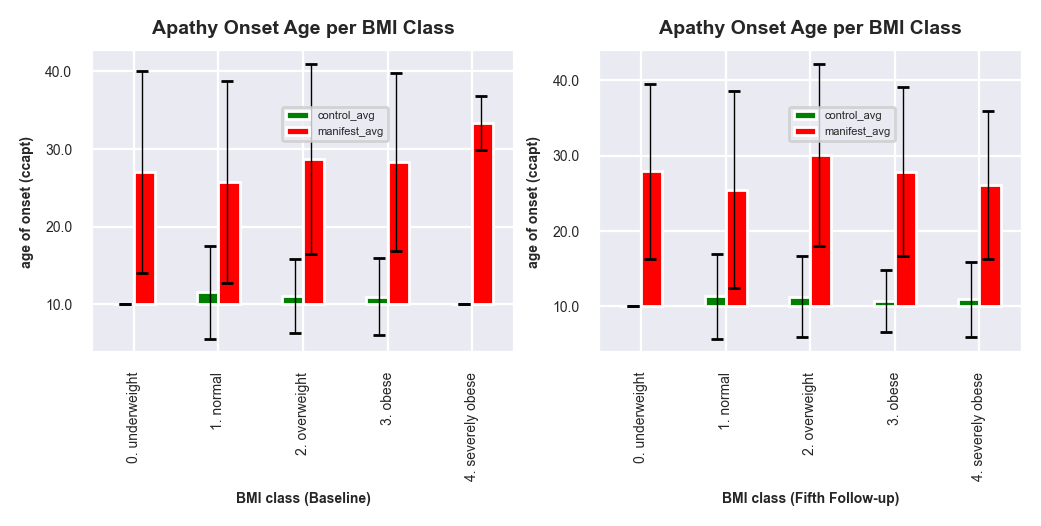

In [47]:
x, y = ['bmi_level_vis_1', 'ccaptage']
ctl_avg = control[[x, y]].groupby(x).describe().swaplevel(axis=1).droplevel(1, axis=1).loc[:, ['mean', 'std']]
mnf_avg = manifest[[x, y]].groupby(x).describe().swaplevel(axis=1).droplevel(1, axis=1).loc[:, ['mean', 'std']]
ren_cols = {'mean_x':'control_avg', 'std_x':'control_std',
           'mean_y':'manifest_avg', 'std_y':'manifest_std'}
avg = pd.merge(ctl_avg, mnf_avg, left_index=True, right_index=True).rename(columns=ren_cols)

cmap = {c:'red' if 'manifest' in c else 'green' for c in avg.columns}
cols = [c for c in avg.columns if 'avg' in c]

fig, (l, r) = plt.subplots(1, 2, figsize=[6, 2], dpi=200)
avg[cols].plot(ax=l, kind='bar', color=cmap)
proj.adjust_axis(axis=l, plot_title="Apathy Onset Age per BMI Class",
                 title_size=7, x_labe='BMI class (Baseline)', y_labe='age of onset (ccapt)', rotate_xticklabe=90, 
                 show_legend_at=[0.45, 0.7], legend_size=4, xy_labe_size=5)
proj.plot_errorbars(axis=l, x=avg.index, y=avg['control_avg'], yerror=avg['control_std'])
proj.plot_errorbars(axis=l, x=avg.index, y=avg['manifest_avg'], yerror=avg['manifest_std'], shift=True)

x = 'bmi_level_vis_6'
ctl_avg = control[[x, y]].groupby(x).describe().swaplevel(axis=1).droplevel(1, axis=1).loc[:, ['mean', 'std']]
mnf_avg = manifest[[x, y]].groupby(x).describe().swaplevel(axis=1).droplevel(1, axis=1).loc[:, ['mean', 'std']]
ren_cols = {'mean_x':'control_avg', 'std_x':'control_std',
           'mean_y':'manifest_avg', 'std_y':'manifest_std'}
avg = pd.merge(ctl_avg, mnf_avg, left_index=True, right_index=True).rename(columns=ren_cols)
avg[cols].plot(ax=r, kind='bar', color=cmap)
proj.adjust_axis(axis=r, plot_title="Apathy Onset Age per BMI Class",
                 title_size=7, x_labe='BMI class (Fifth Follow-up)', y_labe='age of onset (ccapt)', 
                 rotate_xticklabe=90, show_legend_at=[0.45, 0.7], legend_size=4, xy_labe_size=5)
proj.plot_errorbars(axis=r, x=avg.index, y=avg['control_avg'], yerror=avg['control_std'])
proj.plot_errorbars(axis=r, x=avg.index, y=avg['manifest_avg'], yerror=avg['manifest_std'], shift=True)

#### Depression Onset Age

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Depression Onset Age per BMI Class'}, xlabel='BMI class (Fifth Follow-up)', ylabel='age of onset (ccdep)'>

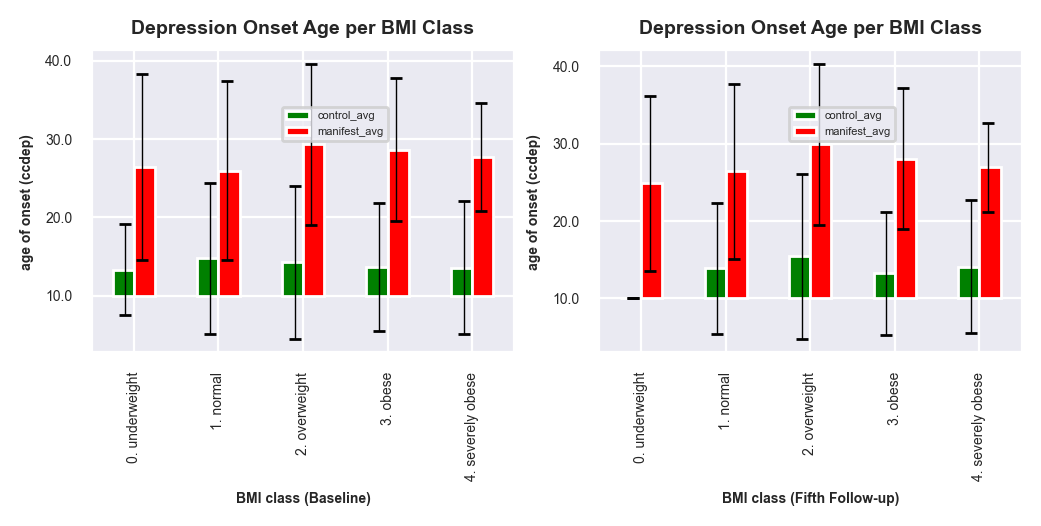

In [48]:
x, y = ['bmi_level_vis_1', 'ccdepage']
ctl_avg = control[[x, y]].groupby(x).describe().swaplevel(axis=1).droplevel(1, axis=1).loc[:, ['mean', 'std']]
mnf_avg = manifest[[x, y]].groupby(x).describe().swaplevel(axis=1).droplevel(1, axis=1).loc[:, ['mean', 'std']]
ren_cols = {'mean_x':'control_avg', 'std_x':'control_std',
           'mean_y':'manifest_avg', 'std_y':'manifest_std'}
avg = pd.merge(ctl_avg, mnf_avg, left_index=True, right_index=True).rename(columns=ren_cols)

cmap = {c:'red' if 'manifest' in c else 'green' for c in avg.columns}
cols = [c for c in avg.columns if 'avg' in c]

fig, (l, r) = plt.subplots(1, 2, figsize=[6, 2], dpi=200)
avg[cols].plot(ax=l, kind='bar', color=cmap)
proj.adjust_axis(axis=l, plot_title="Depression Onset Age per BMI Class",
                 title_size=7, x_labe='BMI class (Baseline)', y_labe='age of onset (ccdep)', rotate_xticklabe=90, 
                 show_legend_at=[0.45, 0.7], legend_size=4, xy_labe_size=5)
proj.plot_errorbars(axis=l, x=avg.index, y=avg['control_avg'], yerror=avg['control_std'])
proj.plot_errorbars(axis=l, x=avg.index, y=avg['manifest_avg'], yerror=avg['manifest_std'], shift=True)

x = 'bmi_level_vis_6'
ctl_avg = control[[x, y]].groupby(x).describe().swaplevel(axis=1).droplevel(1, axis=1).loc[:, ['mean', 'std']]
mnf_avg = manifest[[x, y]].groupby(x).describe().swaplevel(axis=1).droplevel(1, axis=1).loc[:, ['mean', 'std']]
ren_cols = {'mean_x':'control_avg', 'std_x':'control_std',
           'mean_y':'manifest_avg', 'std_y':'manifest_std'}
avg = pd.merge(ctl_avg, mnf_avg, left_index=True, right_index=True).rename(columns=ren_cols)
avg[cols].plot(ax=r, kind='bar', color=cmap)
proj.adjust_axis(axis=r, plot_title="Depression Onset Age per BMI Class",
                 title_size=7, x_labe='BMI class (Fifth Follow-up)', y_labe='age of onset (ccdep)', 
                 rotate_xticklabe=90, show_legend_at=[0.45, 0.7], legend_size=4, xy_labe_size=5)
proj.plot_errorbars(axis=r, x=avg.index, y=avg['control_avg'], yerror=avg['control_std'])
proj.plot_errorbars(axis=r, x=avg.index, y=avg['manifest_avg'], yerror=avg['manifest_std'], shift=True)

#### Combined Clinical Characteristics

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Combined Clinical Characteristics \nper BMI Class (Fifth Follow-up)'}, xlabel='CCC', ylabel='BMI class (fifth follow-up)'>

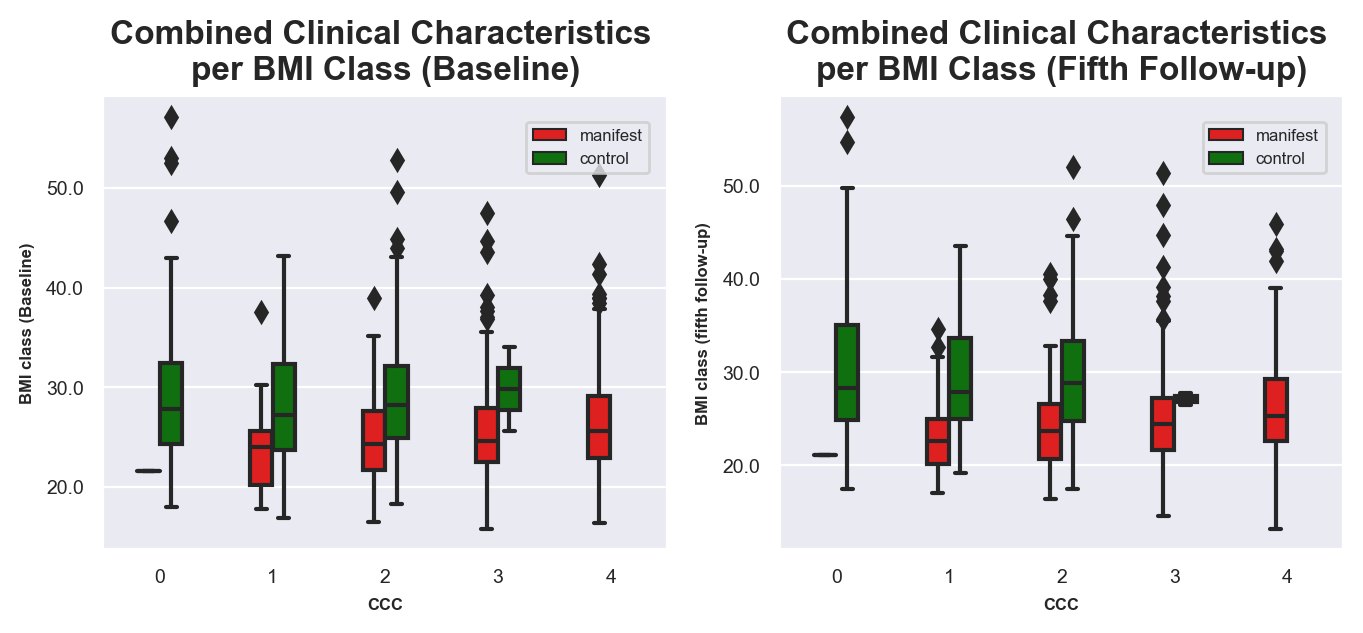

In [49]:
x, y, z = ['CCC', 'bmi_vis_1',  'hd_status_gen']
xorder = sorted(analyze_df[x].unique())
cmap = {'manifest':'red', 'control':'green'}

fig, (l, r) = plt.subplots(1, 2, figsize=[8, 3], dpi=200)
proj.plot_box(axis=l, x=analyze_df[x], y=analyze_df[y], condition_on=analyze_df[z],
              plot_title="Combined Clinical Characteristics \nper BMI Class (Baseline)",
              paletter=cmap, box_width=0.4, y_labe='BMI class (Baseline)',
              x_labe='CCC', 
             show_legend_at=[0.75, 0.83], legend_size=6)

y = 'bmi_vis_6'

proj.plot_box(axis=r, x=analyze_df[x], y=analyze_df[y], condition_on=analyze_df[z],
              plot_title="Combined Clinical Characteristics \nper BMI Class (Fifth Follow-up)",
              paletter=cmap, box_width=0.4, y_labe='BMI class (fifth follow-up)',
              x_labe='CCC', 
             show_legend_at=[0.75, 0.83], legend_size=6)

#### Caglow

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Smaller Allele CAG per BMI Class \n(Fifth Follow-up)'}, xlabel='caglow', ylabel='BMI class (fifth follow-up)'>

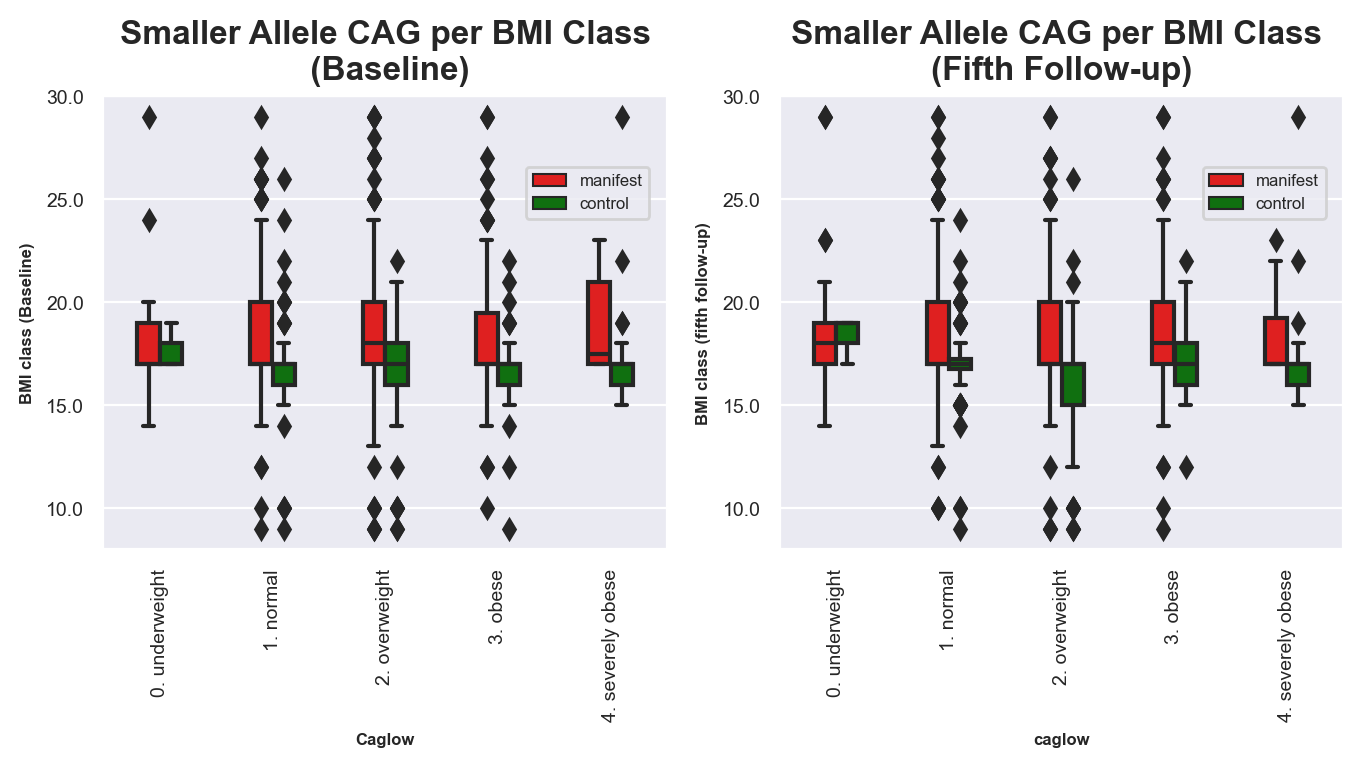

In [50]:
x, y, z = ['bmi_level_vis_1', 'caglow_num', 'hd_status_gen']
xorder = sorted(analyze_df[x].unique())
cmap = {'manifest':'red', 'control':'green'}

fig, (l, r) = plt.subplots(1, 2, figsize=[8, 3], dpi=200)
proj.plot_box(axis=l, x=analyze_df[x], y=analyze_df[y], condition_on=analyze_df[z],
              plot_title="Smaller Allele CAG per BMI Class\n (Baseline)",
              paletter=cmap,  y_labe='BMI class (Baseline)', box_width=0.4,
              x_labe='Caglow', rotate_xticklabe=90, x_labe_order=xorder,
             show_legend_at=[0.75, 0.73], legend_size=6)

x = 'bmi_level_vis_6'

proj.plot_box(axis=r, x=analyze_df[x], y=analyze_df[y], condition_on=analyze_df[z],
              plot_title="Smaller Allele CAG per BMI Class \n(Fifth Follow-up)",
              paletter=cmap, y_labe='BMI class (fifth follow-up)', box_width=0.4,
              x_labe='caglow', rotate_xticklabe=90, x_labe_order=xorder,
             show_legend_at=[0.75, 0.73], legend_size=6)

#### Gastrointestinal illness

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Medical History of Gastrointestinal Illness \nper BMI Class (Fifth Follow-up)'}, xlabel='had gi illness', ylabel='BMI class (fifth follow-up)'>

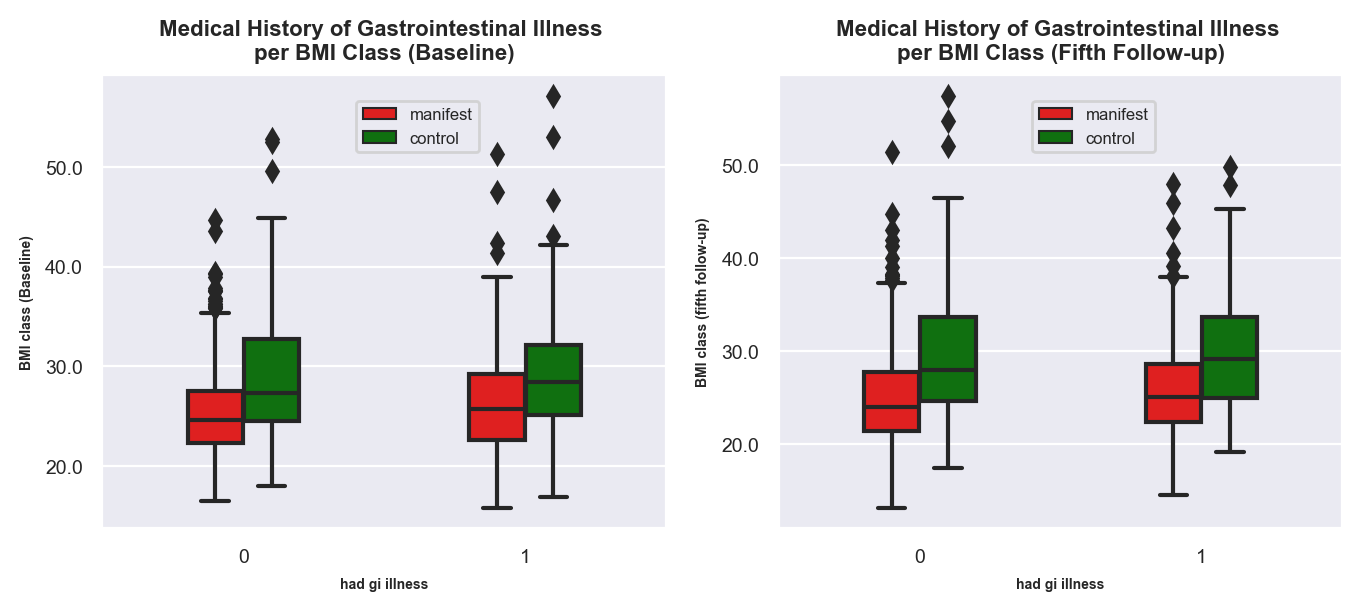

In [51]:
x, y, z = ['had_gi_illness', 'bmi_vis_1',  'hd_status_gen']
xorder = sorted(analyze_df[x].unique())
cmap = {'manifest':'red', 'control':'green'}

fig, (l, r) = plt.subplots(1, 2, figsize=[8, 3], dpi=200)
proj.plot_box(axis=l, x=analyze_df[x], y=analyze_df[y], condition_on=analyze_df[z],
              title_size=8, plot_title="Medical History of Gastrointestinal Illness \nper BMI Class (Baseline)",
              paletter=cmap, box_width=0.4, y_labe='BMI class (Baseline)',
              x_labe='had gi illness', xy_labe_size=5,
             show_legend_at=[0.45, 0.83], legend_size=6)

y = 'bmi_vis_6'

proj.plot_box(axis=r, x=analyze_df[x], y=analyze_df[y], condition_on=analyze_df[z],
              plot_title="Medical History of Gastrointestinal Illness \nper BMI Class (Fifth Follow-up)",
              title_size=8, paletter=cmap, box_width=0.4, y_labe='BMI class (fifth follow-up)',
              x_labe='had gi illness',  xy_labe_size=5,
             show_legend_at=[0.45, 0.83], legend_size=6)

#### Gender

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Gender per BMI Class \n(Fifth Follow-up)'}, xlabel='is_male', ylabel='BMI class (fifth follow-up)'>

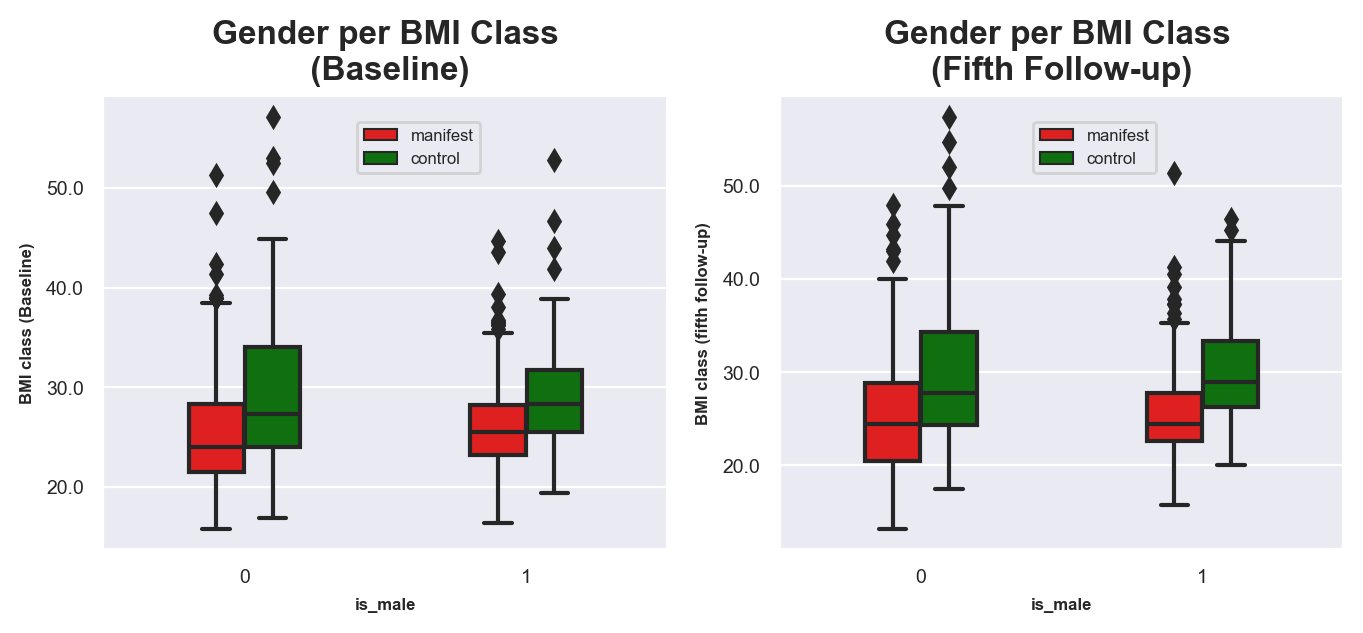

In [52]:
x, y, z = ['is_male', 'bmi_vis_1',  'hd_status_gen']
xorder = sorted(analyze_df[x].unique())
cmap = {'manifest':'red', 'control':'green'}

fig, (l, r) = plt.subplots(1, 2, figsize=[8, 3], dpi=200)
proj.plot_box(axis=l, x=analyze_df[x], y=analyze_df[y], condition_on=analyze_df[z],
              plot_title="Gender per BMI Class\n (Baseline)",
              paletter=cmap, box_width=0.4, y_labe='BMI class (Baseline)',
              x_labe='is_male', 
             show_legend_at=[0.45, 0.83], legend_size=6)

y = 'bmi_vis_6'

proj.plot_box(axis=r, x=analyze_df[x], y=analyze_df[y], condition_on=analyze_df[z],
              plot_title="Gender per BMI Class \n(Fifth Follow-up)",
              paletter=cmap, box_width=0.4, y_labe='BMI class (fifth follow-up)',
              x_labe='is_male', 
             show_legend_at=[0.45, 0.83], legend_size=6)

#### Age

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Baseline Age per BMI Class (Fifth Follow-up)'}, xlabel='BMI class (Fifth Follow-up)', ylabel='Baseline Age'>

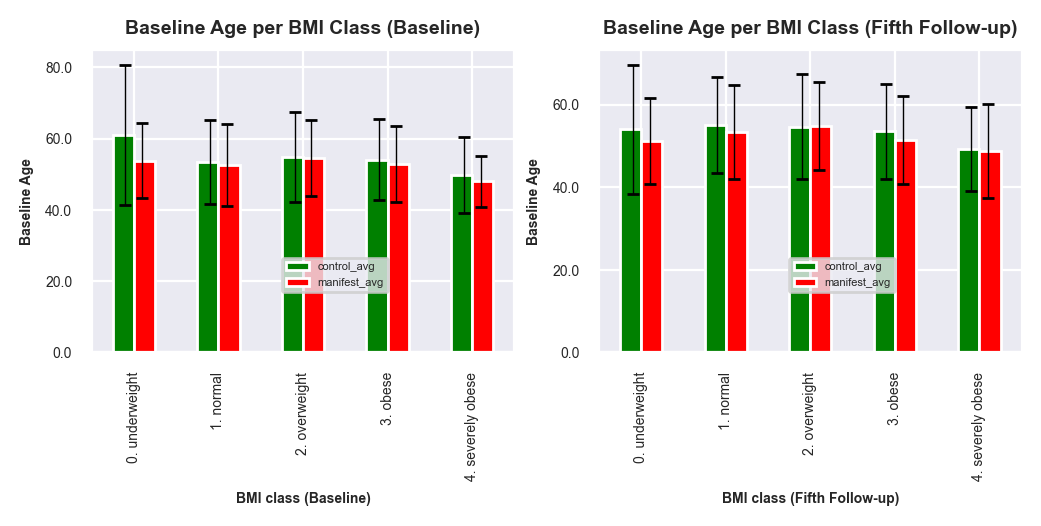

In [53]:
x, y = ['bmi_level_vis_1', 'age_vis_1']
ctl_avg = control[[x, y]].groupby(x).describe().swaplevel(axis=1).droplevel(1, axis=1).loc[:, ['mean', 'std']]
mnf_avg = manifest[[x, y]].groupby(x).describe().swaplevel(axis=1).droplevel(1, axis=1).loc[:, ['mean', 'std']]
ren_cols = {'mean_x':'control_avg', 'std_x':'control_std',
           'mean_y':'manifest_avg', 'std_y':'manifest_std'}
avg = pd.merge(ctl_avg, mnf_avg, left_index=True, right_index=True).rename(columns=ren_cols)

cmap = {c:'red' if 'manifest' in c else 'green' for c in avg.columns}
cols = [c for c in avg.columns if 'avg' in c]

fig, (l, r) = plt.subplots(1, 2, figsize=[6, 2], dpi=200)
avg[cols].plot(ax=l, kind='bar', color=cmap)
proj.adjust_axis(axis=l, plot_title="Baseline Age per BMI Class (Baseline)",
                 title_size=7, x_labe='BMI class (Baseline)', y_labe='Baseline Age', rotate_xticklabe=90, 
                 show_legend_at=[0.45, 0.2], legend_size=4, xy_labe_size=5)
proj.plot_errorbars(axis=l, x=avg.index, y=avg['control_avg'], yerror=avg['control_std'])
proj.plot_errorbars(axis=l, x=avg.index, y=avg['manifest_avg'], yerror=avg['manifest_std'], shift=True)

x = 'bmi_level_vis_6'
ctl_avg = control[[x, y]].groupby(x).describe().swaplevel(axis=1).droplevel(1, axis=1).loc[:, ['mean', 'std']]
mnf_avg = manifest[[x, y]].groupby(x).describe().swaplevel(axis=1).droplevel(1, axis=1).loc[:, ['mean', 'std']]
ren_cols = {'mean_x':'control_avg', 'std_x':'control_std',
           'mean_y':'manifest_avg', 'std_y':'manifest_std'}
avg = pd.merge(ctl_avg, mnf_avg, left_index=True, right_index=True).rename(columns=ren_cols)
avg[cols].plot(ax=r, kind='bar', color=cmap)
proj.adjust_axis(axis=r, plot_title="Baseline Age per BMI Class (Fifth Follow-up)",
                 title_size=7, x_labe='BMI class (Fifth Follow-up)', y_labe='Baseline Age', 
                 rotate_xticklabe=90, show_legend_at=[0.45, 0.2], legend_size=4, xy_labe_size=5)
proj.plot_errorbars(axis=r, x=avg.index, y=avg['control_avg'], yerror=avg['control_std'])
proj.plot_errorbars(axis=r, x=avg.index, y=avg['manifest_avg'], yerror=avg['manifest_std'], shift=True)

In [54]:
y_cat = str_vars['bmi_level_vis_6']

display(y_cat,
        y_cat.value_counts().sort_index())

0      2. overweight
1          1. normal
2      2. overweight
3      2. overweight
4          1. normal
           ...      
861        1. normal
862        1. normal
863    2. overweight
864    2. overweight
865        1. normal
Name: bmi_level_vis_6, Length: 866, dtype: object

0. underweight        34
1. normal            352
2. overweight        256
3. obese             185
4. severely obese     39
Name: bmi_level_vis_6, dtype: int64

## Relationship Between BMI Class & Top 12 variables

In [55]:
drop_cols = proj.get_columns_with_pattern(X, 'hd_status').columns
top12 = X.drop(drop_cols, axis=1).select_dtypes(exclude='object').columns
display(top12)

Index(['ccdepage', 'cccogage', 'ccaptage', 'treated_chorea',
       'tetrabenazine_use', 'had_gi_illness', 'is_male', 'caglow_num',
       'bmi_vis_1', 'age_vis_1', 'CAP', 'CCC', 'combined_behaviour_score',
       'combined_chorea_score', 'combined_cognitive_score',
       'combined_tfcscore', 'combined_feedself'],
      dtype='object')

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})
No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})
No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})
No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})
No handles 

No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})
No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})
No handles with labels found to put in legend.


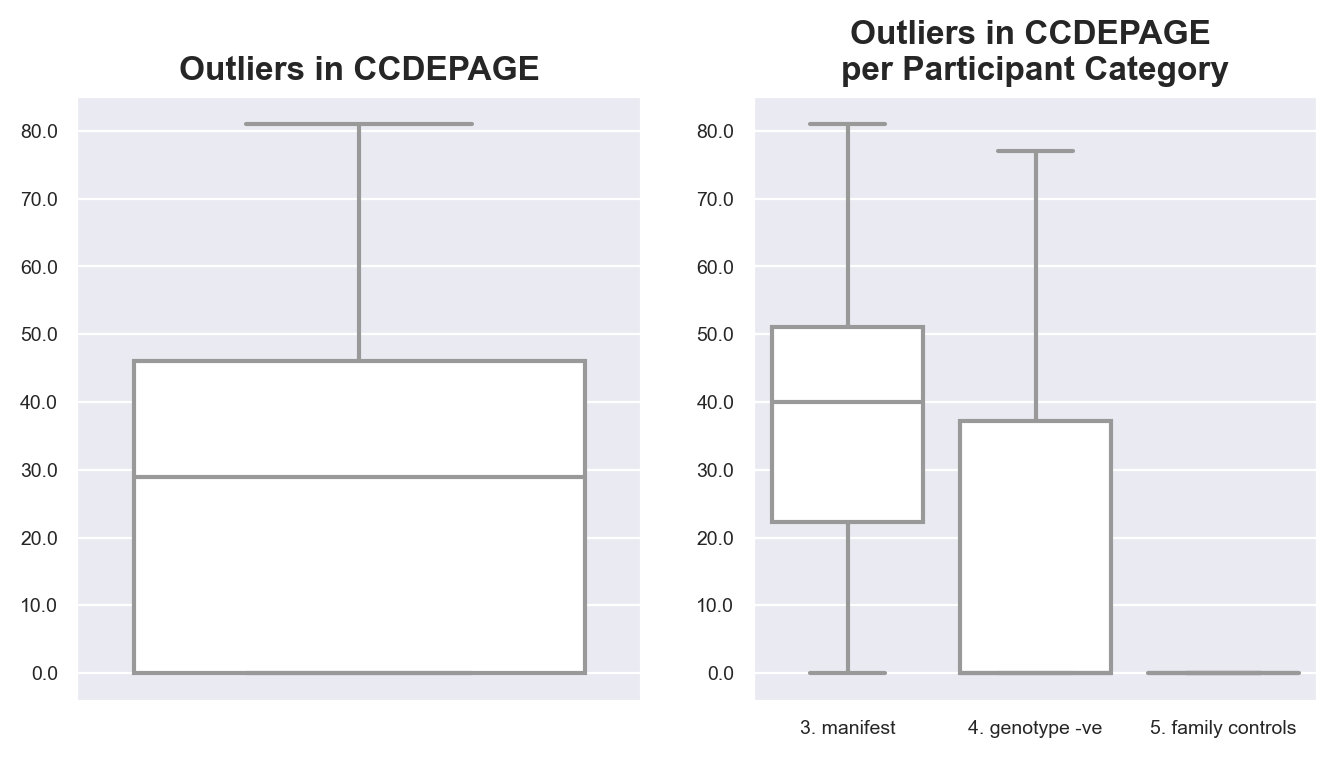

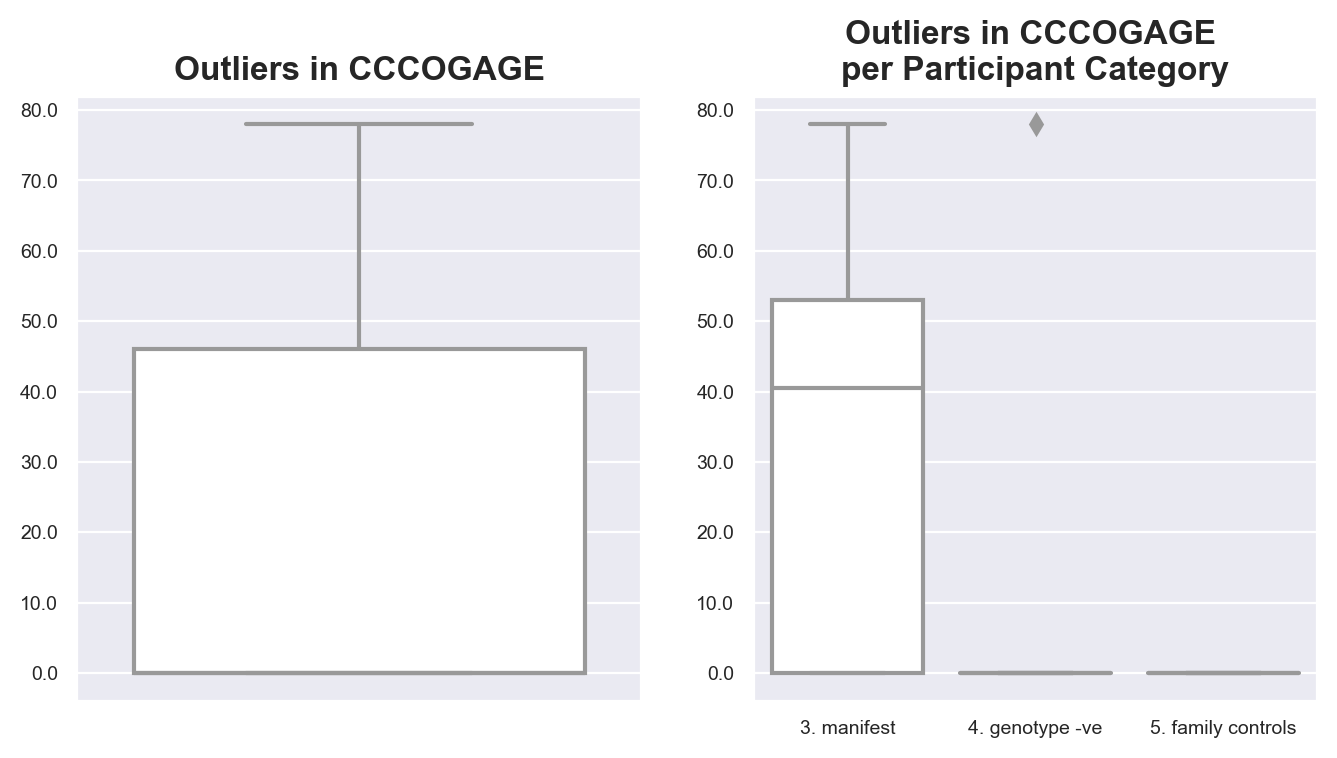

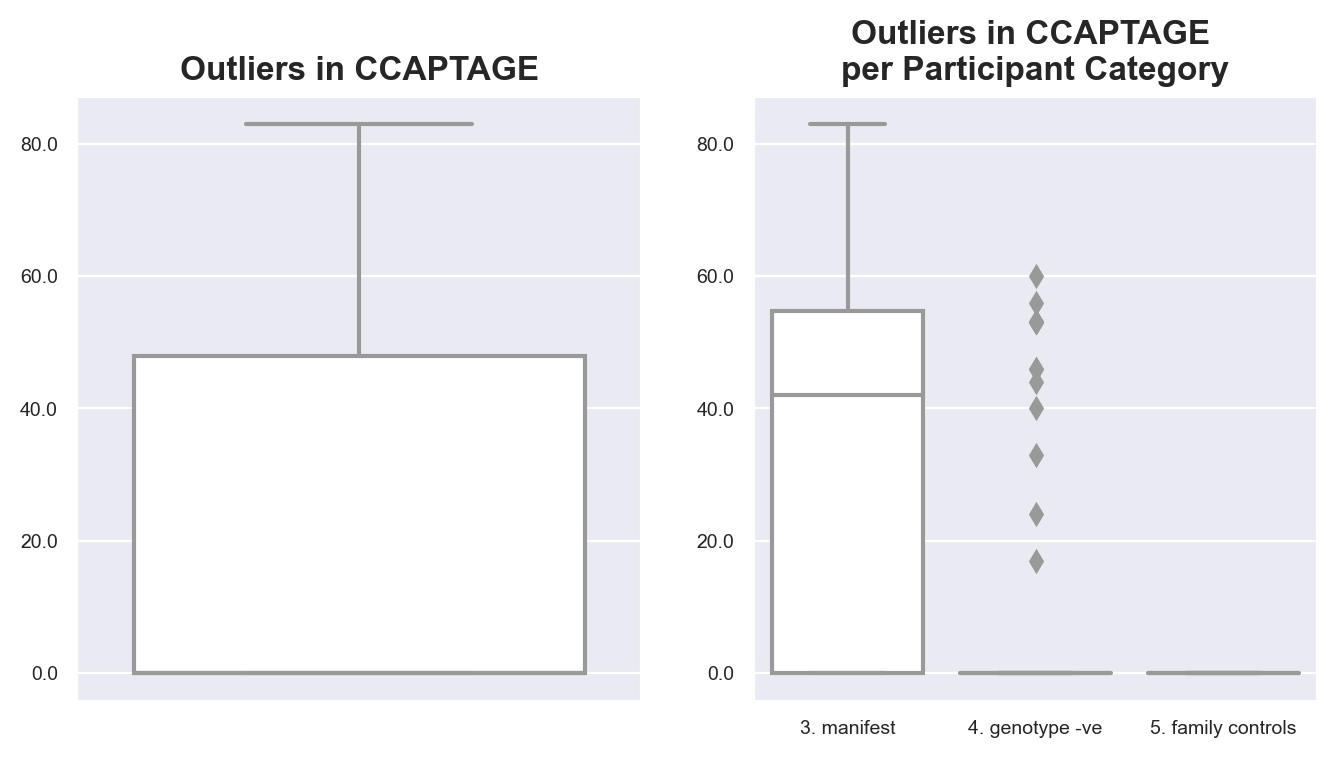

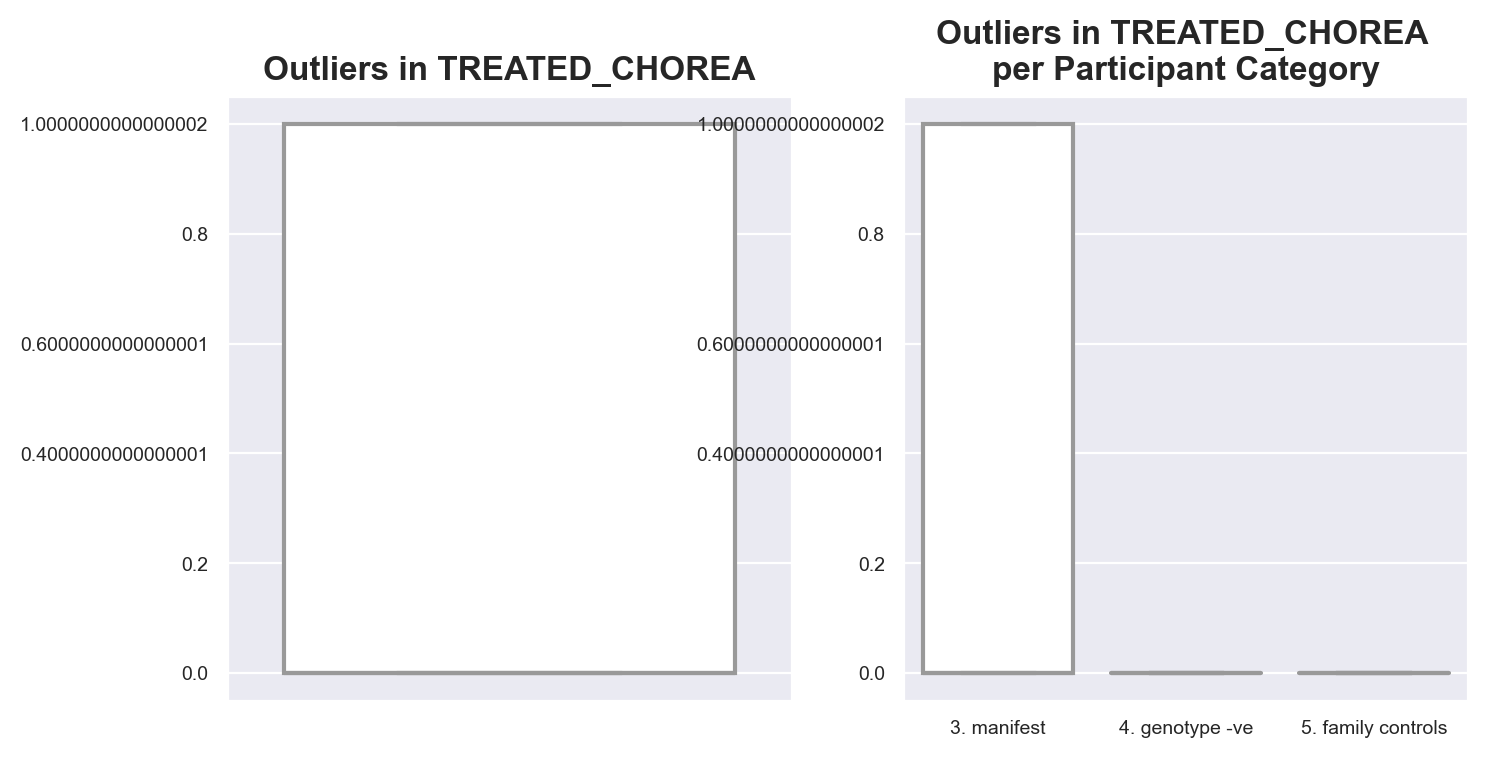

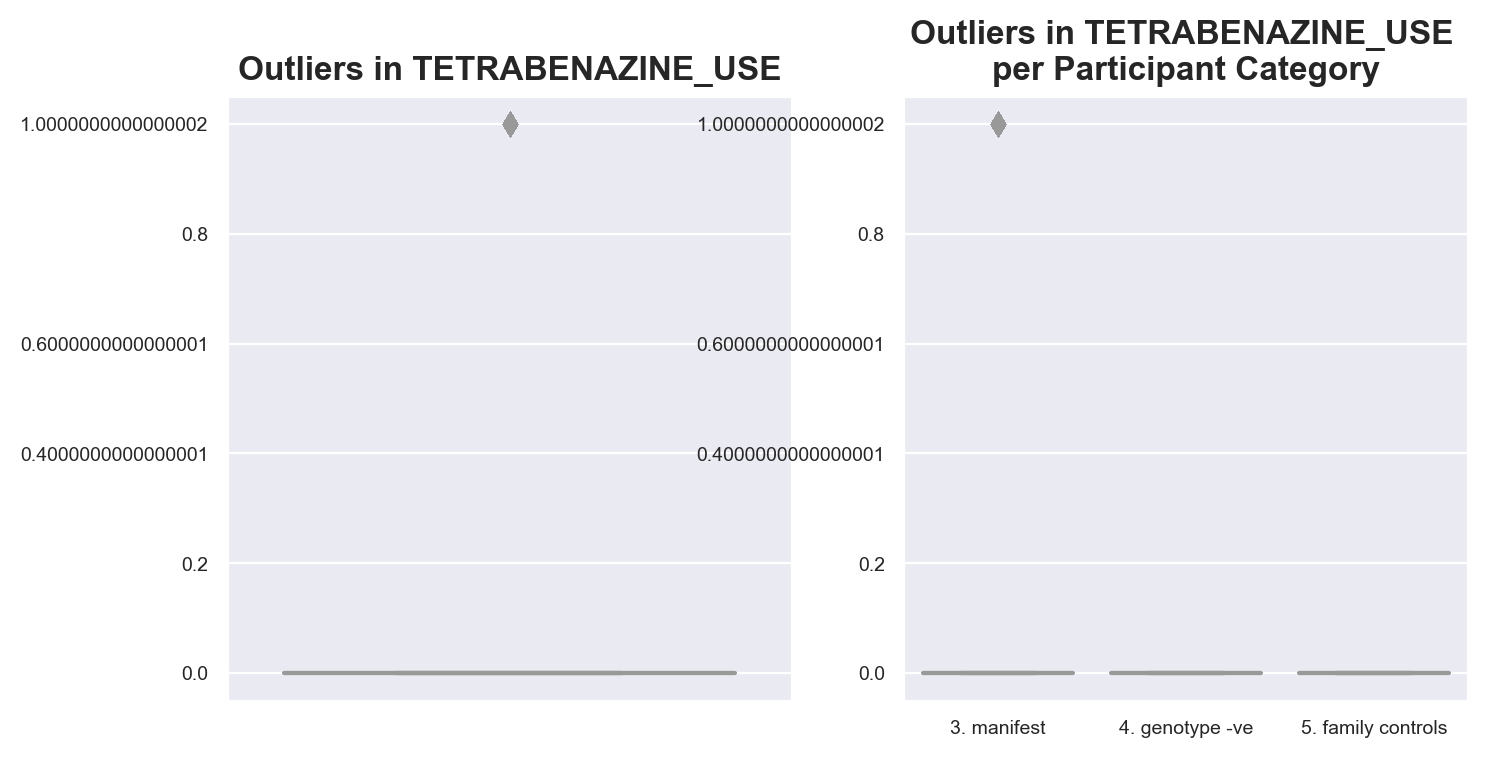

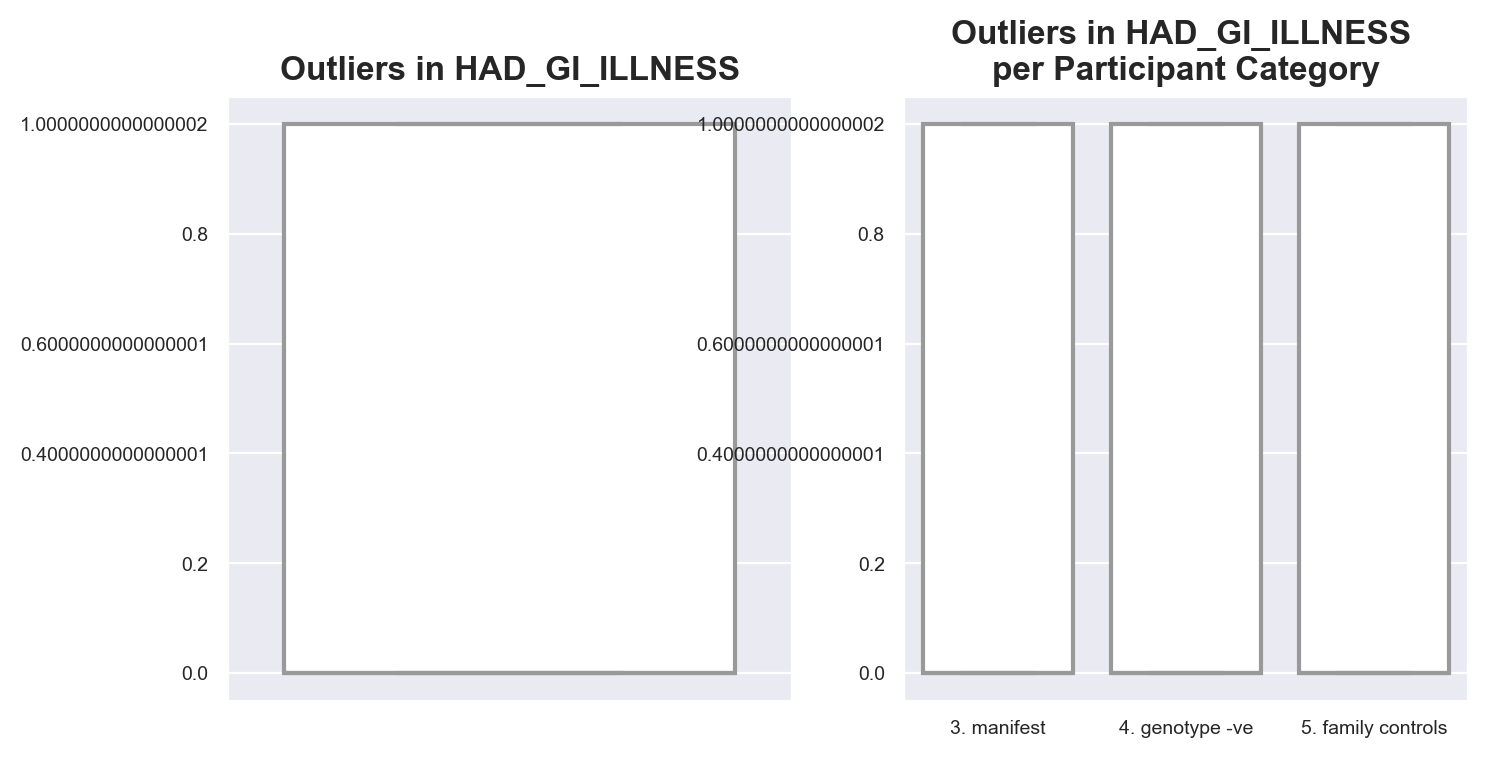

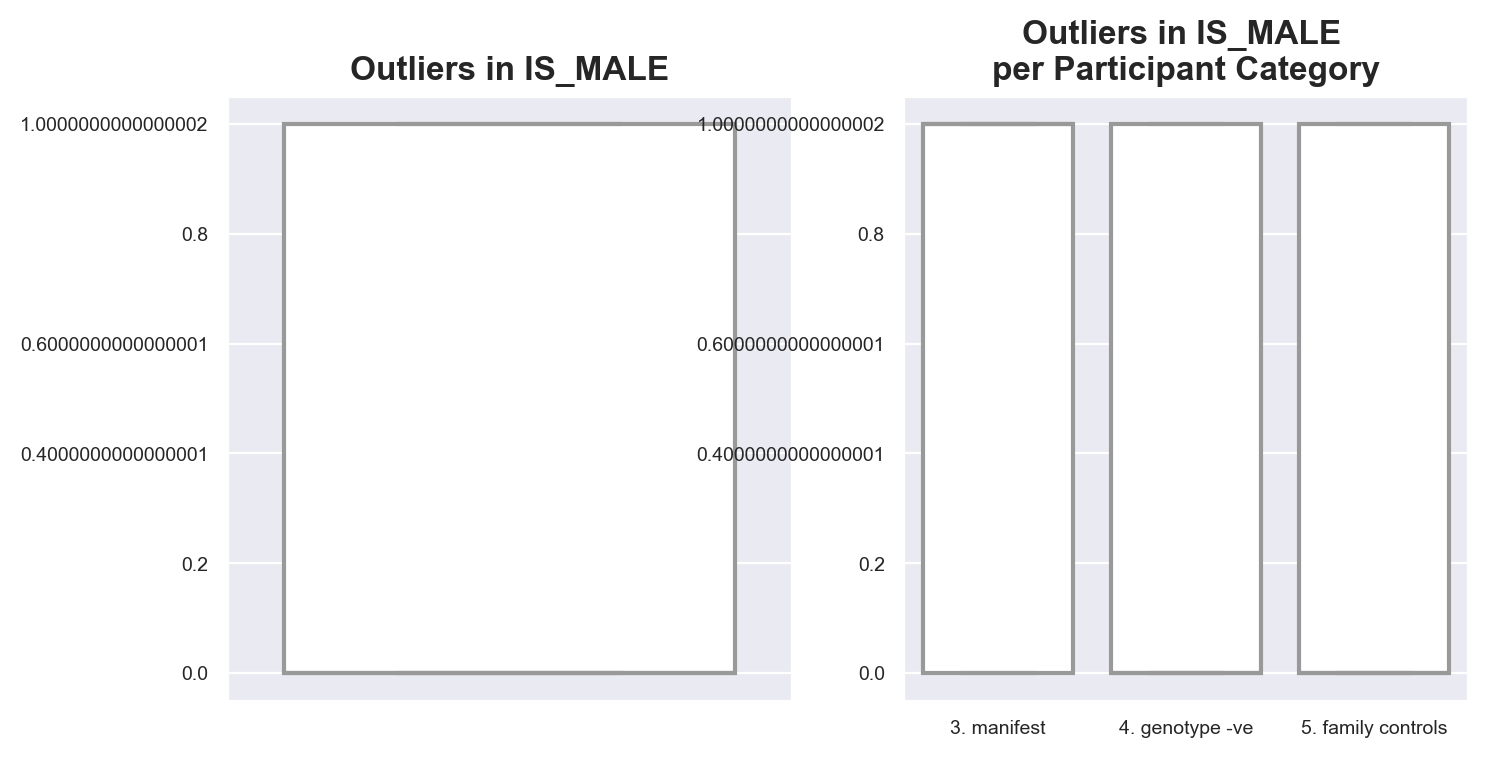

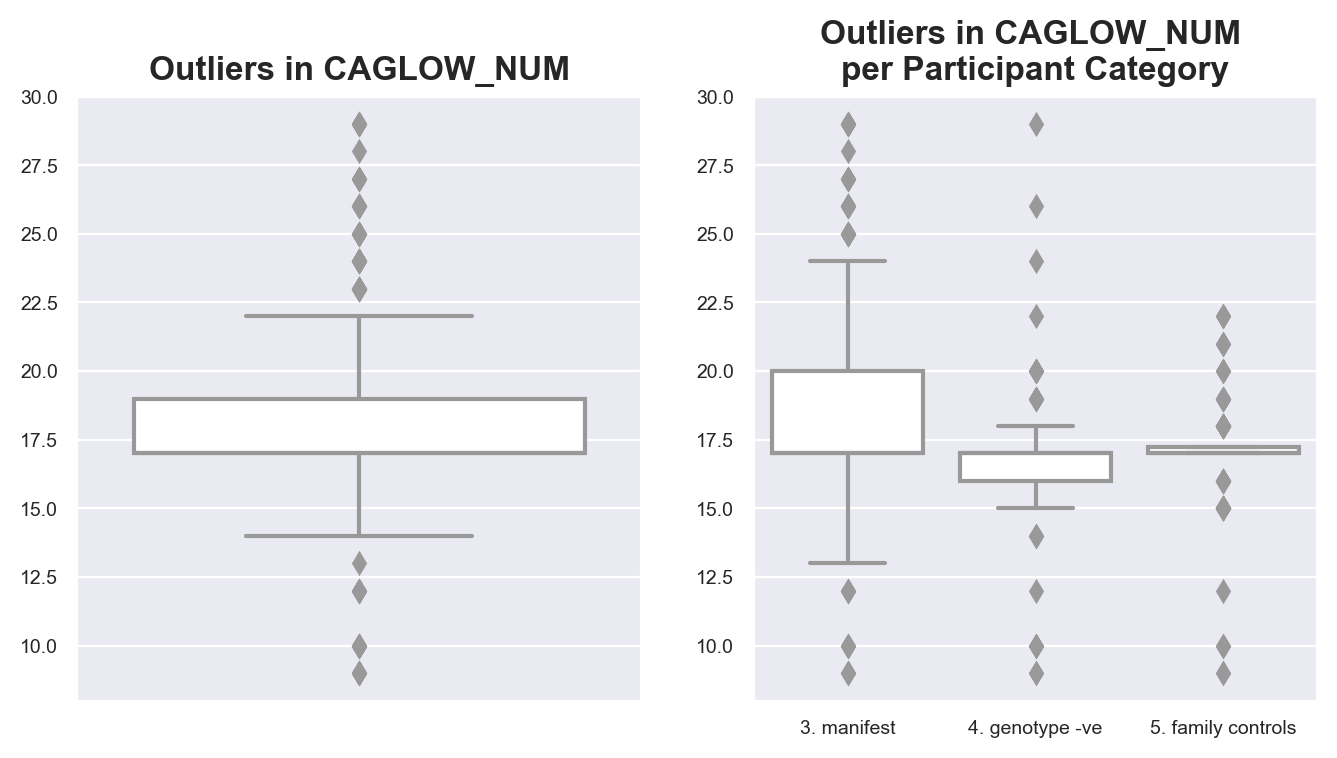

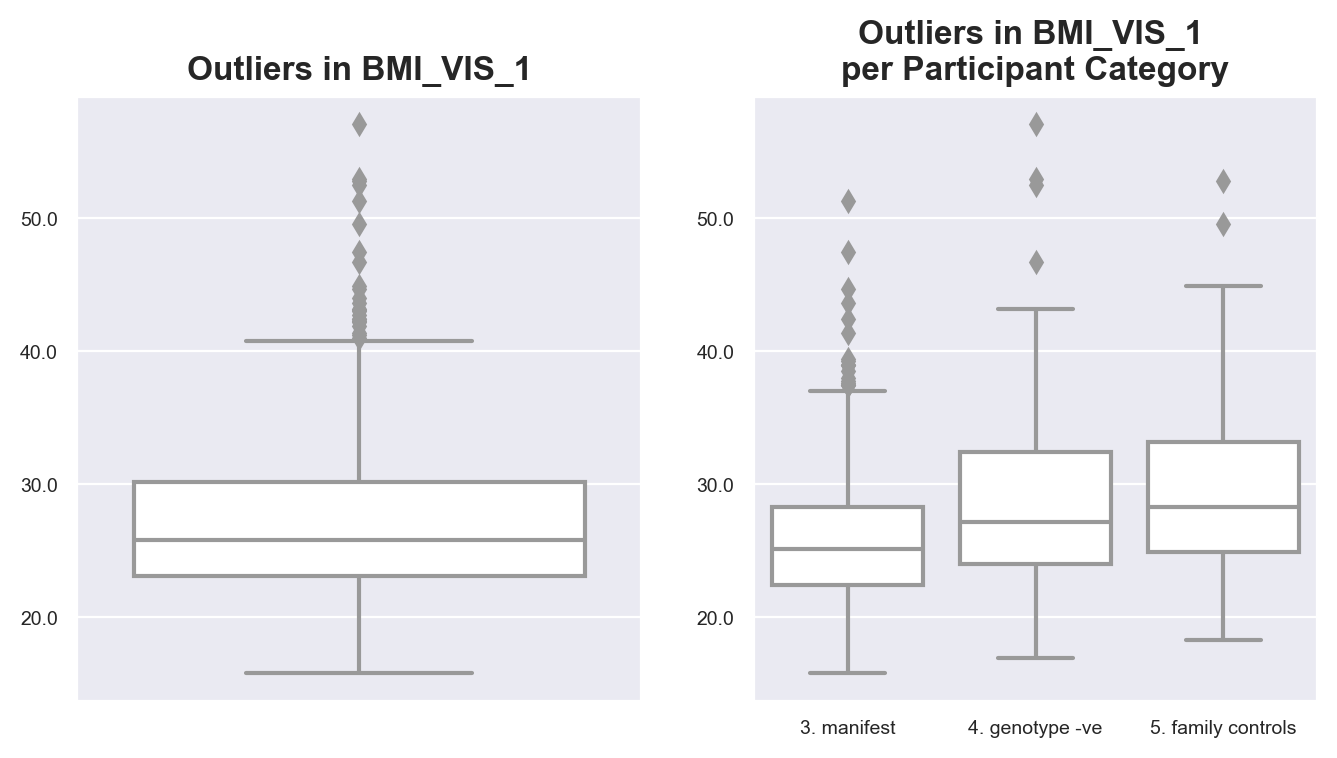

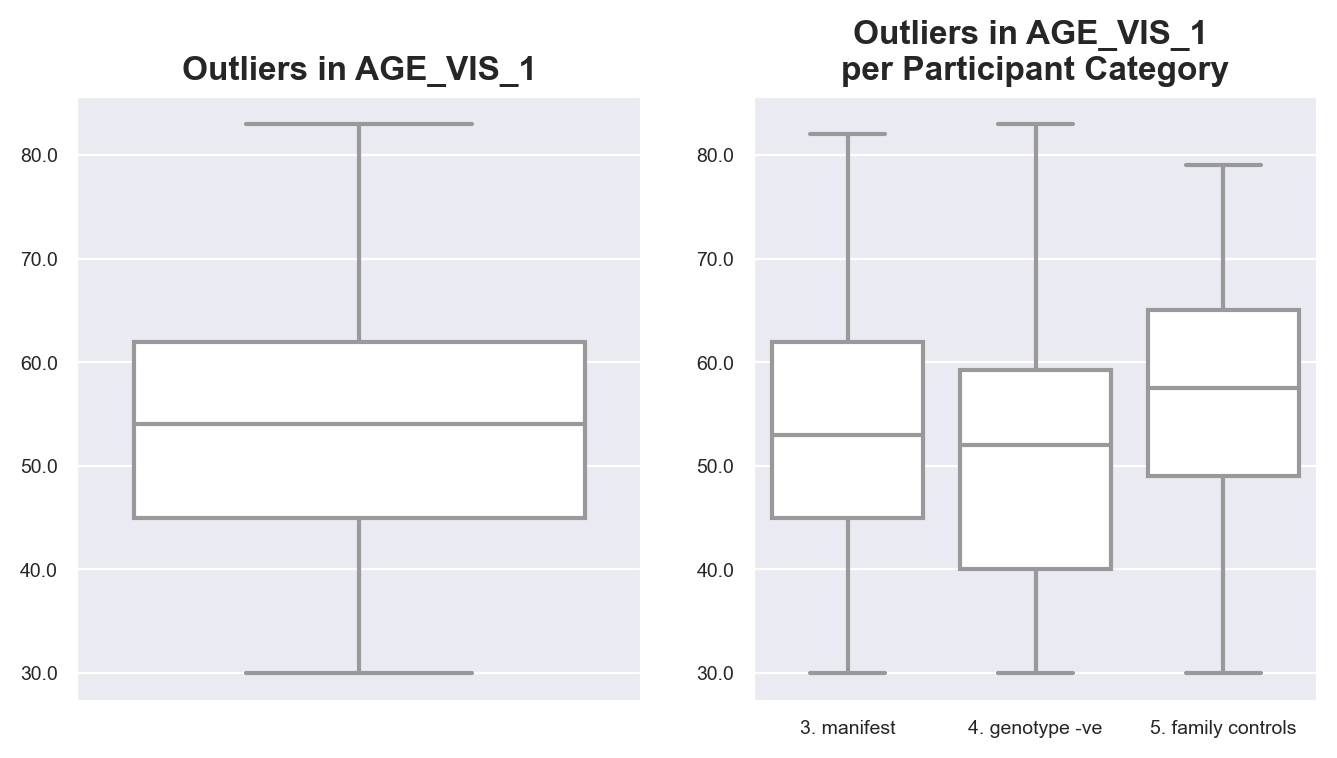

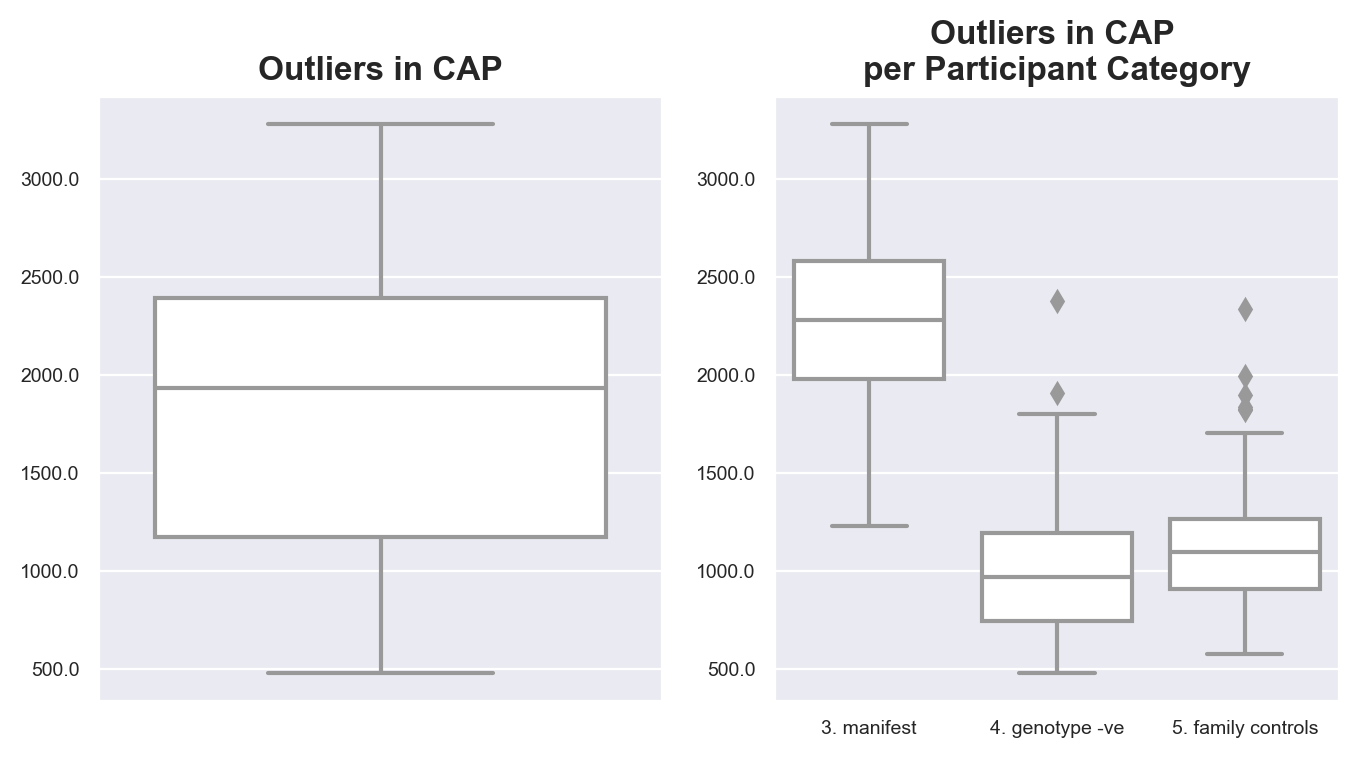

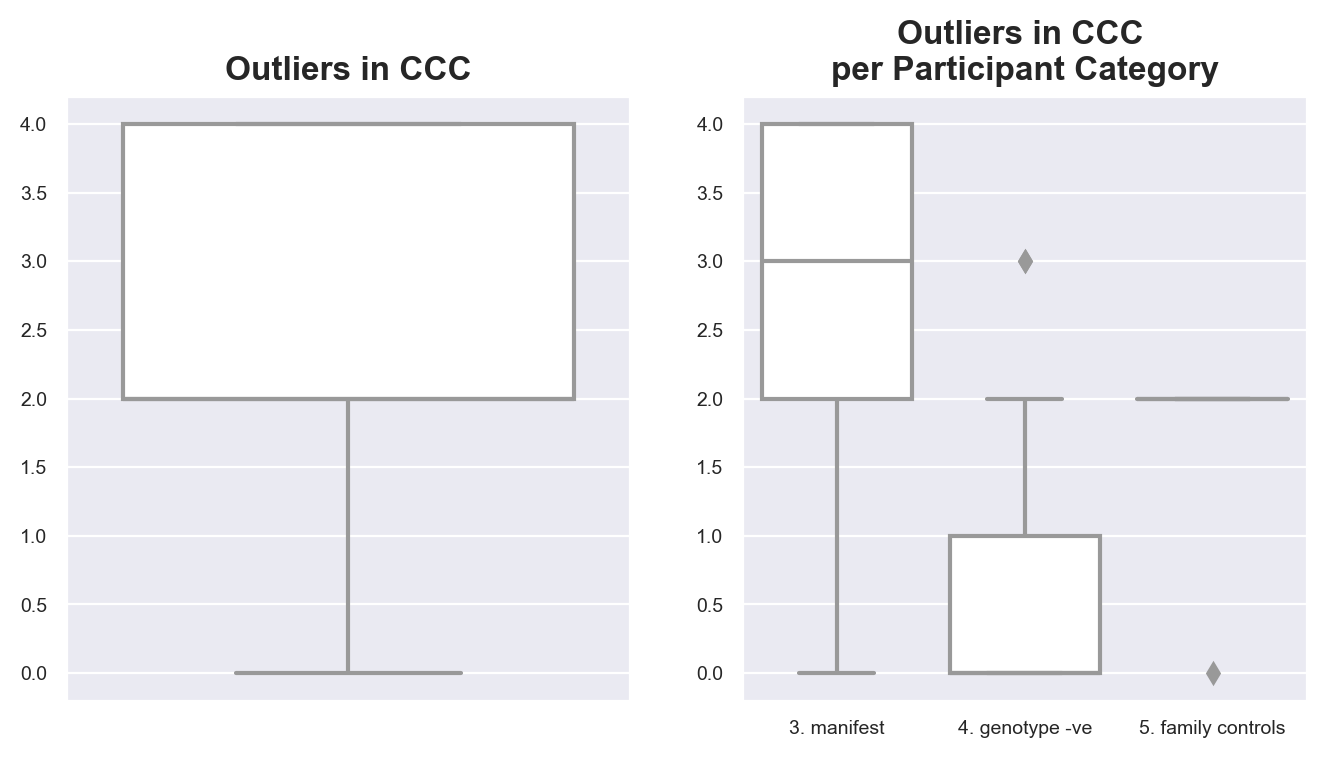

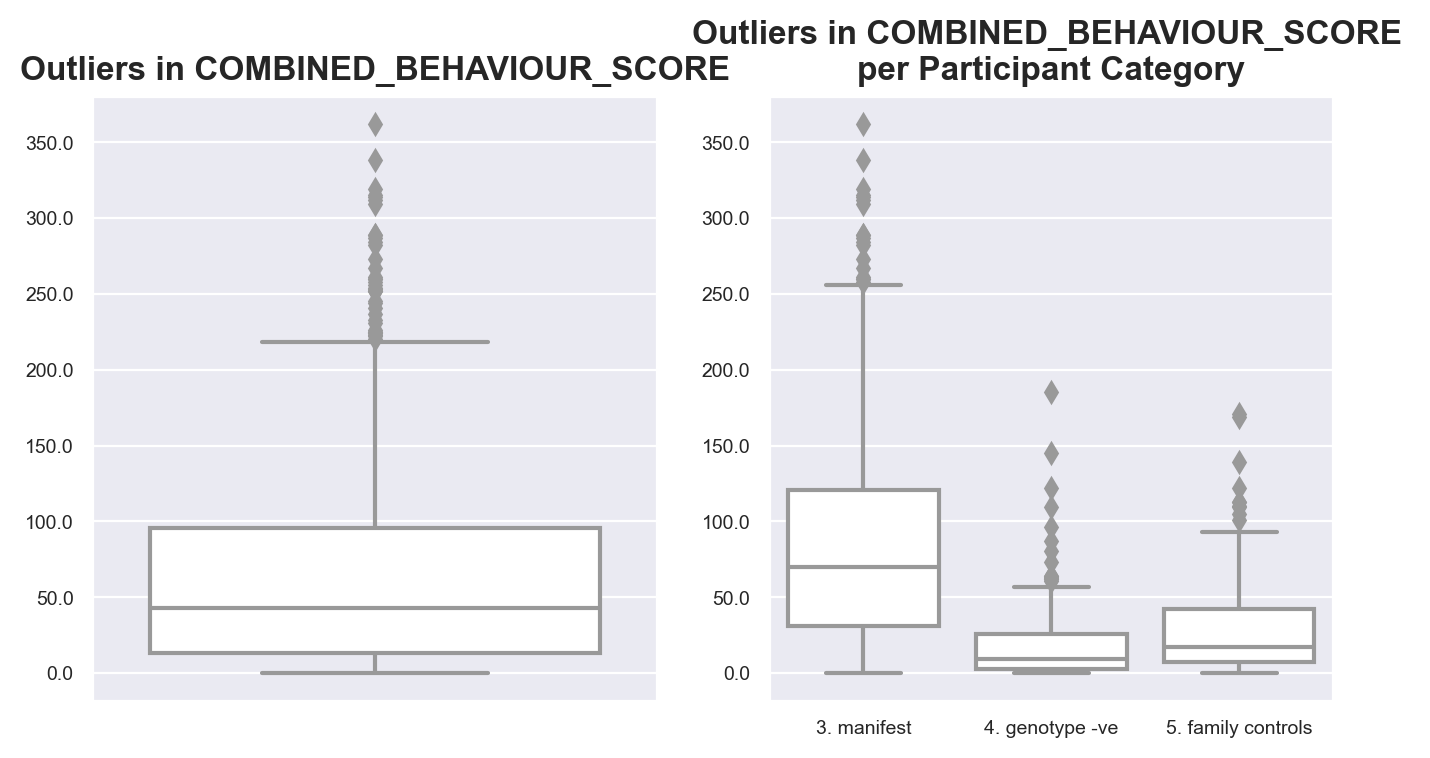

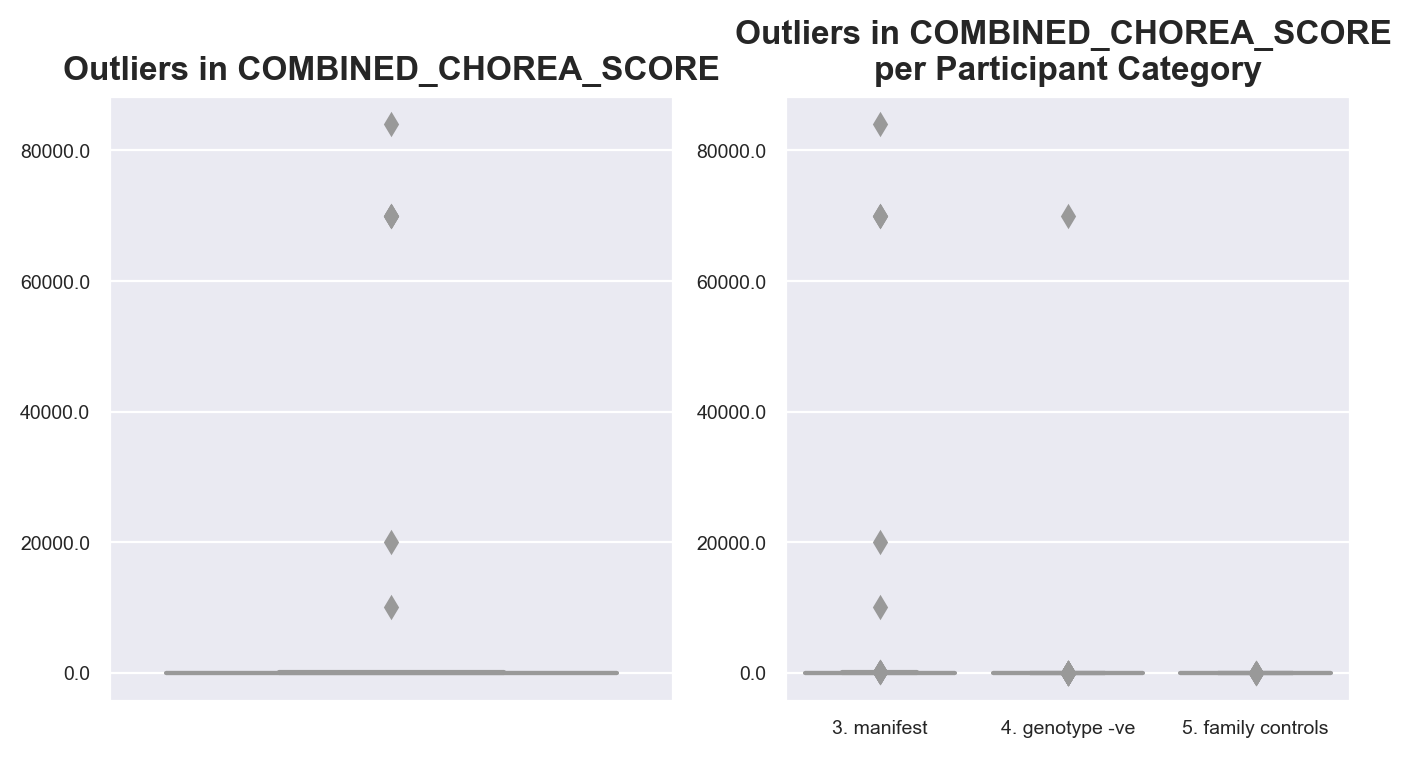

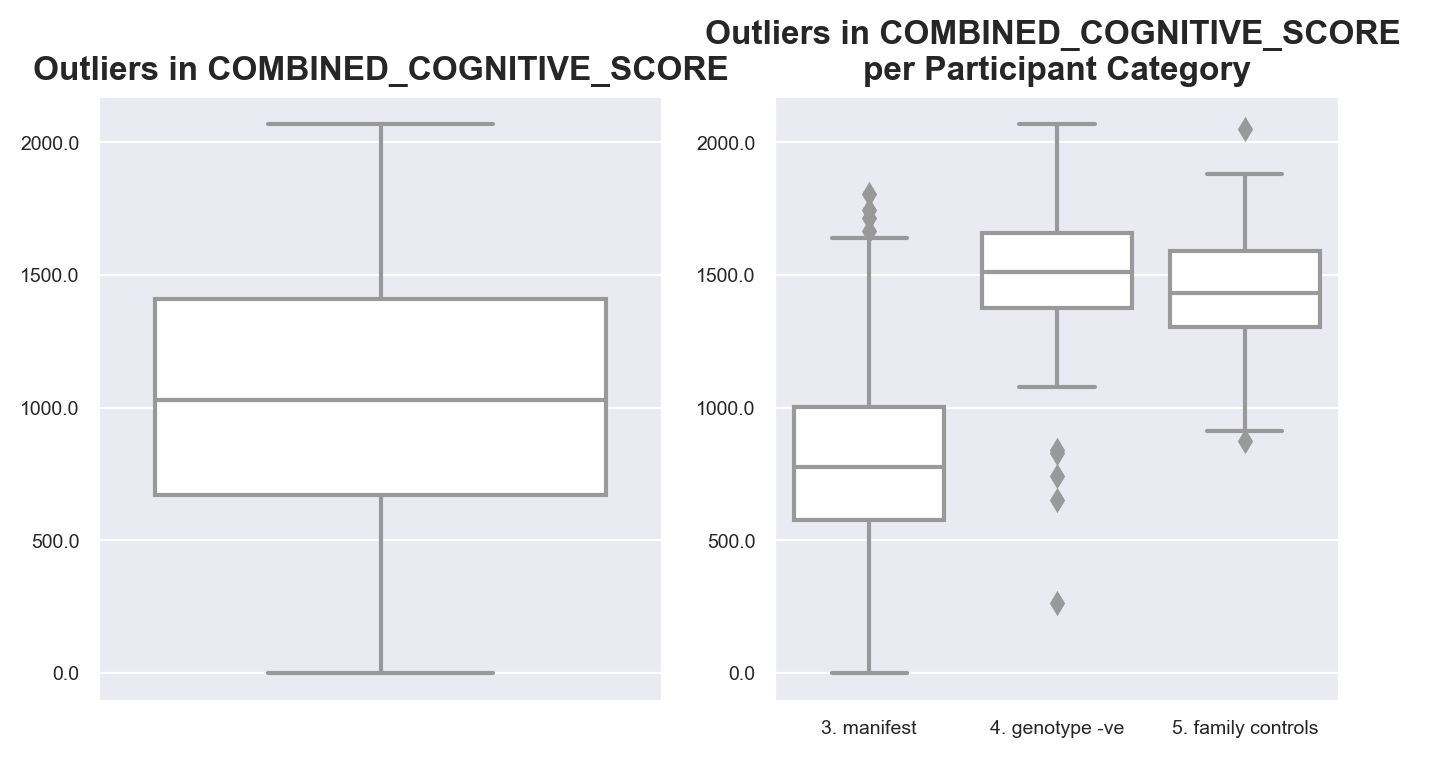

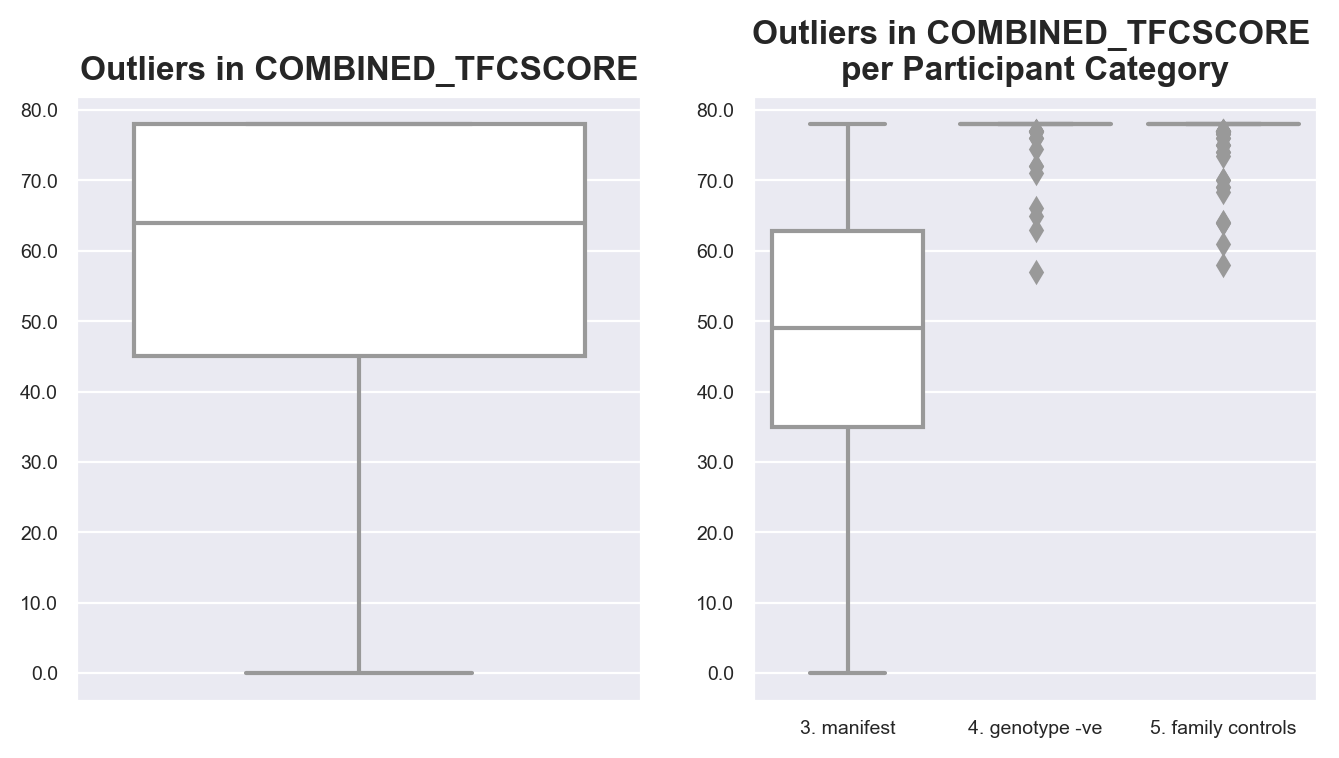

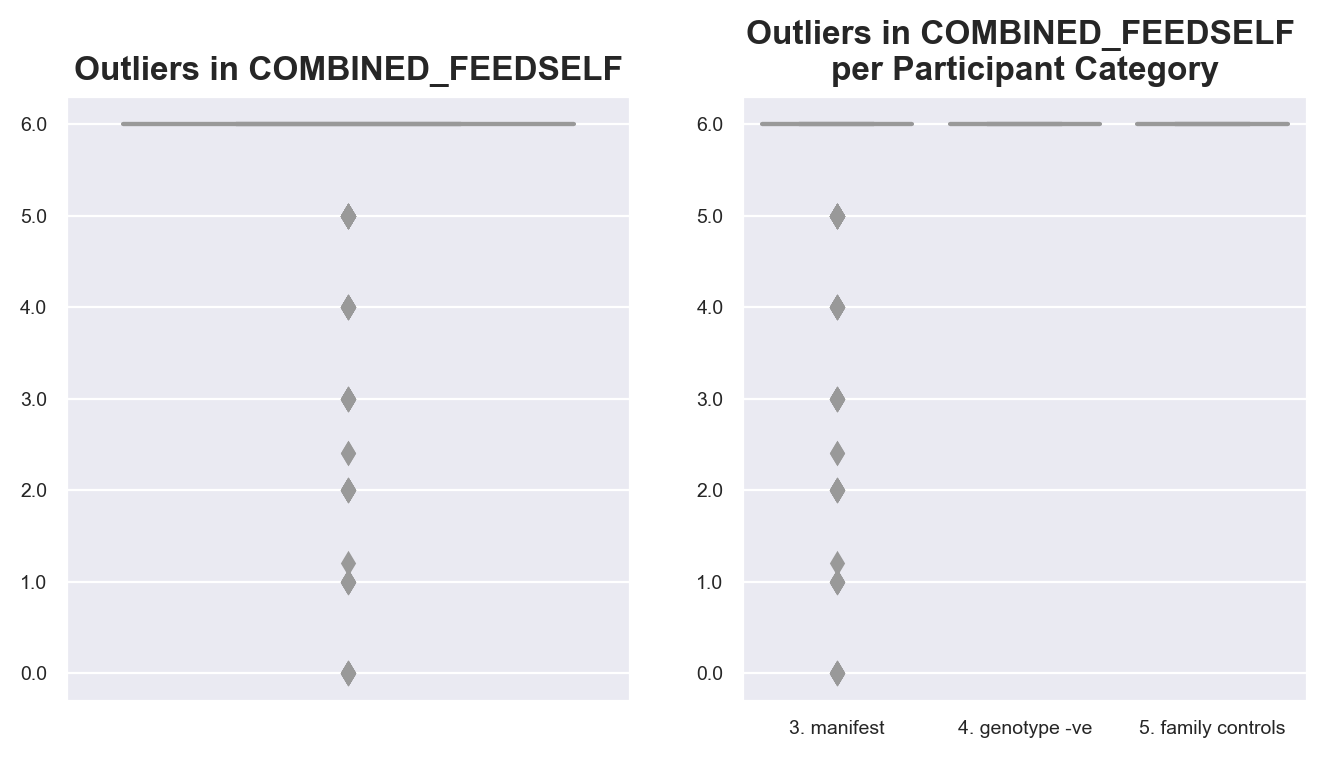

In [56]:
# num_cols = analyze_df.select_dtypes(exclude='object').columns
for c in top12:
    fig, (l,r) = plt.subplots(1, 2, figsize=[8, 4], dpi=200)
    proj.plot_box(axis=l, y=analyze_df[c], paletter=None, color='white',
                  plot_title=f"Outliers in {c.upper()}")
    proj.plot_box(axis=r, x=analyze_df['hd_status_vis_1'], y=analyze_df[c],
                  plot_title=f"Outliers in {c.upper()} \nper Participant Category",
                 paletter=None, color='white',)

#### What type of relationship exists between BMI classes and other variables

In [57]:
# Overall
print('Overall:')
targ = str_vars['bmi_level_vis_6'].str.split('.').str[0].astype(np.number)
# display(targ)
display(proj.get_correlcoeff_with_pvalues(num_enrl[top12], targ))

Overall:


r       pval
bmi_vis_1                 0.81  7.64e-200
CAP                      -0.30   1.18e-19
combined_tfcscore         0.24   6.13e-13
combined_cognitive_score  0.24   1.47e-12
combined_feedself         0.17   2.60e-07
tetrabenazine_use        -0.17   1.00e-06
treated_chorea           -0.16   1.36e-06
cccogage                 -0.16   1.41e-06
ccaptage                 -0.15   6.34e-06
CCC                      -0.15   1.72e-05
ccdepage                 -0.12   2.40e-04
combined_behaviour_score -0.09   6.62e-03
caglow_num               -0.06   7.18e-02
had_gi_illness            0.05   1.57e-01
age_vis_1                -0.05   1.63e-01
combined_chorea_score    -0.03   4.03e-01
is_male                  -0.03   4.24e-01

In [58]:
# in manifest pps
print('Manifest:')
targ = manifest['bmi_level_vis_6'].str.split('.').str[0].astype(np.number)
# display(targ)
display(proj.get_correlcoeff_with_pvalues(manifest[top12], targ))

Manifest:


r       pval
bmi_vis_1                 0.77  1.75e-110
CCC                       0.15   2.92e-04
combined_feedself         0.14   1.18e-03
tetrabenazine_use        -0.10   2.27e-02
ccdepage                  0.10   2.32e-02
had_gi_illness            0.09   3.28e-02
combined_behaviour_score  0.09   4.18e-02
combined_cognitive_score  0.08   4.74e-02
ccaptage                  0.08   6.76e-02
CAP                      -0.06   1.70e-01
cccogage                  0.05   2.23e-01
combined_tfcscore         0.05   2.42e-01
combined_chorea_score    -0.04   3.11e-01
treated_chorea           -0.03   5.30e-01
age_vis_1                -0.02   5.78e-01
caglow_num                0.02   6.75e-01
is_male                  -0.01   7.99e-01

In [59]:
# in control pps
print('Control')
targ = control['bmi_level_vis_6'].str.split('.').str[0].astype(np.number)
display(proj.get_correlcoeff_with_pvalues(control[top12], targ))

Control


C:\Users\welcome\venv\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


r      pval
bmi_vis_1                 0.81  1.09e-75
combined_cognitive_score -0.18  1.46e-03
age_vis_1                -0.11  4.95e-02
is_male                   0.08  1.42e-01
CAP                      -0.08  1.72e-01
combined_tfcscore        -0.07  1.94e-01
had_gi_illness            0.05  3.90e-01
combined_chorea_score     0.05  4.17e-01
ccaptage                 -0.04  4.82e-01
combined_behaviour_score -0.03  5.40e-01
caglow_num                0.03  5.71e-01
ccdepage                 -0.02  7.64e-01
cccogage                 -0.01  8.24e-01
CCC                       0.01  8.52e-01

### Correlation Analysis

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})
No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})
No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})
No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:1920: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), size=xy_ticklabe_size, rotation=rotate_ytickla

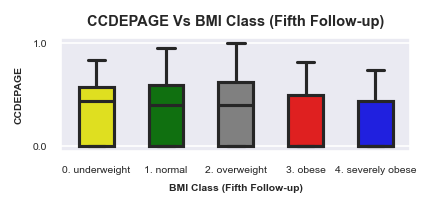

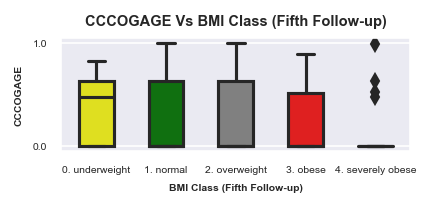

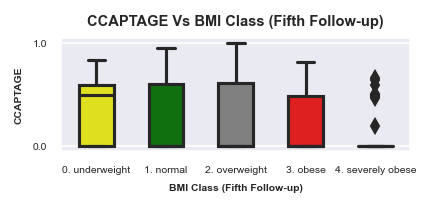

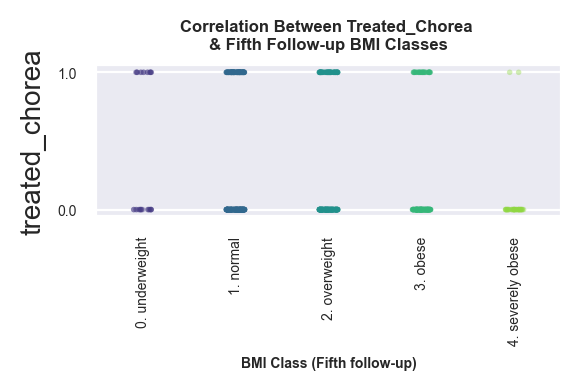

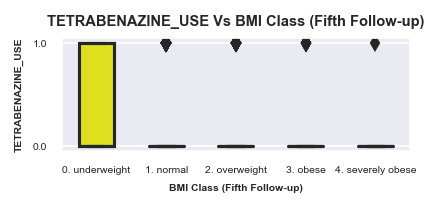

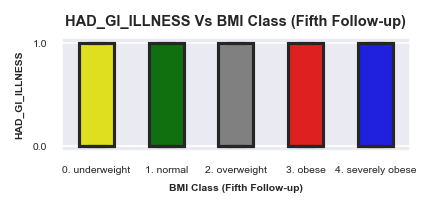

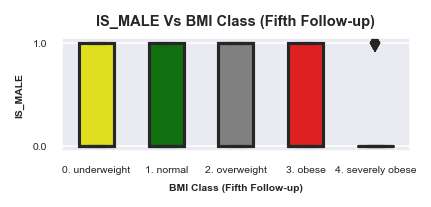

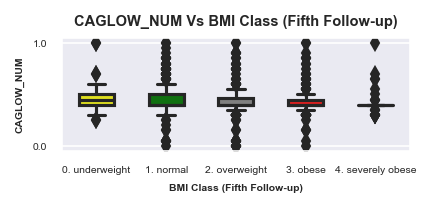

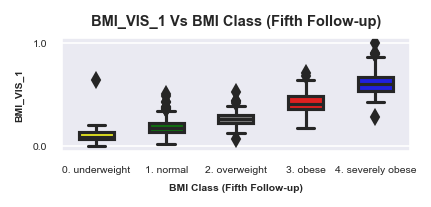

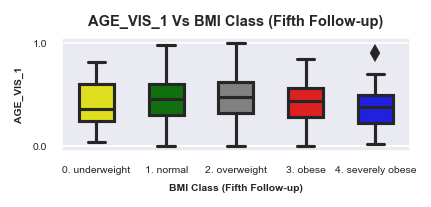

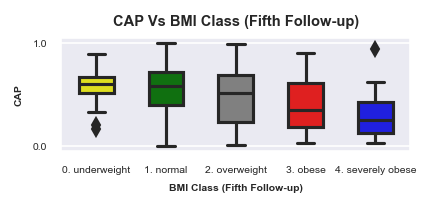

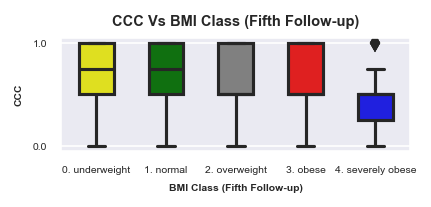

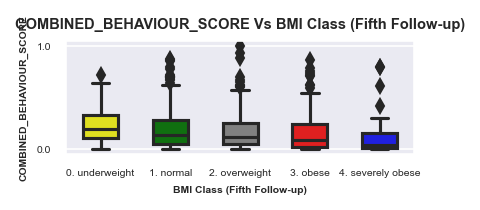

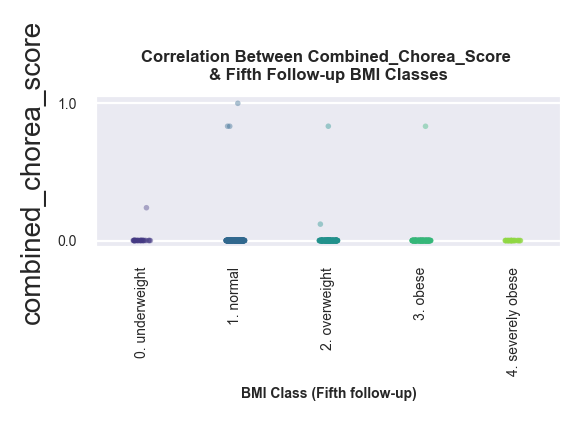

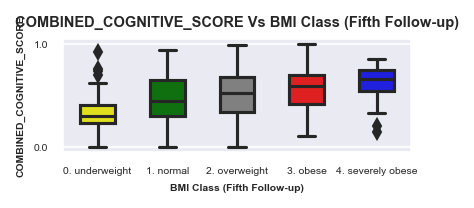

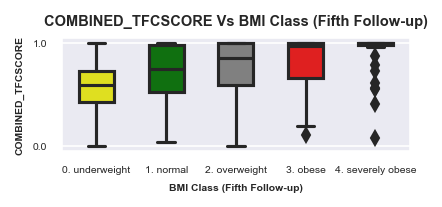

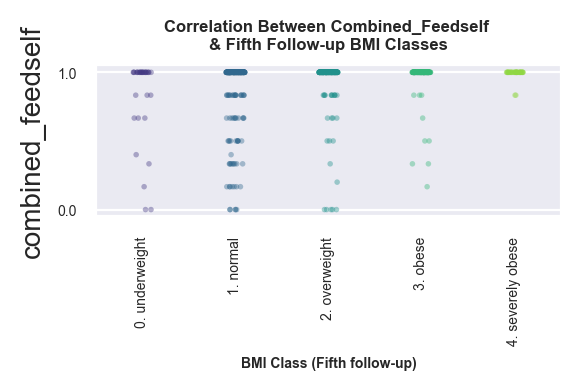

In [60]:
xorder = sorted(y_cat.unique())
for col in top12:
    if col in proj.get_columns_with_pattern(sc_df, 
                                            ['feed', 'ccmtr', 'chorea']).columns:
        proj.plot_strip(y=sc_df[col], x=y_cat, figsize=[3, 1],
                   plot_title=f"Correlation Between {col.title()} \n& Fifth Follow-up BMI Classes",
                   title_size=6, x_labe='BMI Class (Fifth follow-up)', xy_labe_size=5,
                   xy_ticklabe_size=5, rotate_xticklabe=90, x_labe_order=xorder, marker_size=2,
                   alpha=0.4)
    else:
        proj.plot_box(x=y_cat, y=sc_df[col], figsize=[3, 1], x_labe='BMI Class (Fifth Follow-up)',
                     y_labe=col.upper(), box_width=0.5,
                     plot_title=f'{col.upper()} Vs BMI Class (Fifth Follow-up)', title_size=7,
                     xy_ticksize=5, x_labe_order=xorder, xy_labe_size=5, paletter=proj.bmi_level_cmap)

In [61]:
# score, pvalues = chi2(sc_xtrain, y_train)
# display(len(score), len(pvalues))

In [62]:
# pd.Series(pvalues, index=sc_xtrain.columns).sort_values()

In [63]:
# f_stat, p_values = f_regression(sc_xtrain, y_train)
# display(f_stat.shape, p_values.shape)

In [64]:
# pd.Series(p_values, index=sc_xtrain.columns).sort_values()

In [65]:
stopt

NameError: name 'stopt' is not defined